## IMPORTING LIBRARIES 

In [1]:
import warnings

%matplotlib inline

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from xgboost import XGBRFRegressor

warnings.filterwarnings ( 'ignore' )

from sklearn.pipeline import Pipeline

pd.set_option ( "display.max_columns" , None )

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import QuantileTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge 

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, StandardScaler , OneHotEncoder

from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error 

## IMPORTING DATA 

In [2]:
DF = pd.read_csv ( "LAPTOP_DATA.csv" )

DF

Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 12 columns]

## STATISTICAL ANALYSIS

In [3]:
DF_Stats_Numeric = DF.describe ( )

DF_Stats_Numeric

Unnamed: 0       Inches          Price
count  1303.00000  1303.000000    1303.000000
mean    651.00000    15.017191   59870.042910
std     376.28801     1.426304   37243.201786
min       0.00000    10.100000    9270.720000
25%     325.50000    14.000000   31914.720000
50%     651.00000    15.600000   52054.560000
75%     976.50000    15.600000   79274.246400
max    1302.00000    18.400000  324954.720000

In [4]:
DF_Stats_Non_Numeric = DF.describe ( exclude = np.number )

DF_Stats_Non_Numeric

Company  TypeName   ScreenResolution                         Cpu   Ram  \
count     1303      1303               1303                        1303  1303   
unique      19         6                 40                         118     9   
top       Dell  Notebook  Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
freq       297       727                507                         190   619   

           Memory                    Gpu       OpSys Weight  
count        1303                   1303        1303   1303  
unique         39                    110           9    179  
top     256GB SSD  Intel HD Graphics 620  Windows 10  2.2kg  
freq          412                    281        1072    121

In [5]:
DF.info ( ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### DROPPING THE UNIQUE COLUMN

In [6]:
DF.drop ( columns = [ 'Unnamed: 0' ] , inplace = True )

DF

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 11 columns]

In [7]:
DF [ 'TouchScreen' ] = DF.ScreenResolution.apply ( lambda x : 1 if 'Touchscreen' in x else 0 )

DF [ 'HD_4K' ] = DF.ScreenResolution.apply ( lambda x : 1 if '4K' in x or 'HD' in x or 'HD+' in x else 0 )

DF [ 'CPU_Types' ] = DF.Cpu.apply ( lambda x : 'Samsung' if 'Samsung' in x else ( 'Intel' if 'Intel' in x else ( 'AMD' if 'AMD' in x else 'Intel' ) ) )

DF [ 'Memory_Types' ] = DF.Memory.apply ( lambda x : 'Flash Storage' if 'Flash Storage' in x else ( 'HDD' if 'HDD' in x else ( 'SSD' ) ) )

DF [ 'GPU_Types' ] = DF.Gpu.apply ( lambda x : 'AMD' if 'AMD' in x else ( 'Nvidia' if 'Nvidia' in x else ( 'Intel' ) ) )

DF [ 'CPU_Frequency' ] = DF.Cpu.str.extract (  r'(\d+GHz)' , expand = True )[0].str.replace ( 'GHz' , '' ).astype ( 'int64' )

In [8]:
DF_Original = DF

DF = DF_Original.iloc [ : , [ 0 , 1 , 2 , 5 , 8 , 9 , 10 , 11 , 12 , 13 , 14] ]

Pixels = DF_Original.ScreenResolution.str.extract ( r'(\d+x\d+)', expand = True  )[0].str.replace ( 'x' , ' ' ).tolist()

Pixels = list( map( lambda x : [ int ( x [ 0 ] ), int( x [ 1 ] ) ], [ i.split ( ) for i in Pixels ] ) )

DF [ 'Length' ] = [ x [ 0 ] for x in Pixels ]

DF [ 'Width' ] = [ x [ 1 ] for x in Pixels ]

DF [ 'PPI' ] = np.sqrt ( DF.Length ** 2 + DF.Width ** 2 ) / DF.Inches

### DATA VISUALIZATION

#### BASIC LINE PLOTS

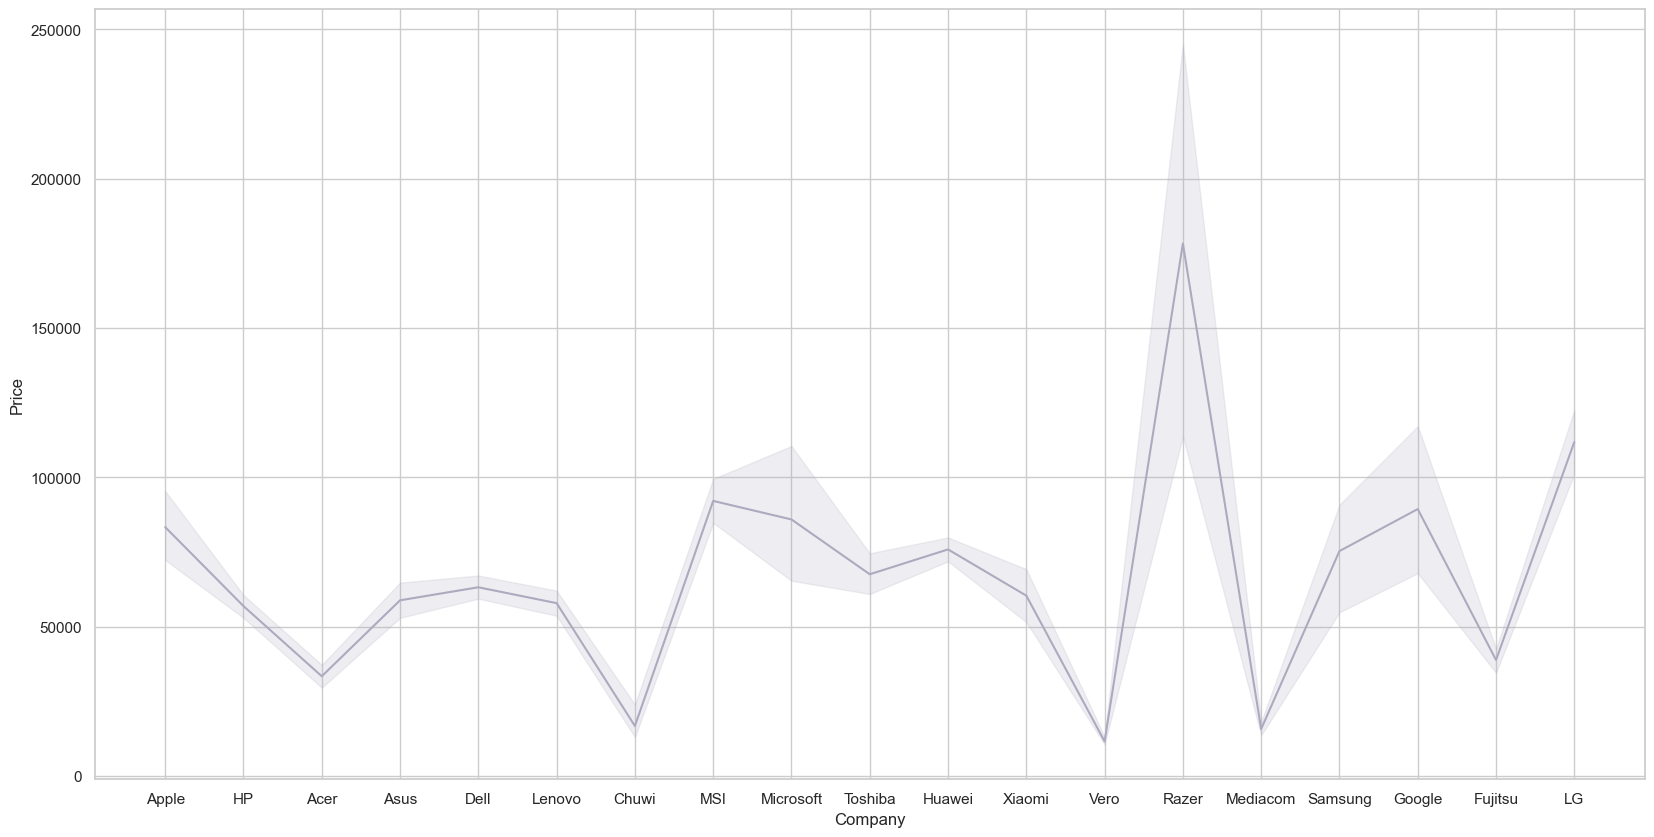

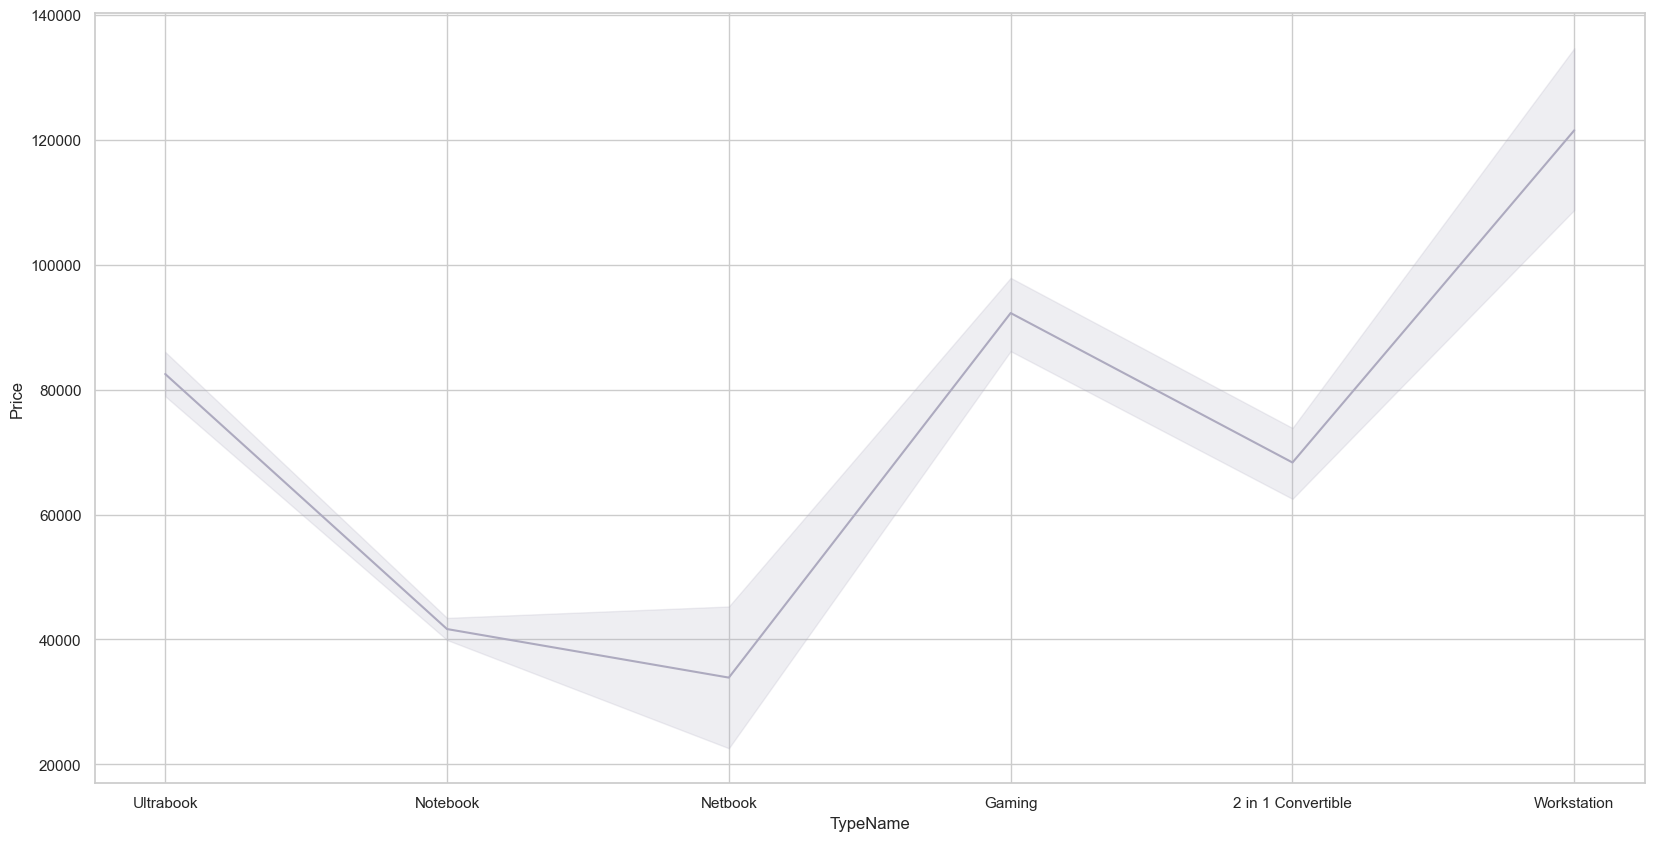

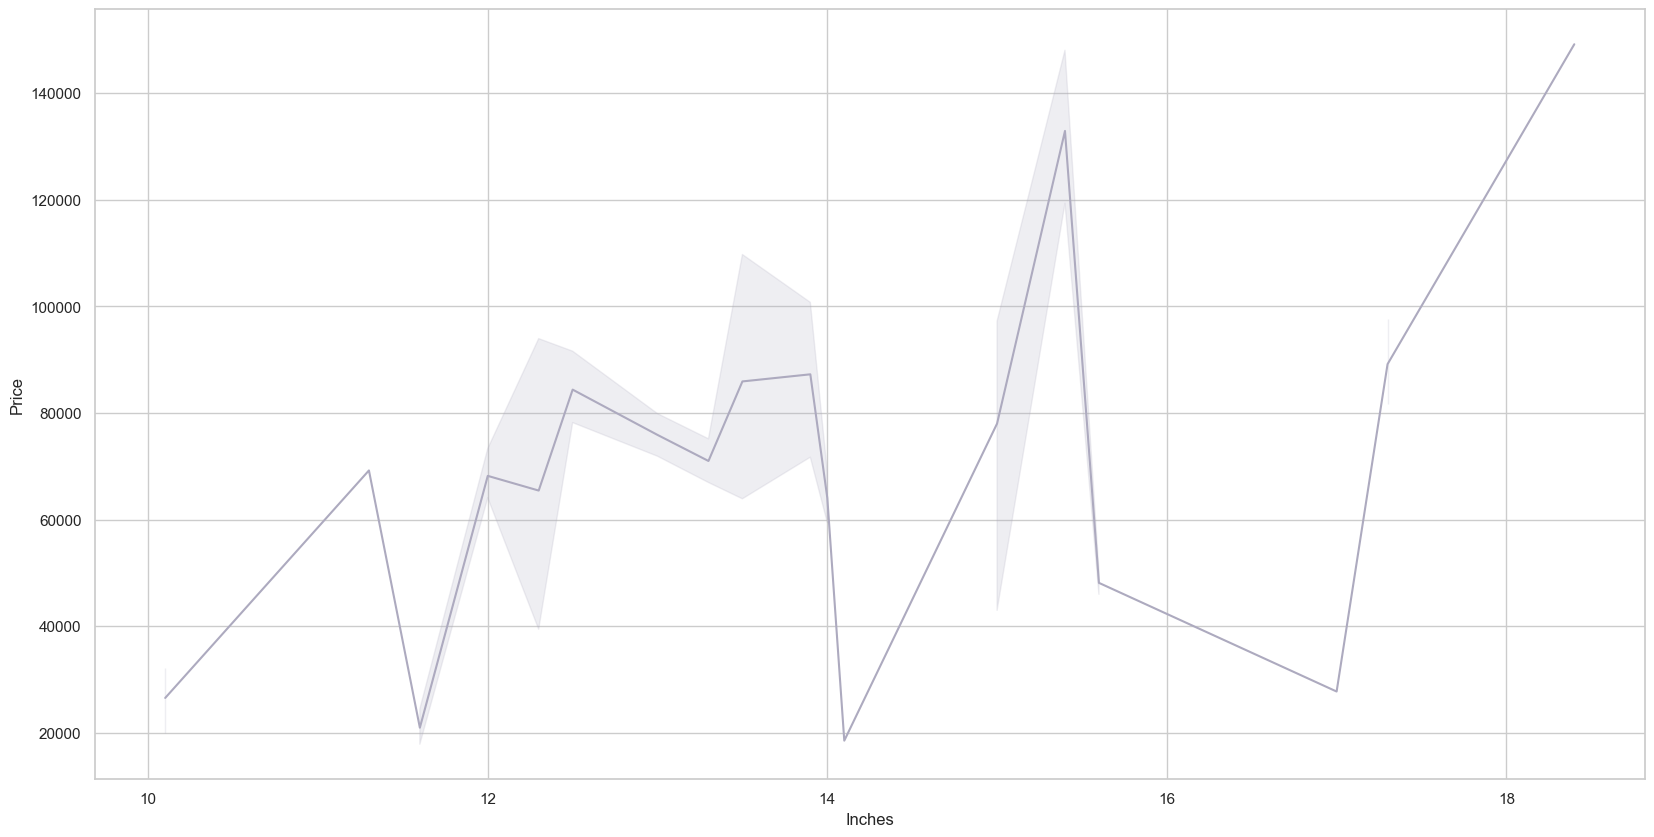

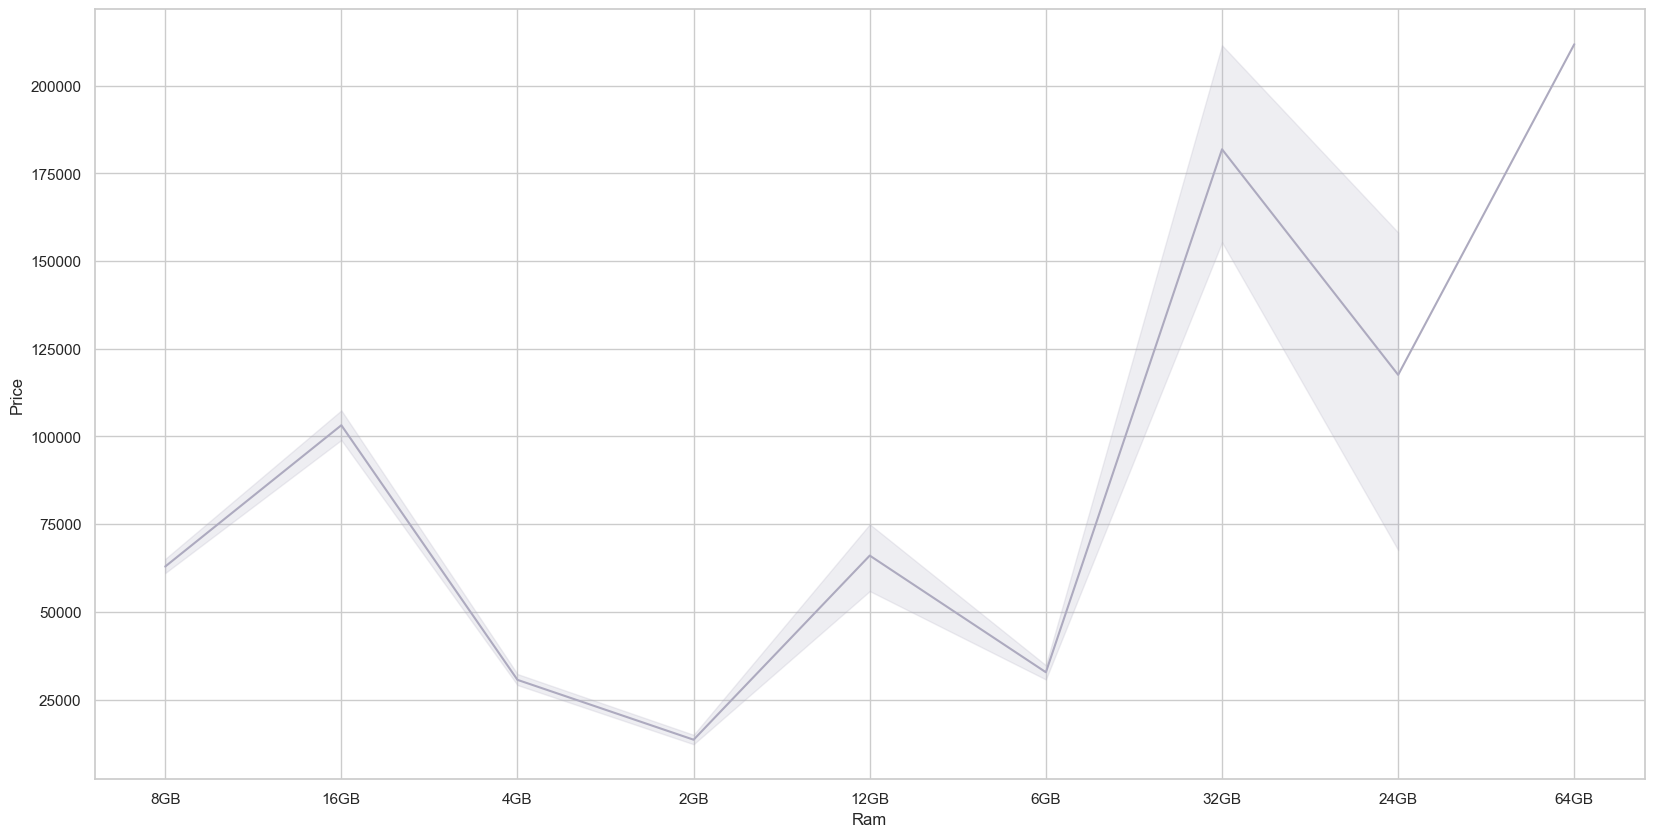

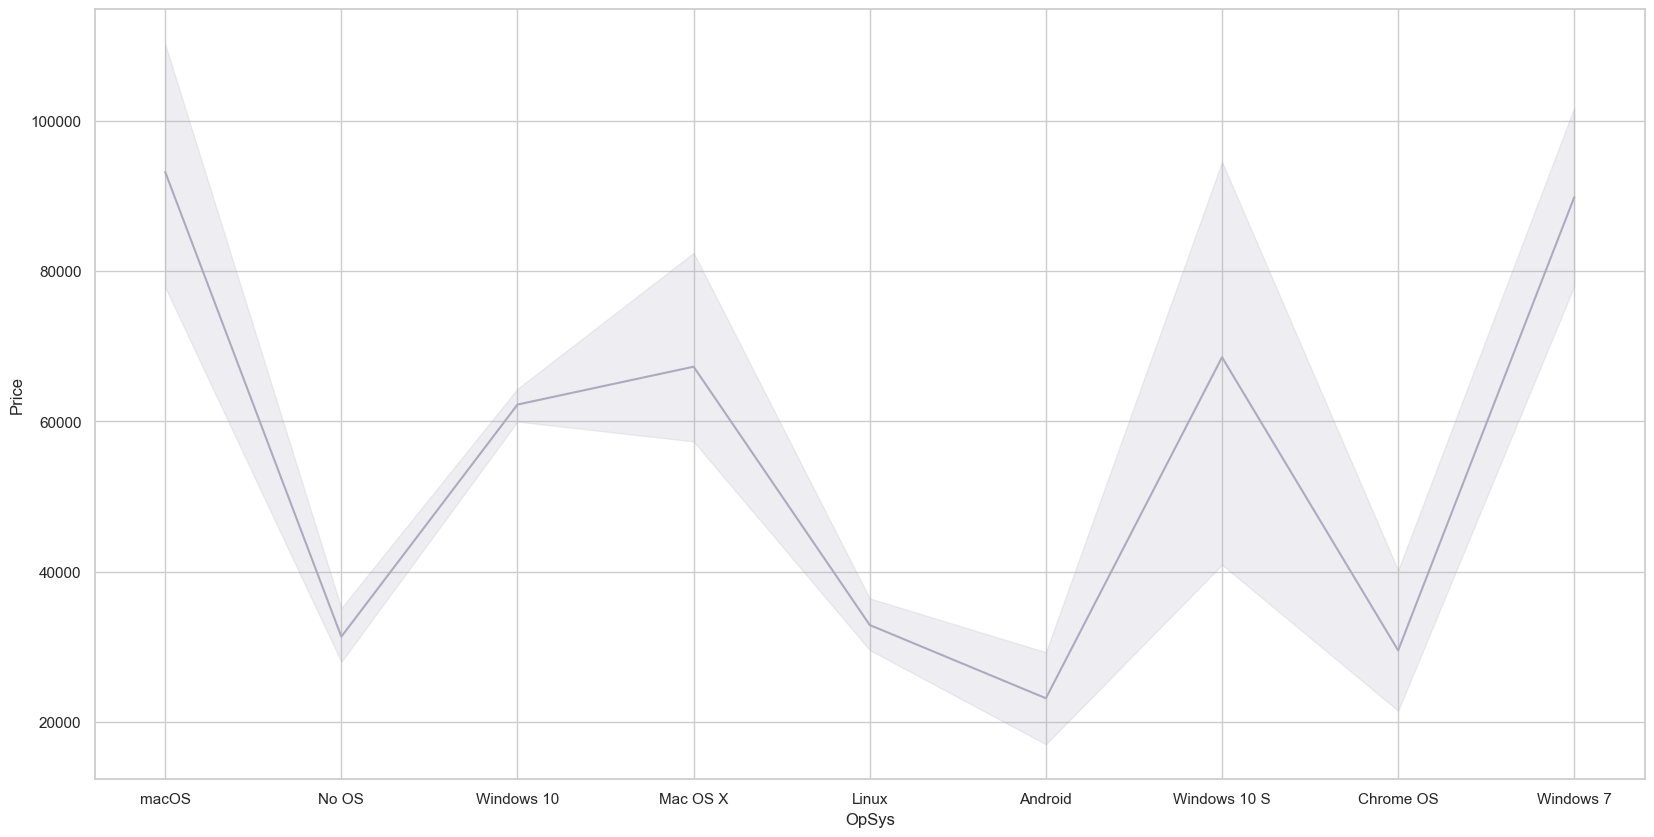

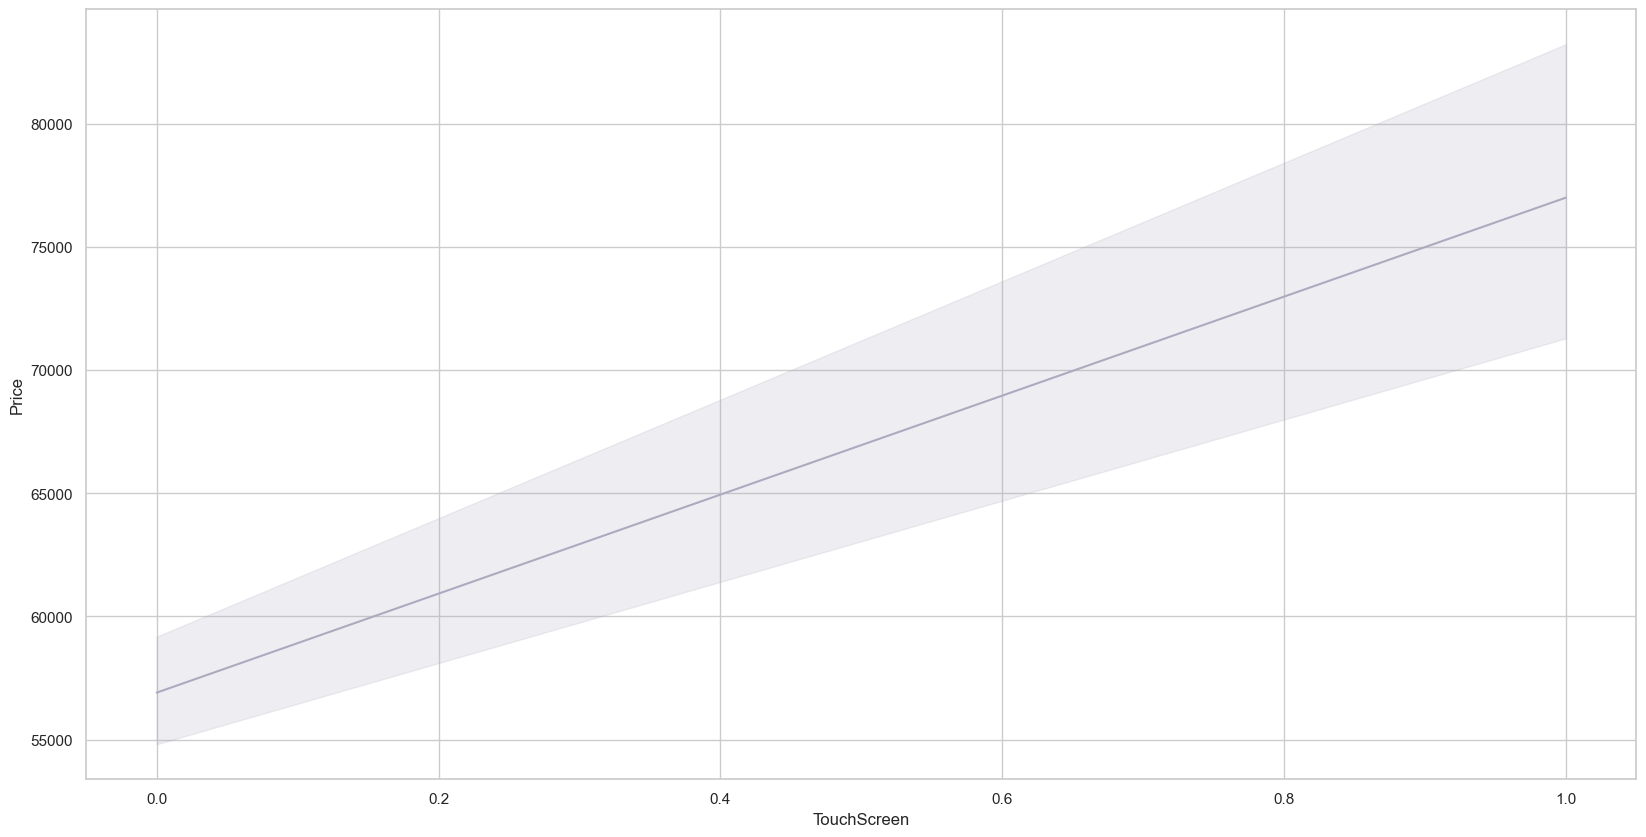

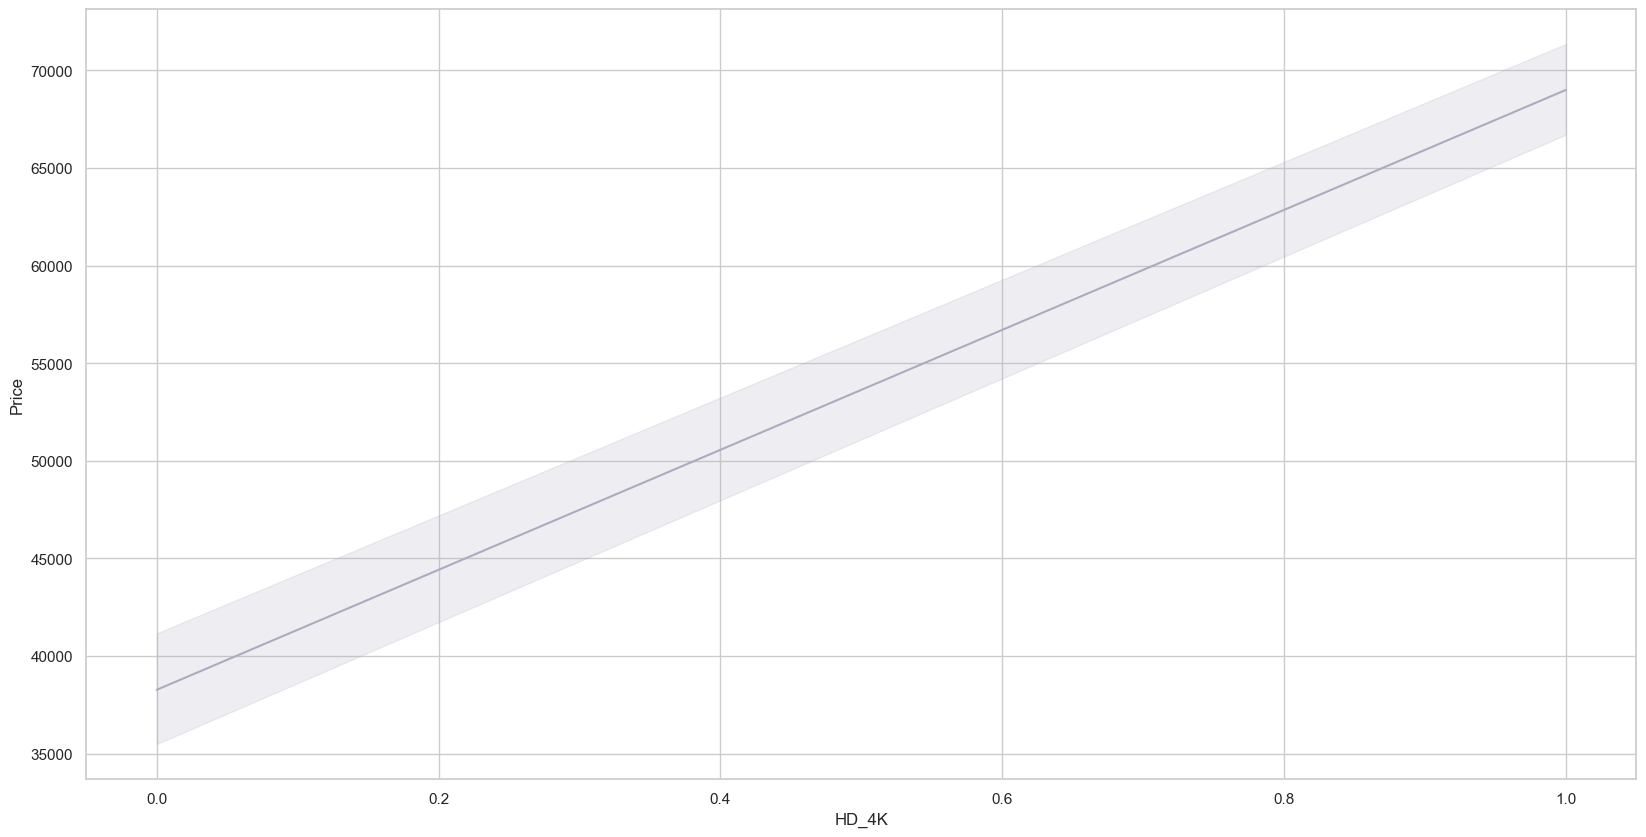

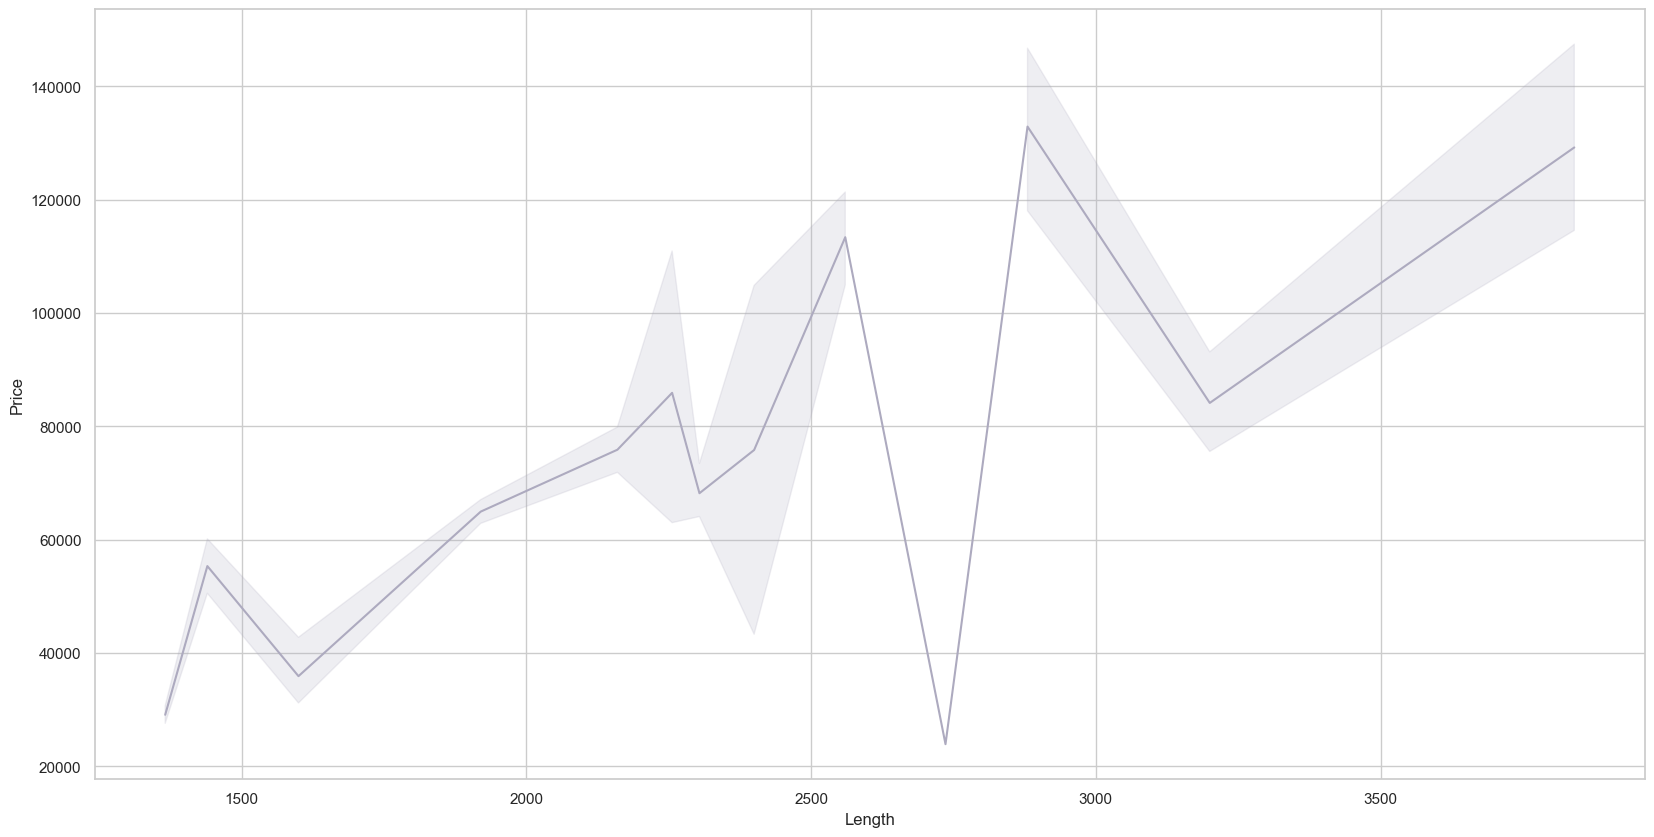

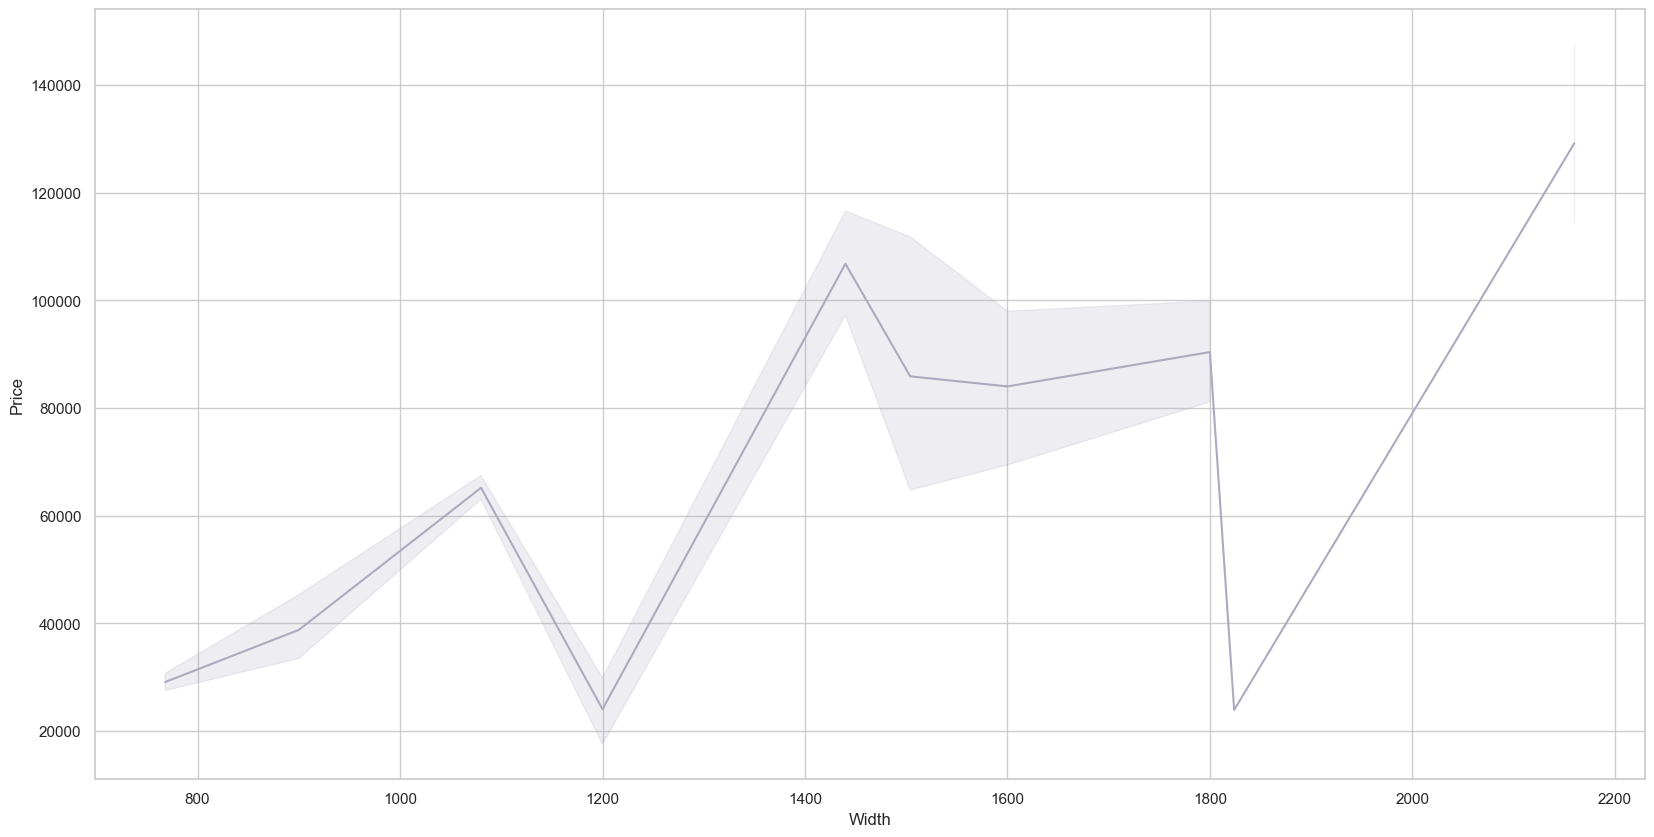

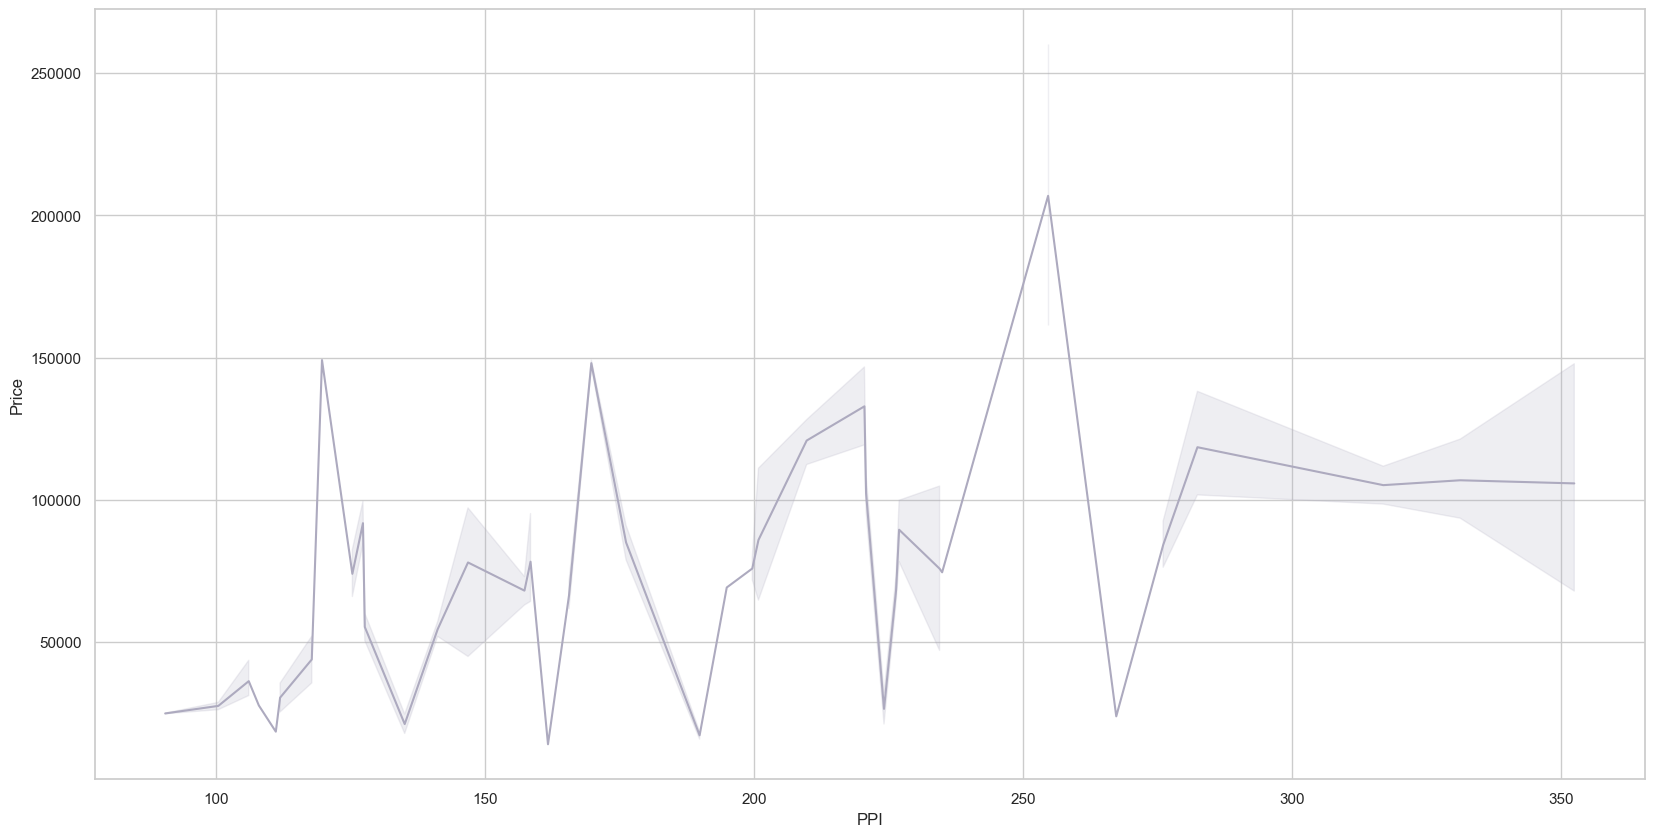

In [9]:
sns.set ( style = "whitegrid" )

for i in DF.drop ( columns = [ 'Price' , 'Weight' , 'CPU_Types' , 'Memory_Types' ]  ) :
    
    plt.figure ( figsize = ( 20 , 10 ) )
    
    sns.lineplot ( x = DF [ i ].sort_values ( ) , y = DF.Price , color = '#ADAABF' , markers = '*'  )
    
    plt.show()

#### OPERATING SYSTEM AND  SIZE DISTRIBUTION

<AxesSubplot:xlabel='OpSys', ylabel='Inches'>

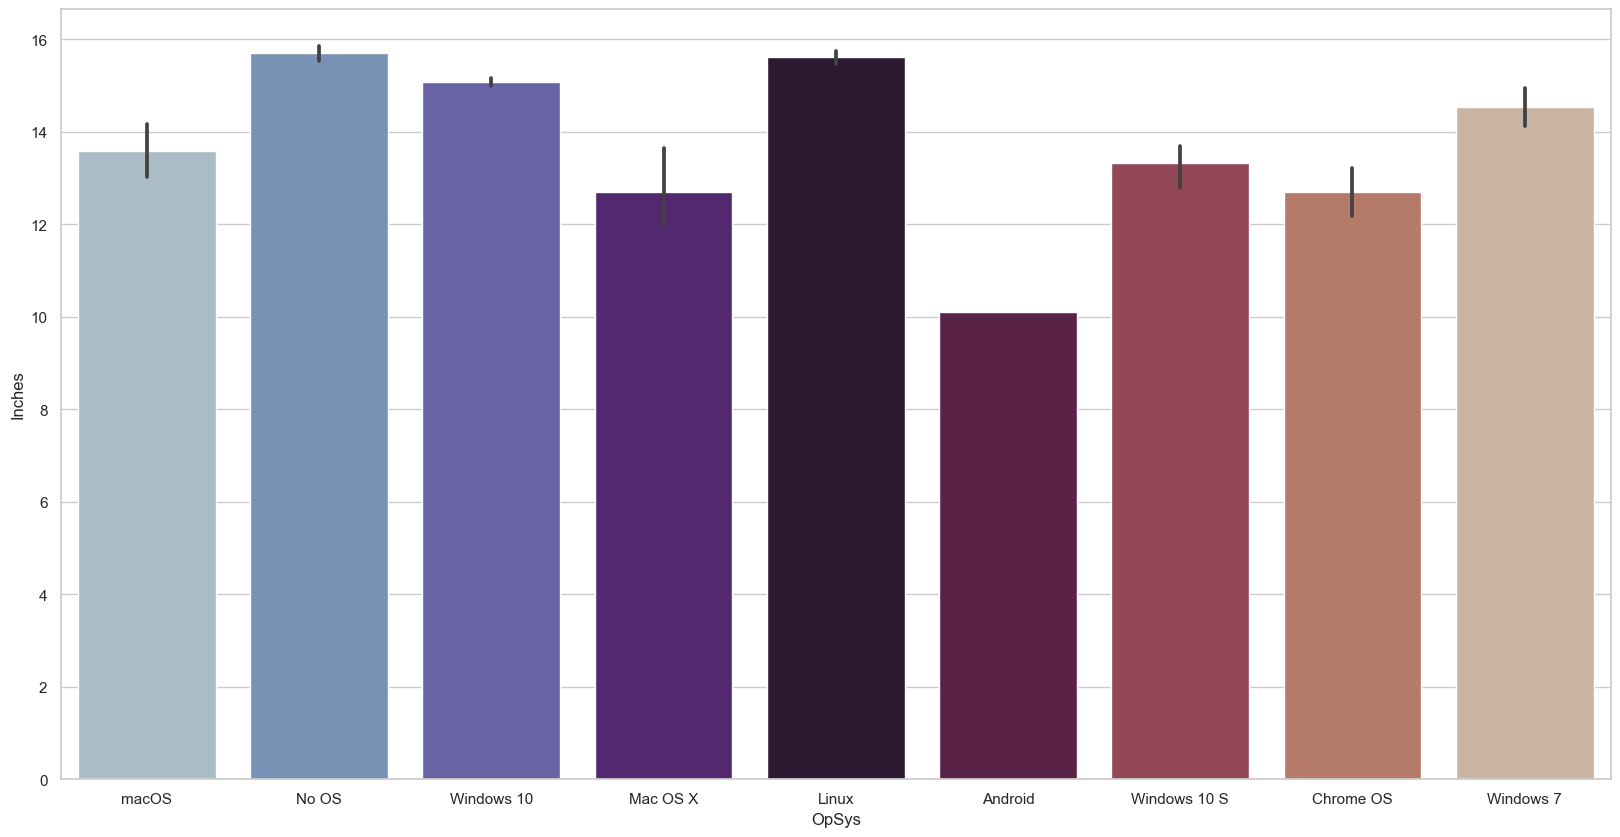

In [10]:
sns.set ( style = "whitegrid" )

plt.figure ( figsize = ( 20 , 10 ) )

sns.barplot ( y = DF.Inches , x = DF[ 'OpSys' ] , palette = 'twilight' )

#### PRICE DISTRIBUTION

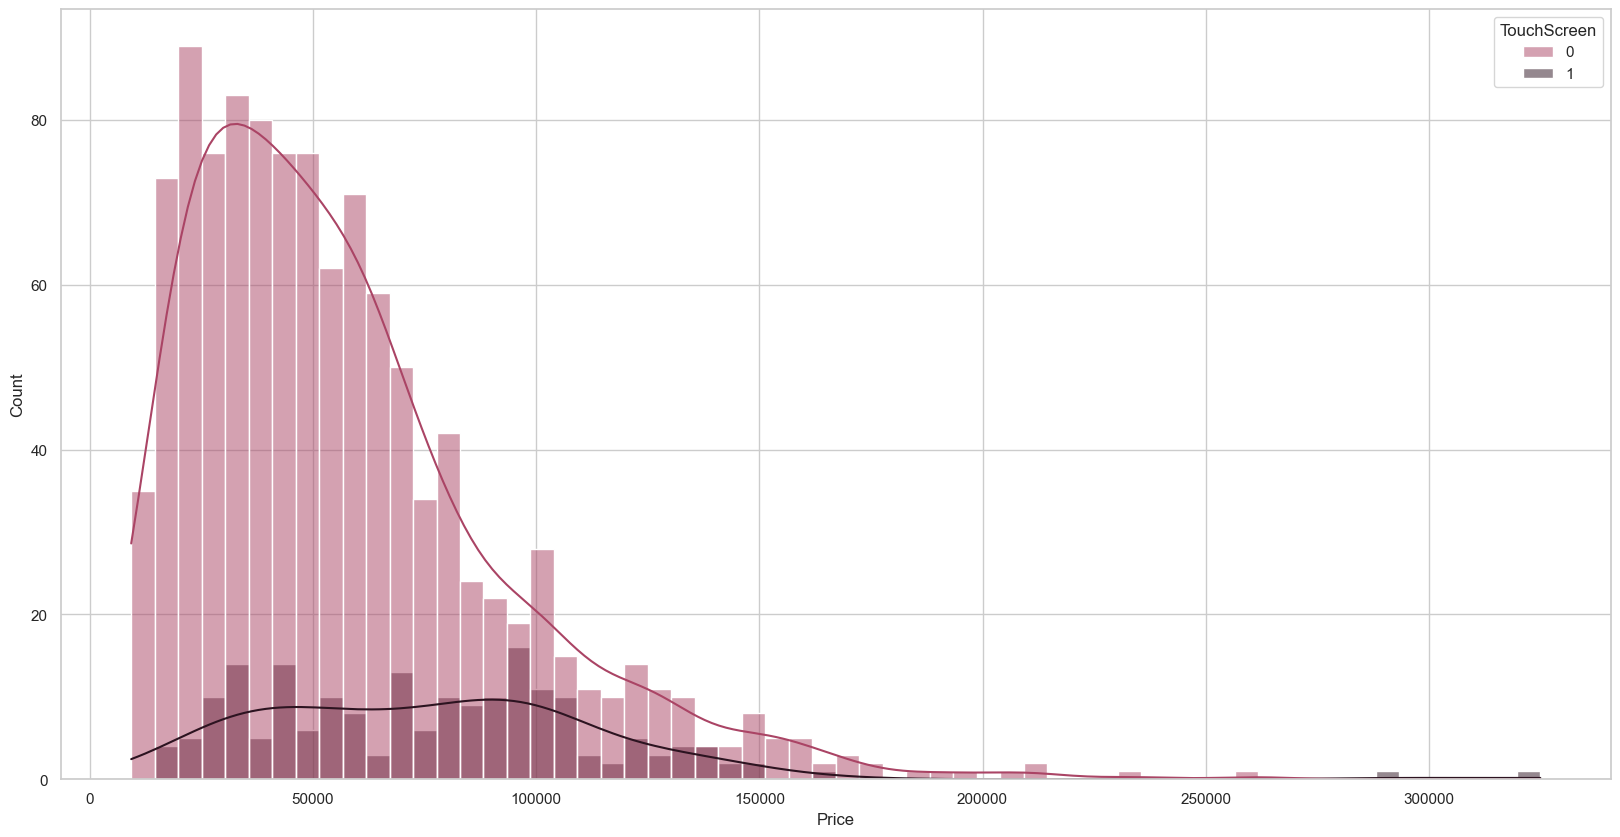

In [11]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( data = DF_Original , x = DF_Original.Price , kde = True , hue = 'TouchScreen' , palette = [ '#AA4465', '#2C1320' ] , bins = 60 );

#### RAM DISTRIBUTION

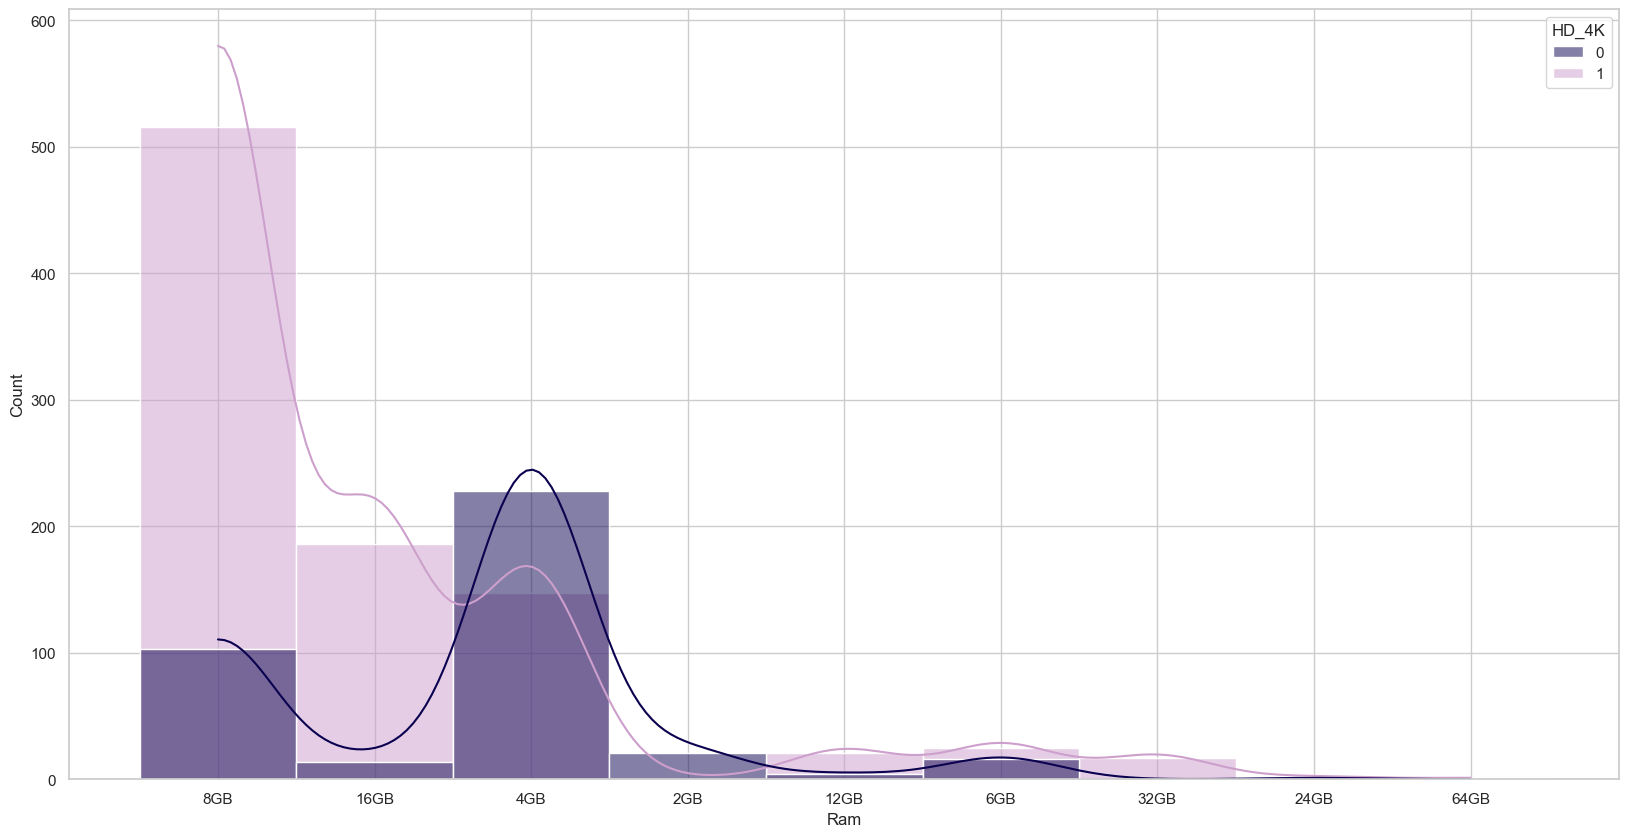

In [12]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( data = DF_Original , x = DF_Original.Ram , kde = True , hue =  'HD_4K' , palette = [ '#0A014F', '#CD9FCC' ] );

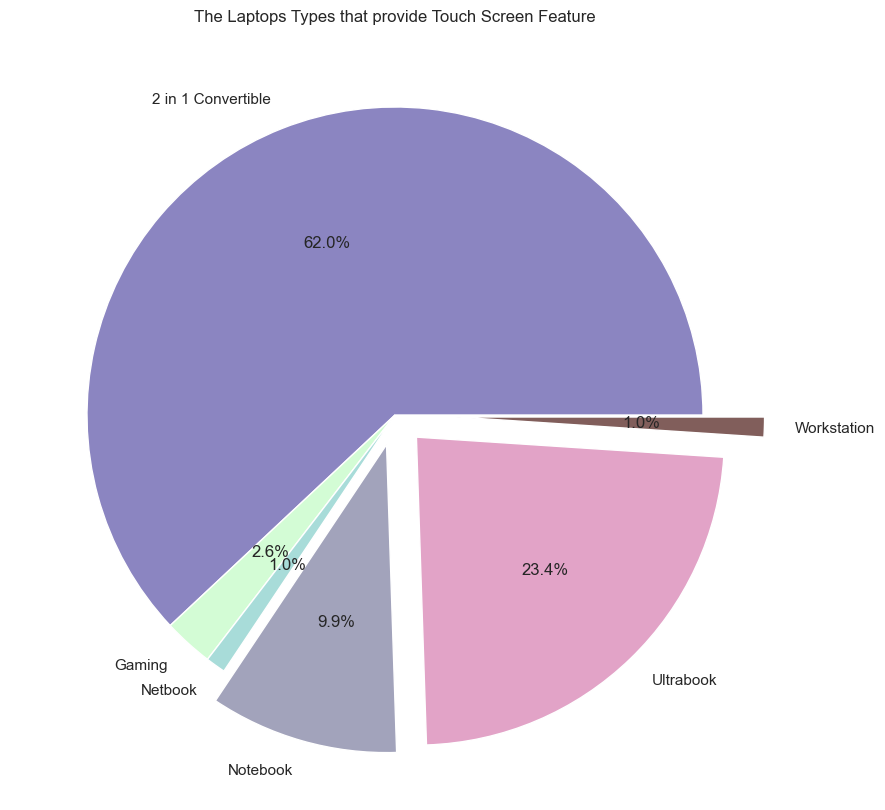

In [13]:
Data = DF.groupby ( by = ['TypeName']  ).sum ( ).reset_index ( ).loc [ : , ['TouchScreen', 'TypeName'] ]

Colors = [ '#8B85C1' , '#D3FCD5' , '#A8DCD9' , '#A2A3BB' , '#E2A3C7'  , '#815E5B' ,  '#7A6F9B' ]

plt.figure ( figsize = ( 20 , 10 ) )

plt.pie ( x = Data.TouchScreen , autopct = '%1.1f%%', colors = Colors , explode = [ 0 , 0 , 0 , 0.1 , 0.1 , 0.2 ] , labels = list(Data.TypeName.unique ( ))) ;

plt.title ( "The Laptops Types that provide Touch Screen Feature" );

#### SIZE DISTRIBUTION WRT CPU TYPES

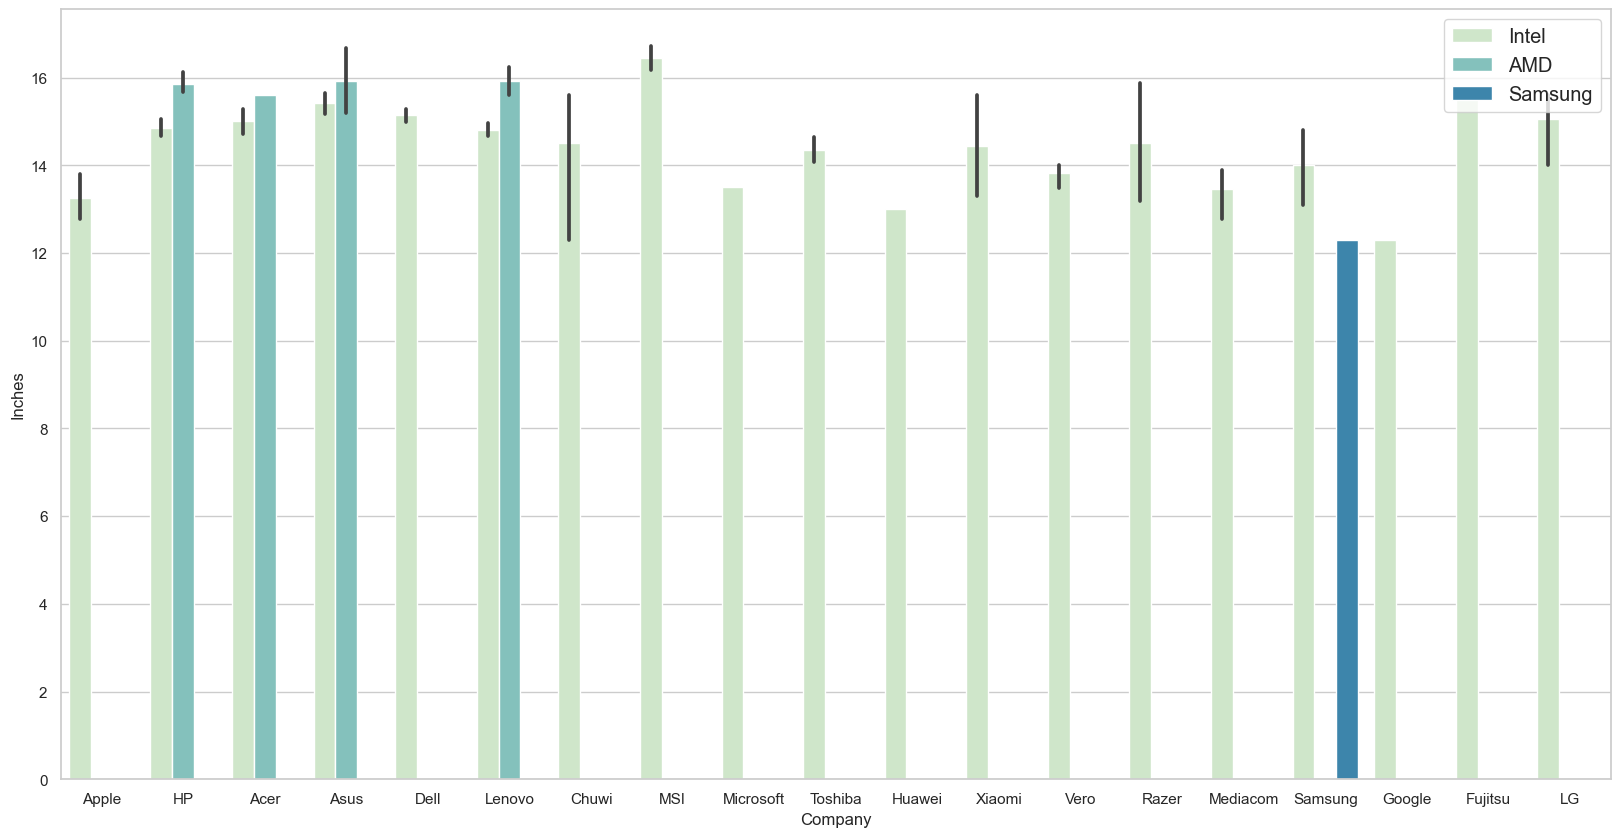

In [14]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.barplot ( x = 'Company' , y = 'Inches' , hue = 'CPU_Types' , data = DF_Original , palette = 'GnBu' )

plt.legend ( loc = 'upper right' , fontsize = 'large' )

plt.show ( )

### OUTLIERS

#### DETECTING OUTLIERS

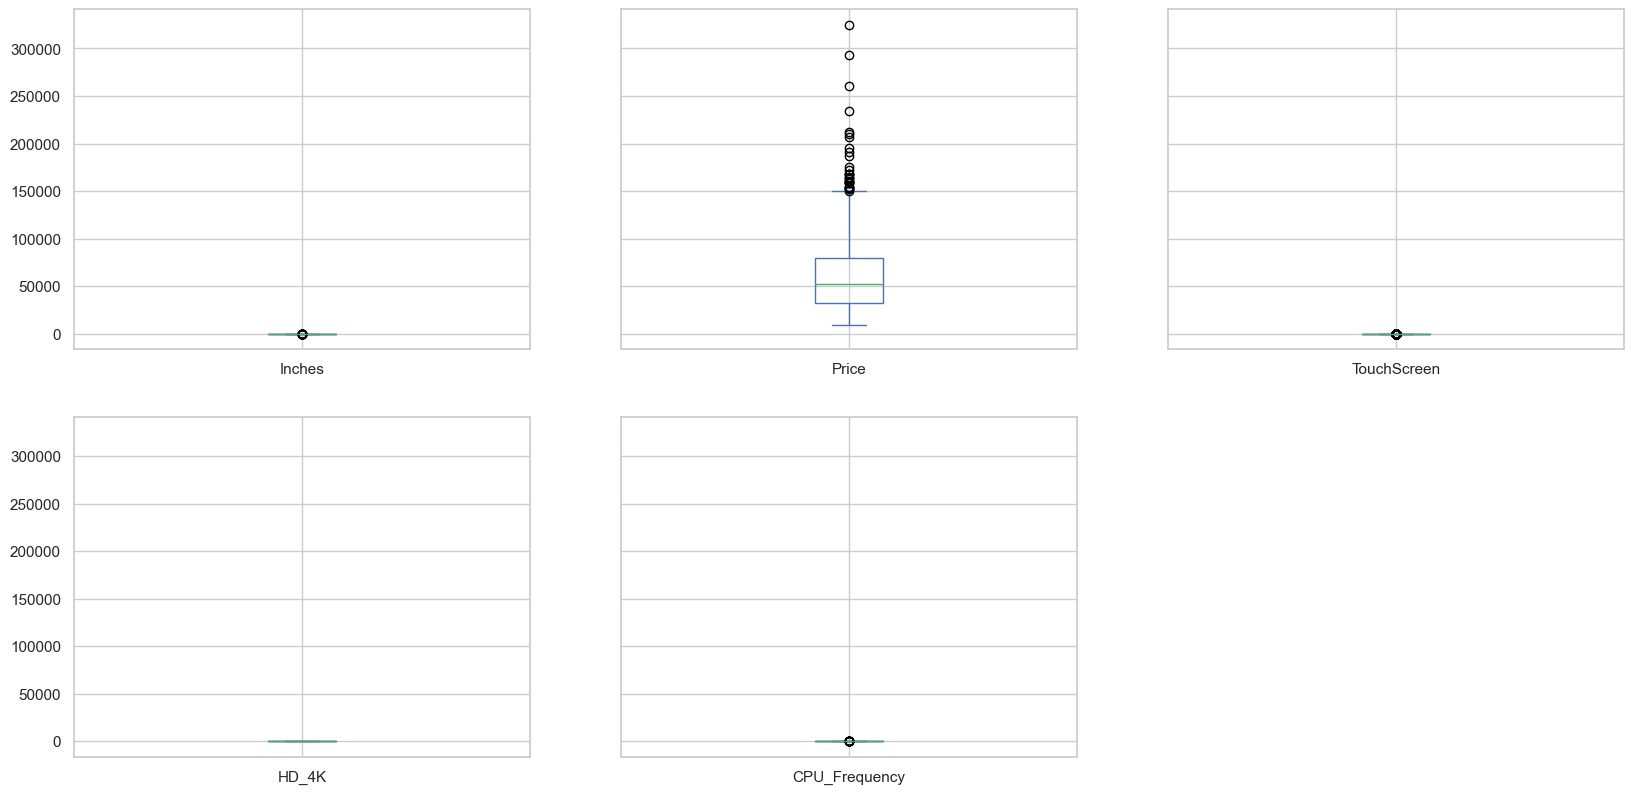

In [15]:
DF_Original.select_dtypes ( np.number ).plot ( kind = 'box' , subplots = True , layout = ( 3 , 3 ) , figsize = ( 20 , 15 ) , sharex = True , sharey = True );

#### TREATING OUTLIERS

In [16]:
Mean = DF.Price.mean ( )

Std_Dev = DF.Price.std ( )

Threshold = 3

Lower_Limit = Mean - Threshold * Std_Dev

Upper_Limit = Mean + Threshold * Std_Dev

DF [ 'Price' ] = DF [ 'Price' ].apply ( lambda x : Lower_Limit if x < Lower_Limit else ( Upper_Limit if x > Upper_Limit else x ) )

In [17]:
DF['Price']  = pd.DataFrame ( np.log1p ( DF [ [ 'Price' ] ] ) )

DF.Ram = DF.Ram.str.replace ( 'GB' , '' ).astype ( 'int64' )

DF.Weight = DF.Weight.str.replace ( 'kg' , '' ).astype ( 'float64' )

In [18]:
DF['Weight']  = pd.DataFrame ( np.log1p ( DF [ [ 'Weight' ] ] ) )

DF['PPI']  = pd.DataFrame ( np.log1p  ( DF [ [ 'PPI' ] ] ) )

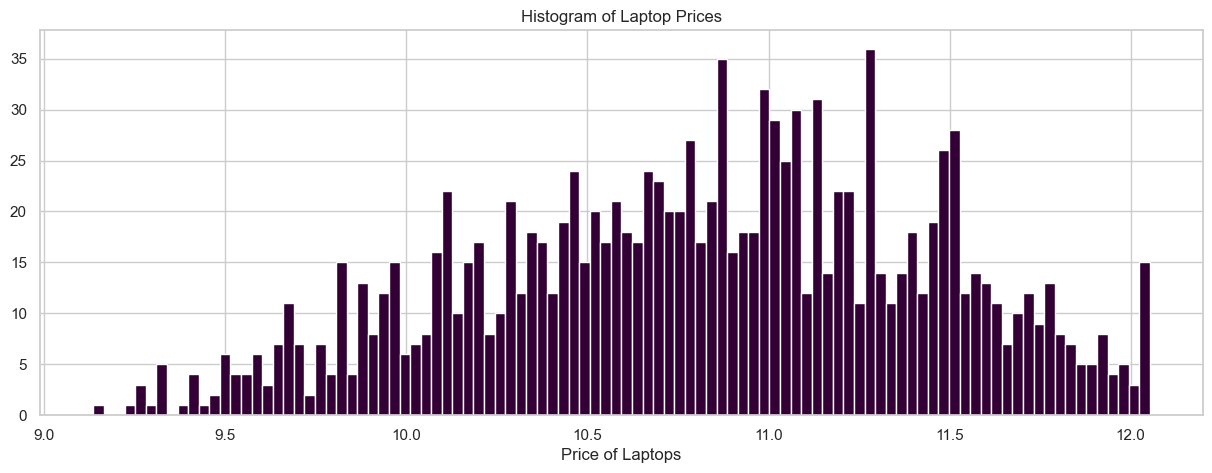

In [19]:
plt.figure ( figsize = ( 15 , 5 ) )

DF.Price.hist ( bins = 100 , color = '#330036' );

plt.xlabel ( "Price of Laptops" )

plt.title ( "Histogram of Laptop Prices" );

## DATA CLEANING

### NULL VALUES

In [20]:
print ( 'The null values in the Data Set are as follows : \n' )

DF.isnull ( ).sum ( ) [ DF.isnull ( ).sum ( ) > 0 ]

The null values in the Data Set are as follows : 



Series([], dtype: int64)

### CATEGORICAL COLUMNS 

In [21]:
DF.select_dtypes ( 'object' )

Company            TypeName       OpSys CPU_Types   Memory_Types
0      Apple           Ultrabook       macOS     Intel            SSD
1      Apple           Ultrabook       macOS     Intel  Flash Storage
2         HP            Notebook       No OS     Intel            SSD
3      Apple           Ultrabook       macOS     Intel            SSD
4      Apple           Ultrabook       macOS     Intel            SSD
...      ...                 ...         ...       ...            ...
1298  Lenovo  2 in 1 Convertible  Windows 10     Intel            SSD
1299  Lenovo  2 in 1 Convertible  Windows 10     Intel            SSD
1300  Lenovo            Notebook  Windows 10     Intel  Flash Storage
1301      HP            Notebook  Windows 10     Intel            HDD
1302    Asus            Notebook  Windows 10     Intel            HDD

[1303 rows x 5 columns]

In [22]:
Categorical_Columns = DF.select_dtypes ( 'object' ).columns.to_list ( )

Categorical_Columns

['Company', 'TypeName', 'OpSys', 'CPU_Types', 'Memory_Types']

In [23]:
for i in DF.loc [ : , Categorical_Columns ] :
    
    print ( "\n--------------------------------------------------------------------------\n" , "Column => " , i )
    
    display ( DF [ i ].value_counts ( ) )


--------------------------------------------------------------------------
 Column =>  Company


Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64


--------------------------------------------------------------------------
 Column =>  TypeName


Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64


--------------------------------------------------------------------------
 Column =>  OpSys


Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64


--------------------------------------------------------------------------
 Column =>  CPU_Types


Intel      1240
AMD          62
Samsung       1
Name: CPU_Types, dtype: int64


--------------------------------------------------------------------------
 Column =>  Memory_Types


SSD              653
HDD              575
Flash Storage     75
Name: Memory_Types, dtype: int64

### CORRELATION 

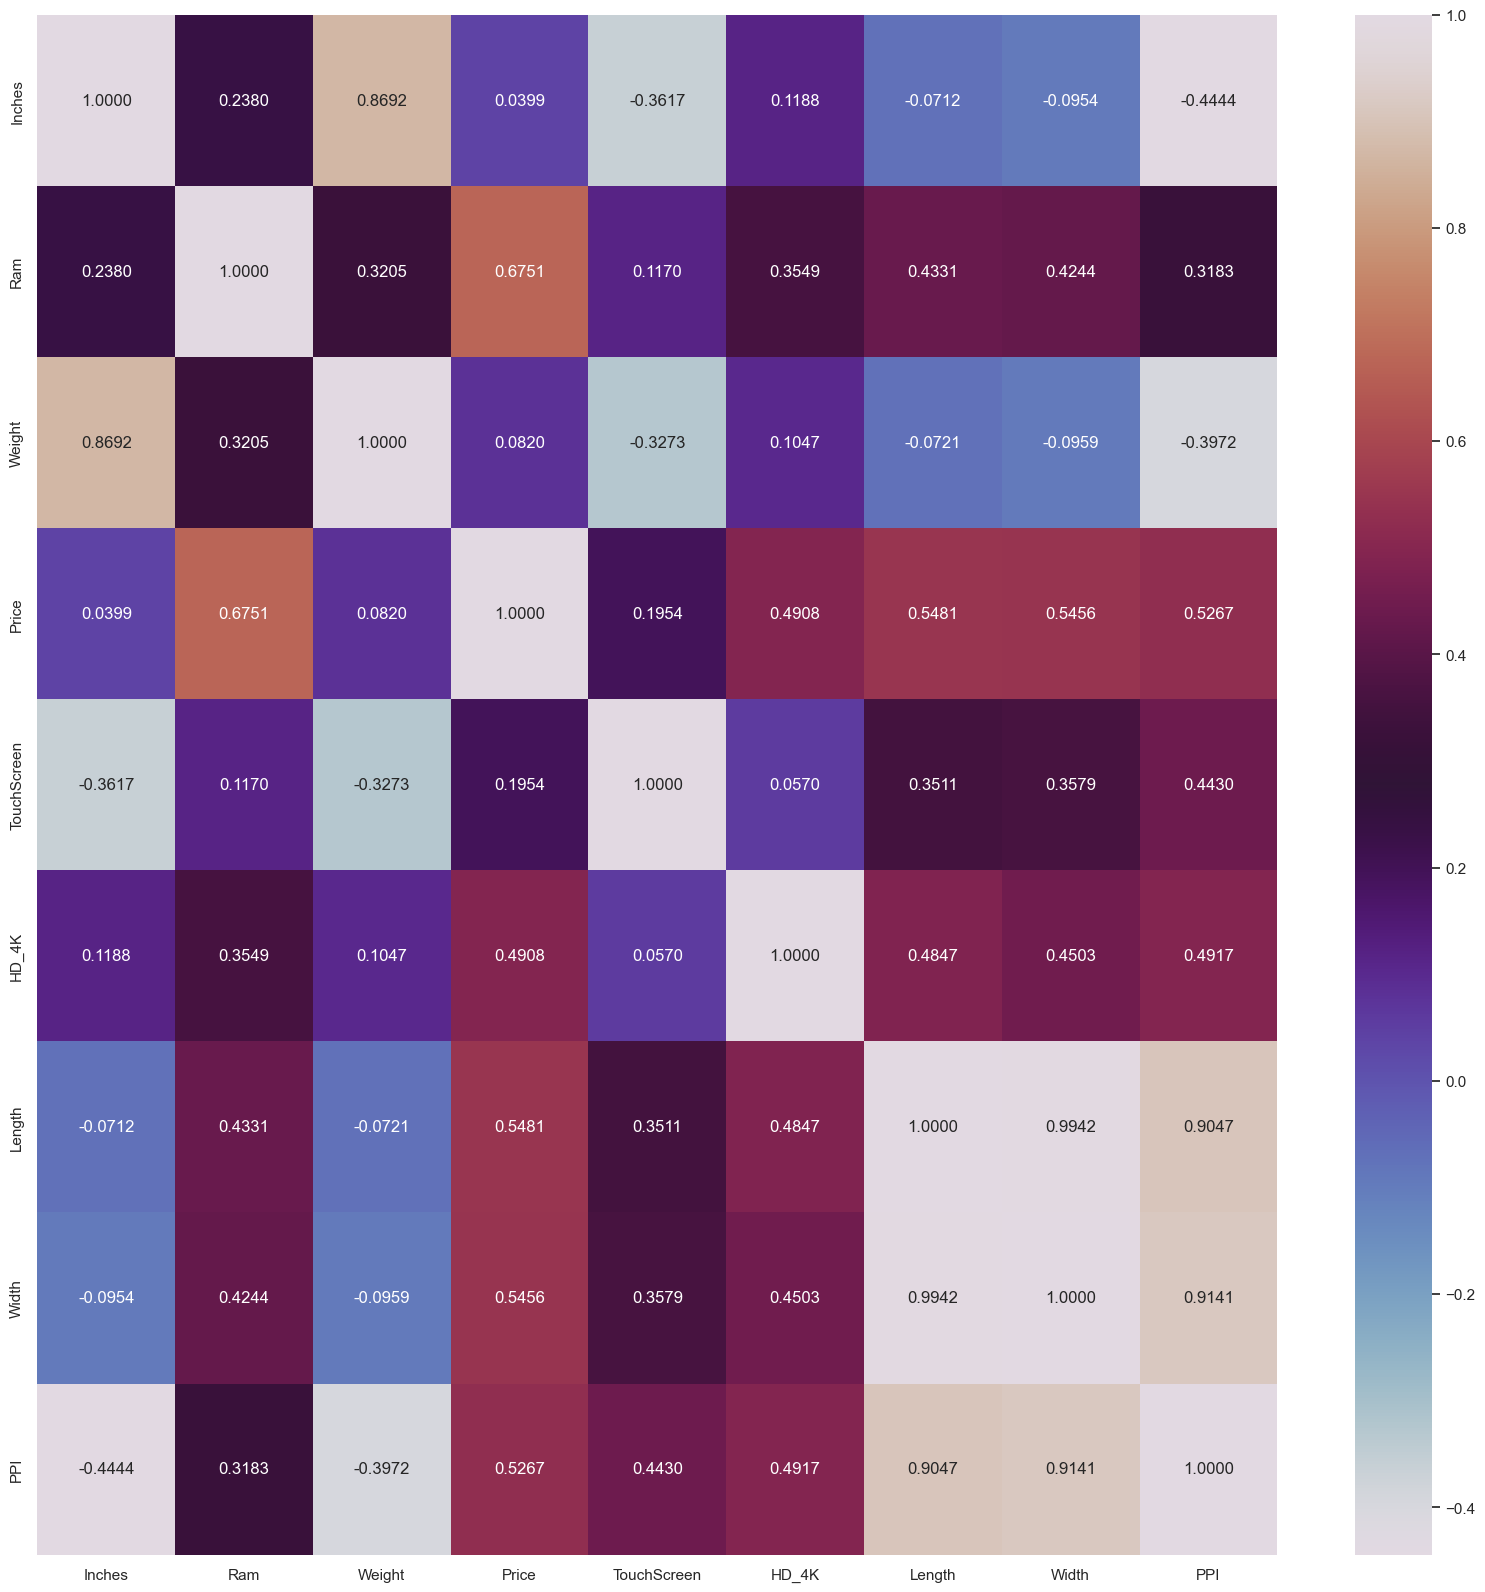

In [24]:
plt.figure ( figsize = ( 20 , 20 ) )

sns.heatmap ( data = DF.corr ( ) , cmap = 'twilight' , annot = True , fmt = '0.4f' );

In [25]:
DF.corr ( ) [ (DF.corr ( ) > 0.2) | ( DF.corr ( ) < -0.2 )].fillna ( '-' )

Inches       Ram    Weight     Price TouchScreen     HD_4K  \
Inches            1.0  0.237993  0.869212         -   -0.361735         -   
Ram          0.237993       1.0  0.320475  0.675133           -   0.35487   
Weight       0.869212  0.320475       1.0         -   -0.327295         -   
Price               -  0.675133         -       1.0           -  0.490754   
TouchScreen -0.361735         - -0.327295         -         1.0         -   
HD_4K               -   0.35487         -  0.490754           -       1.0   
Length              -  0.433121         -  0.548136    0.351066  0.484739   
Width               -  0.424437         -  0.545568     0.35793  0.450274   
PPI         -0.444368  0.318253 -0.397236  0.526693    0.442987  0.491712   

               Length     Width       PPI  
Inches              -         - -0.444368  
Ram          0.433121  0.424437  0.318253  
Weight              -         - -0.397236  
Price        0.548136  0.545568  0.526693  
TouchScreen  0.351066   0.35793  0.442987  
HD_4K        0.484739  0.450274  0.491712  
Length            1.0  0.994219  0.904710  
Width        0.994219       1.0  0.914073  
PPI           0.90471  0.914073  1.000000

## DATA PREPROCESSING 

In [26]:
Train , Test = train_test_split ( DF , random_state = 42 )

Train_X = Train.drop ( columns = [ 'Price' , 'Inches' , 'Length' , 'Width' , 'HD_4K' ] )

Train_Y = Train.Price

Test_X = Test.drop (  columns = [ 'Price' , 'Inches' , 'Length' , 'Width' , 'HD_4K' ] )

Test_Y = Test.Price

print ( "The sizes or dimensions of the data sets are : \n" )

print ( "Train : {}\n\nTest : {}\n".format ( Train.shape , Test.shape ) )

print ( "Train X : {}\n\nTrain Y : {}\n\nTest X : {}\n\nTest Y : {}\n".format ( Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape ) )

The sizes or dimensions of the data sets are : 

Train : (977, 14)

Test : (326, 14)

Train X : (977, 9)

Train Y : (977,)

Test X : (326, 9)

Test Y : (326,)



In [27]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)

## PREDICTIVE MODELING

### LINEAR REGRESSION 

In [28]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)

Step1 = ColumnTransformer ( transformers = [ ('col_tnf' , OneHotEncoder ( sparse = False , drop = 'first' ) , Columns ) ] , remainder = 'passthrough') 

Step2 = LinearRegression ( )

Pipeline_LR = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )

Pipeline_LR.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step2', LinearRegression())])

In [29]:
Y_LR = Pipeline_LR.predict ( Test_X )

R2_LR = r2_score ( Test_Y , Y_LR ) * 100

N = Train_X.shape[0] 

P = Train_X.shape[1]

print ( "The R2 value or Coefficient of determination is : " , R2_LR )

Adjusted_R2_LR = 1 - ( ( 1 - R2_LR ) * ( N - 1 ) / ( N - 1 - P ) )

MSE_LR = mean_squared_error ( Test_Y , Y_LR )

RMSE_LR = np.sqrt ( MSE_LR )

MAPE_LR = mean_absolute_percentage_error ( Test_Y , Y_LR ) * 100

MAE_LR = mean_absolute_error ( Test_Y , Y_LR )

print ( "\nThe Adjusted R2 value is : " , Adjusted_R2_LR )

The R2 value or Coefficient of determination is :  73.11092702859794

The Adjusted R2 value is :  73.78207319535842


In [30]:
LR_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] , 
        
           'Values' : [ R2_LR , Adjusted_R2_LR , MSE_LR , RMSE_LR , MAPE_LR , MAE_LR ] }

LR_Performance_Metrics = pd.DataFrame ( LR_PM )

LR_Performance_Metrics

Performance Metric     Values
0                 R2  73.110927
1        Adjusted_R2  73.782073
2                MSE   0.095202
3               RMSE   0.308548
4               MAPE   2.198234
5                MAE   0.238854

#### CHECKING FOR ASSUMPTIONS

##### NORMAL DISTRIBUTION

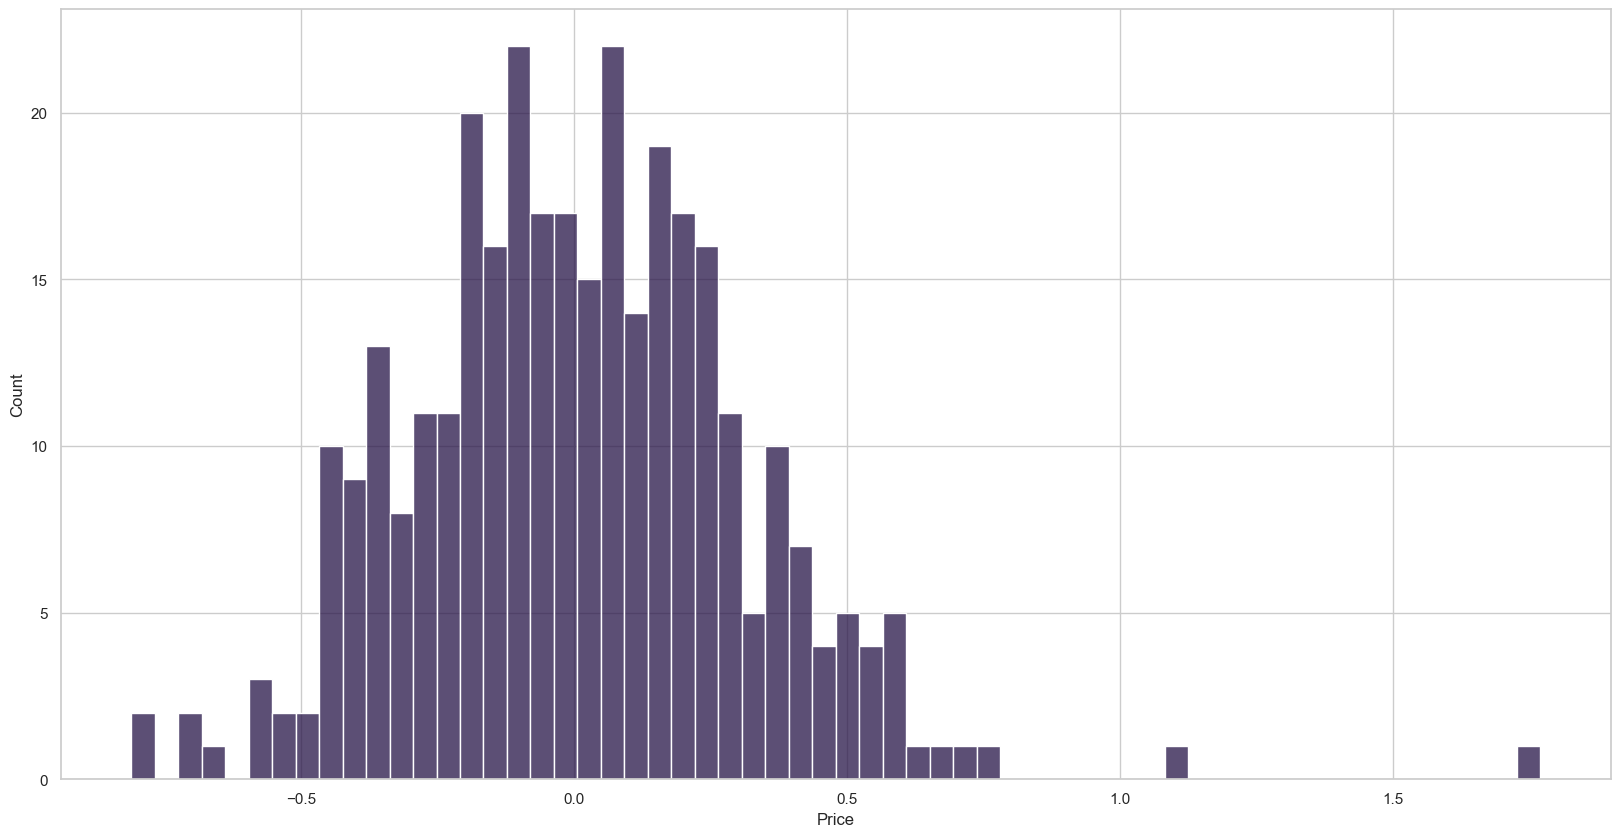

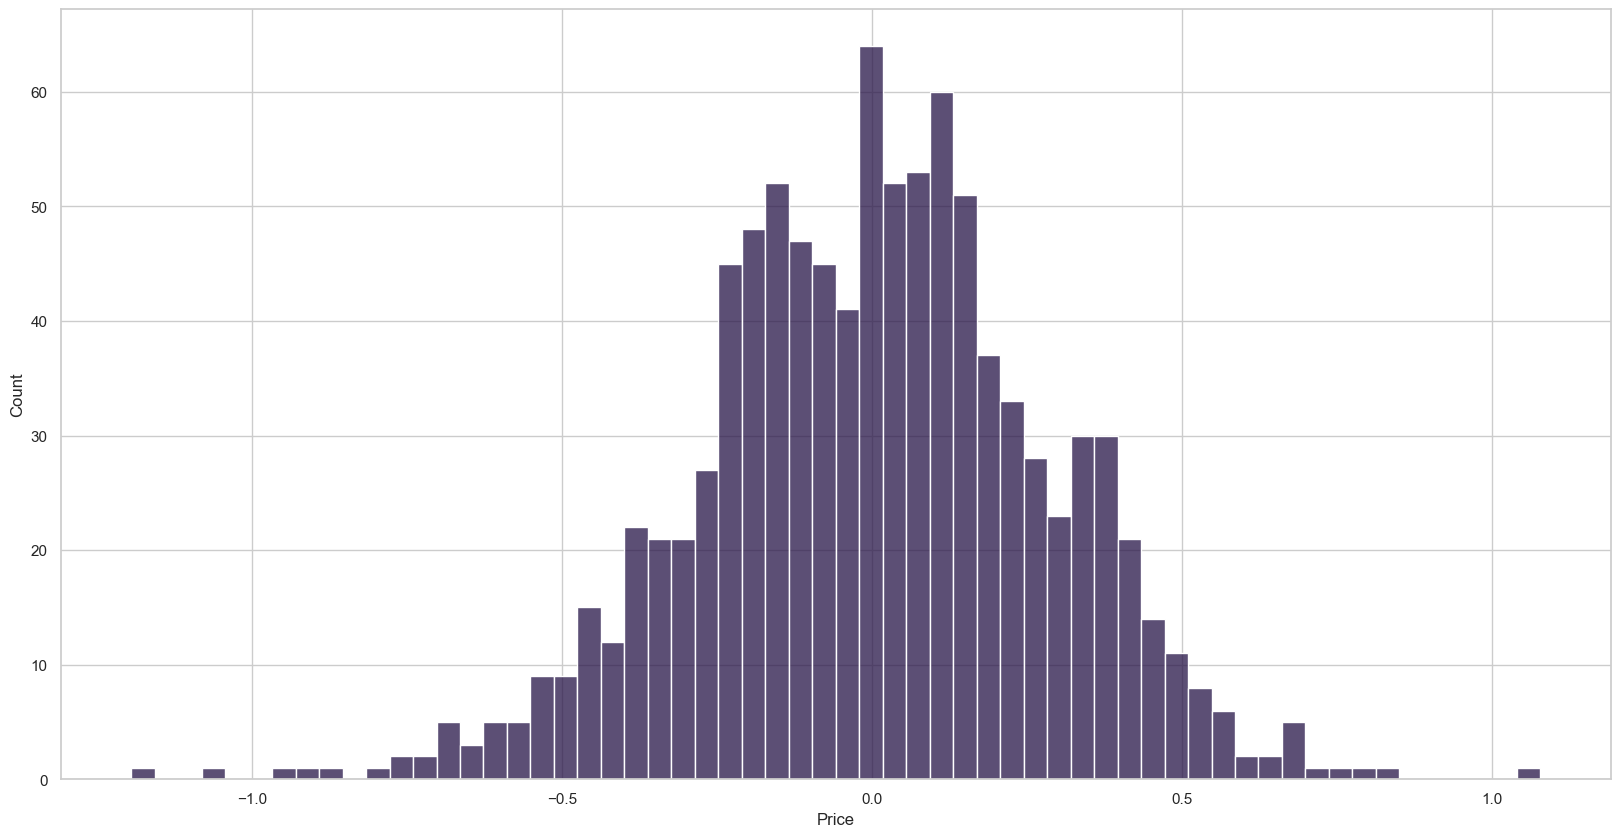

In [31]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_LR - Test_Y ) , bins = 60 , color = '#261447' )

Y_Train_LR = Pipeline_LR.predict ( Train_X )

plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_Train_LR - Train_Y ) , bins = 60 , color = '#261447' );

    SKEWNESS & KURTOSIS

In [32]:
# The skewness of a normal distribution is 0

Error_Train = Train_Y - Y_Train_LR 

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )

# The kurtosis of a normal distribution is 3 

print ( "\nThe kurotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.17

The kurotis value of Train is :  3.57


In [33]:
# The skewness of a normal distribution is 0

Error_Test = Test_Y - Y_LR 

print ( "The skewness value of Test is : ", np.round ( Error_Test.skew ( ) , 2 ) )

# The kurtosis of a normal distribution is 3 

print ( "\nThe kurotis value of Test is : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

The skewness value of Test is :  -0.66

The kurotis value of Test is :  5.96


##### HOMOSCEDASTICITY  

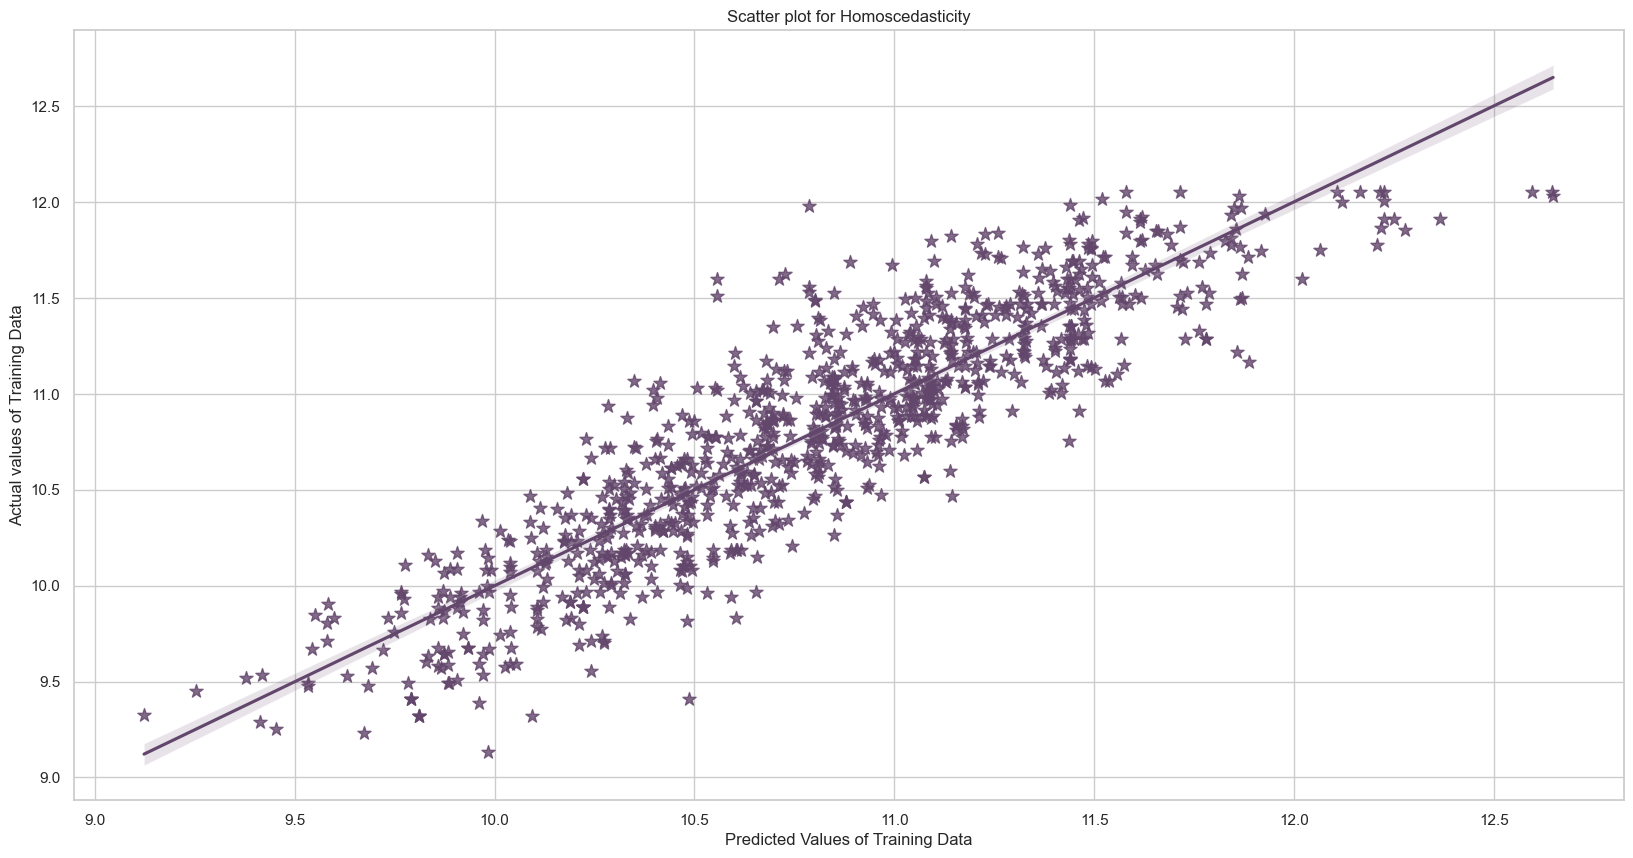

In [34]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_Train_LR , y = Train_Y , color = '#62466B' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Training Data" );

plt.ylabel ( "Actual values of Training Data" );

plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

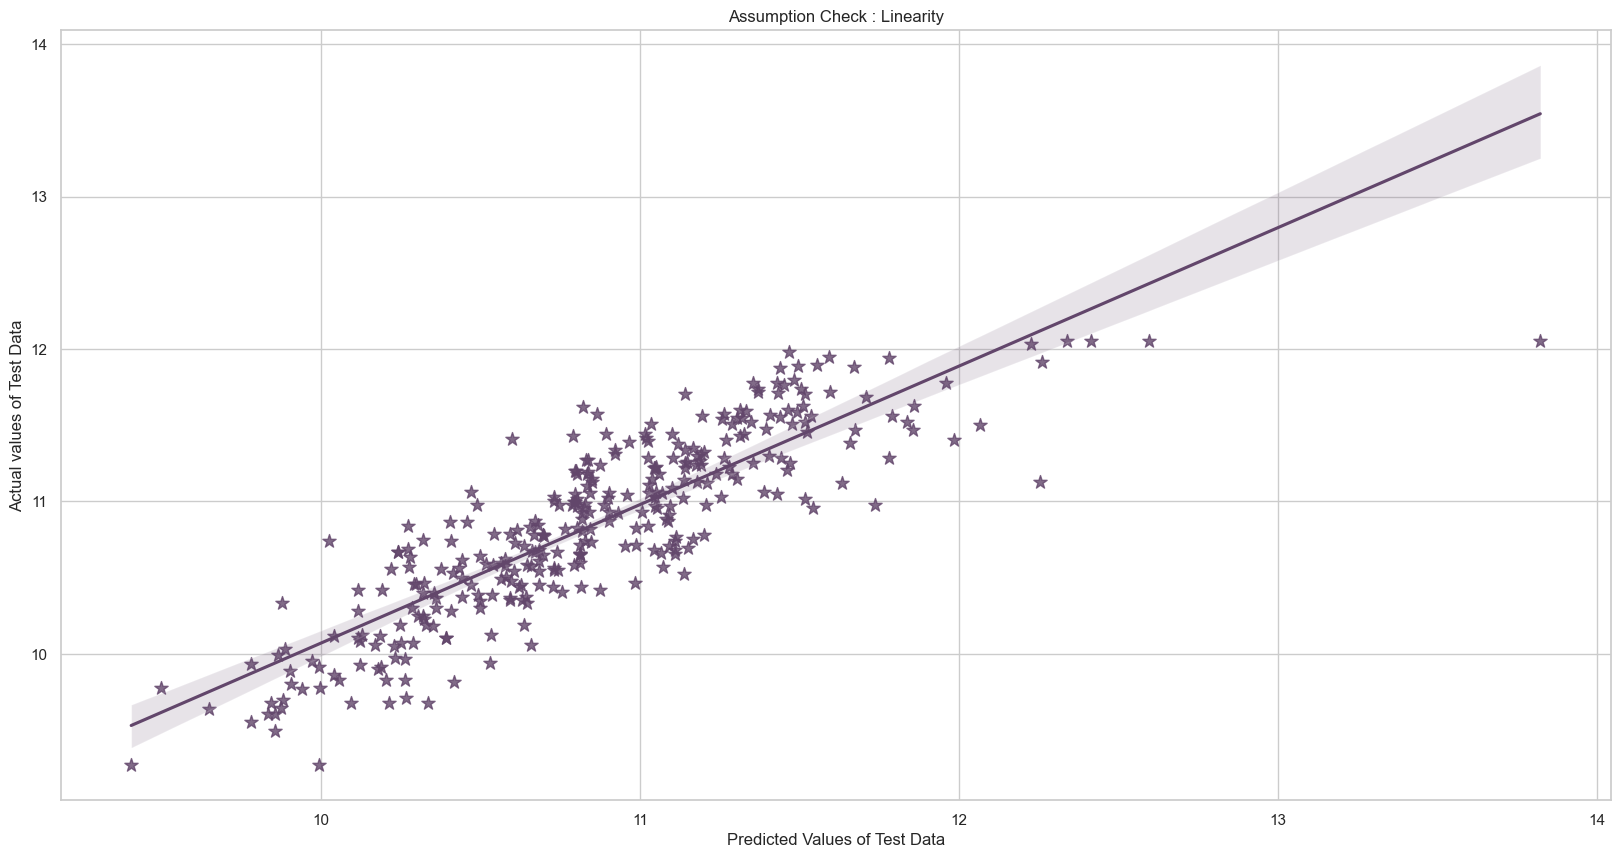

In [35]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_LR , y = Test_Y , color = '#62466B' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Test Data" );

plt.ylabel ( "Actual values of Test Data" );

plt.title ( "Assumption Check : Linearity" );

### RIDGE REGRESSION 

In [36]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)

Step1 = ColumnTransformer ( transformers = [ ('col_tnf' , OneHotEncoder ( sparse = False , drop = 'first' ) , Columns ) ] , remainder = 'passthrough') 

R = Ridge ( )

Parameters = { 'alpha' : [ 1.0 , 2.0 , 3.0 ] , 'max_iter' : [ 100 , 200 , 500 ] }

Step2 = GridSearchCV ( estimator = R , param_grid = Parameters , cv = 5 )

Pipeline_R = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )

Pipeline_R.fit ( Train_X , Train_Y )

Parameters = Step2.best_params_

Step3 = Ridge ( **Parameters )

Pipeline_R = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )

Pipeline_R.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3', Ridge(max_iter=100))])

In [37]:
Y_R = Pipeline_R.predict ( Test_X )

R2_R = r2_score ( Test_Y , Y_R ) * 100

N = Train_X.shape[0] 

P = Train_X.shape[1]

print ( "The R2 value or Coefficient of determination is : " , R2_R )

Adjusted_R2_R = 1 - ( ( 1 - R2_R ) * ( N - 1 ) / ( N - 1 - P ) )

MSE_R = mean_squared_error ( Test_Y , Y_R )

RMSE_R = np.sqrt ( MSE_R )

MAPE_R = mean_absolute_percentage_error ( Test_Y , Y_R ) * 100

MAE_R = mean_absolute_error ( Test_Y , Y_R )

print ( "\nThe Adjusted R2 value is : " , Adjusted_R2_R )

The R2 value or Coefficient of determination is :  72.43853797188218

The Adjusted R2 value is :  73.10342612260291


In [38]:
R_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] , 
        
           'Values' : [ R2_R , Adjusted_R2_R , MSE_R , RMSE_R , MAPE_R , MAE_R ] }

R_Performance_Metrics = pd.DataFrame ( R_PM )

R_Performance_Metrics

Performance Metric     Values
0                 R2  72.438538
1        Adjusted_R2  73.103426
2                MSE   0.097582
3               RMSE   0.312382
4               MAPE   2.214919
5                MAE   0.240681

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

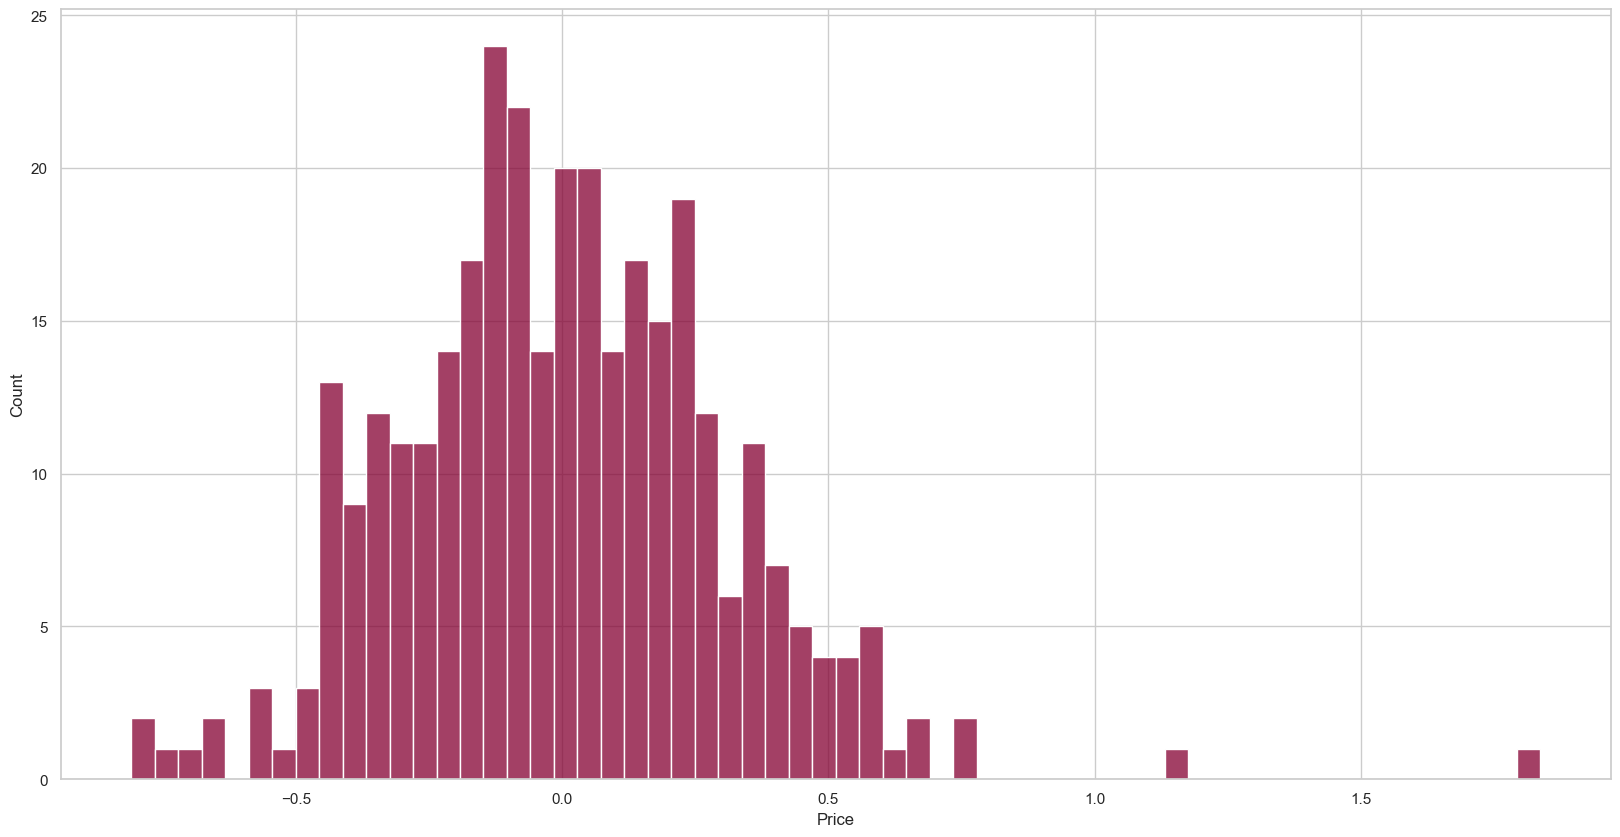

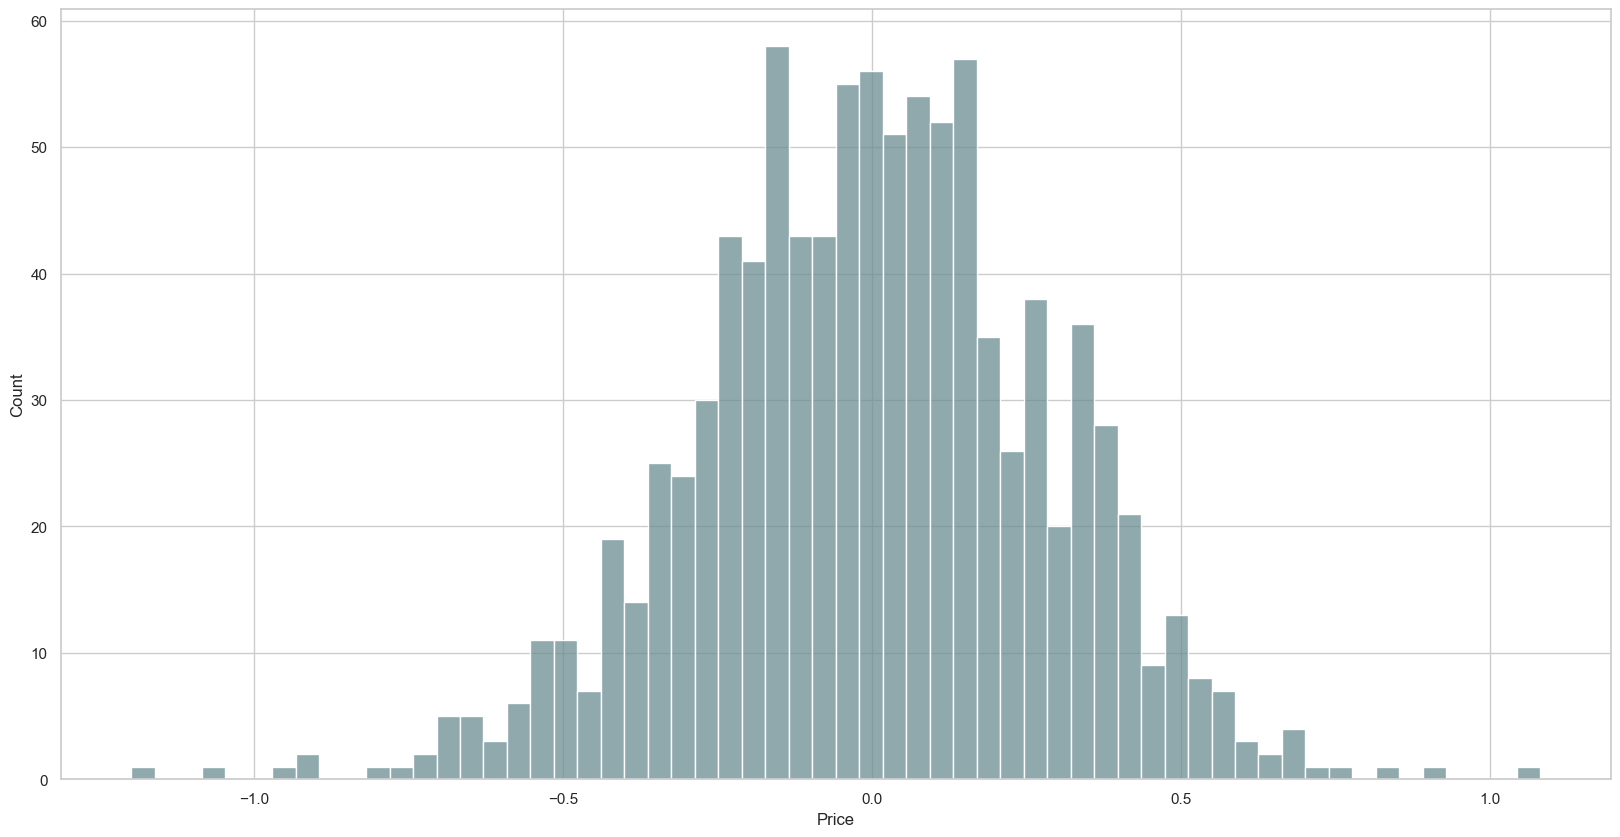

In [39]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_R - Test_Y ) , bins = 60 , color = '#840032' )

Y_Train_R = Pipeline_R.predict ( Train_X )

plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_Train_R - Train_Y ) , bins = 60 , color = '#6A8D92' );

In [40]:
Error_Train = Train_Y - Y_Train_R 

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.17

The kurotis value of Train is :  3.59


In [41]:
Error_Test = Test_Y - Y_R 

print ( "The skewness value of Test is : ", np.round ( Error_Test.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Test is : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

The skewness value of Test is :  -0.74

The kurotis value of Test is :  6.38


##### HOMOSCEDASTICITY

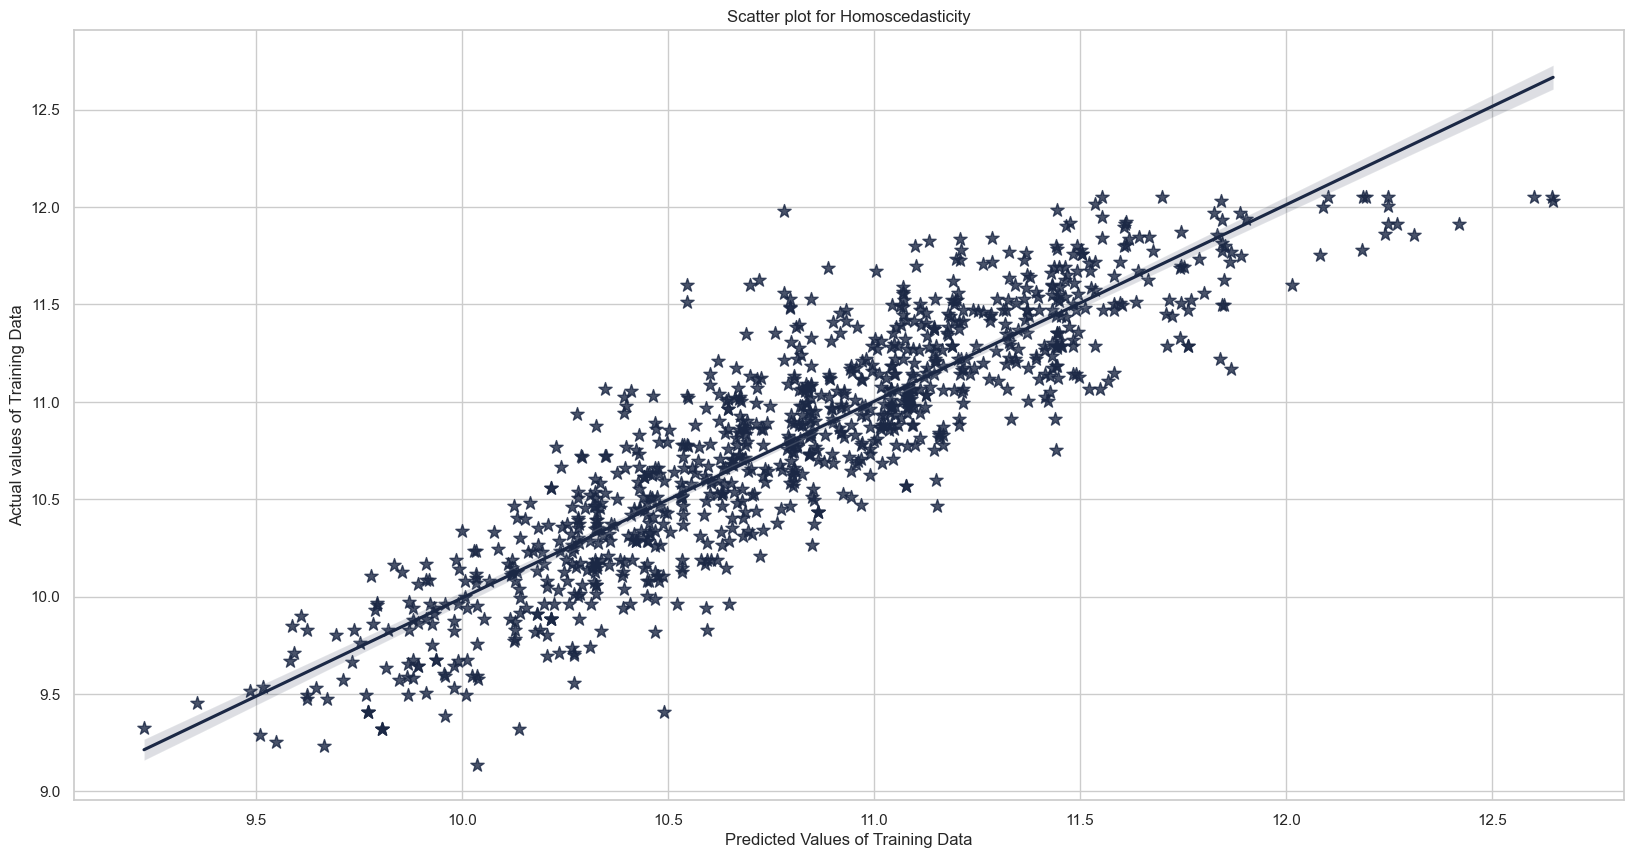

In [42]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_Train_R , y = Train_Y , color = '#1B2845' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Training Data" );

plt.ylabel ( "Actual values of Training Data" );

plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

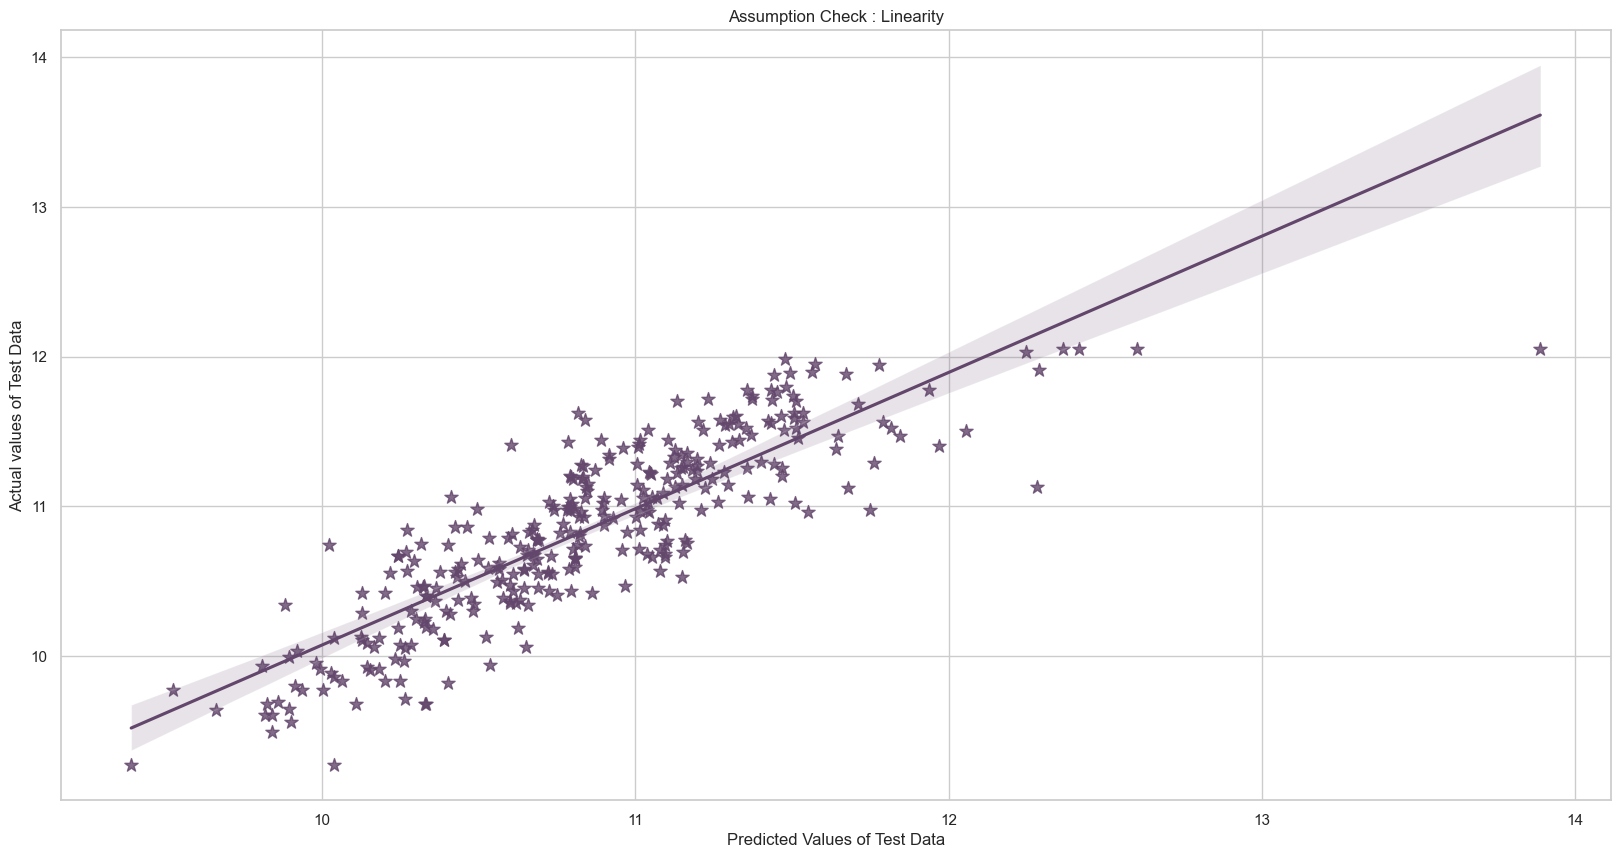

In [43]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_R , y = Test_Y , color = '#62466B' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Test Data" );

plt.ylabel ( "Actual values of Test Data" );

plt.title ( "Assumption Check : Linearity" );

### DECISION TREE REGRESSION 

In [44]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)

Step1 = ColumnTransformer ( transformers = [ ('col_tnf' , OneHotEncoder ( sparse = False , drop = 'first' ) , Columns ) ] , remainder = 'passthrough') 

DT = DecisionTreeRegressor ( )

Parameters = { 'criterion' : [ "squared_error", "friedman_mse", "absolute_error", "poisson" ] ,
              
              'max_depth' : [ 10 , 15 , 20 ] , 'max_features' : [ "auto", "sqrt", "log2" ] }

Step2 = GridSearchCV ( estimator = DT , param_grid = Parameters , cv = 5 )

Pipeline_DT = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )

Pipeline_DT.fit ( Train_X , Train_Y )

Parameters = Step2.best_params_

Step3 = DecisionTreeRegressor ( **Parameters )

Pipeline_DT = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )

Pipeline_DT.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 DecisionTreeRegressor(max_depth=15, max_features='sqrt'))])

In [45]:
Y_DT = Pipeline_DT.predict ( Test_X )

R2_DT = r2_score ( Test_Y , Y_DT ) * 100

N = Train_X.shape[0] 

P = Train_X.shape[1]

print ( "The R2 value or Coefficient of determination is : " , R2_DT )

Adjusted_R2_DT = 1 - ( ( 1 - R2_DT ) * ( N - 1 ) / ( N - 1 - P ) )

MSE_DT = mean_squared_error ( Test_Y , Y_DT )

RMSE_DT = np.sqrt ( MSE_DT )

MAPE_DT = mean_absolute_percentage_error ( Test_Y , Y_DT ) * 100

MAE_DT = mean_absolute_error ( Test_Y , Y_DT )

print ( "\nThe Adjusted R2 value is : " , Adjusted_R2_DT )

The R2 value or Coefficient of determination is :  67.01107978050392

The Adjusted R2 value is :  67.62545384257686


In [46]:
DT_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] , 
        
           'Values' : [ R2_DT , Adjusted_R2_DT , MSE_DT , RMSE_DT , MAPE_DT , MAE_DT ] }

DT_Performance_Metrics = pd.DataFrame ( DT_PM )

DT_Performance_Metrics

Performance Metric     Values
0                 R2  67.011080
1        Adjusted_R2  67.625454
2                MSE   0.116798
3               RMSE   0.341758
4               MAPE   2.313977
5                MAE   0.248368

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

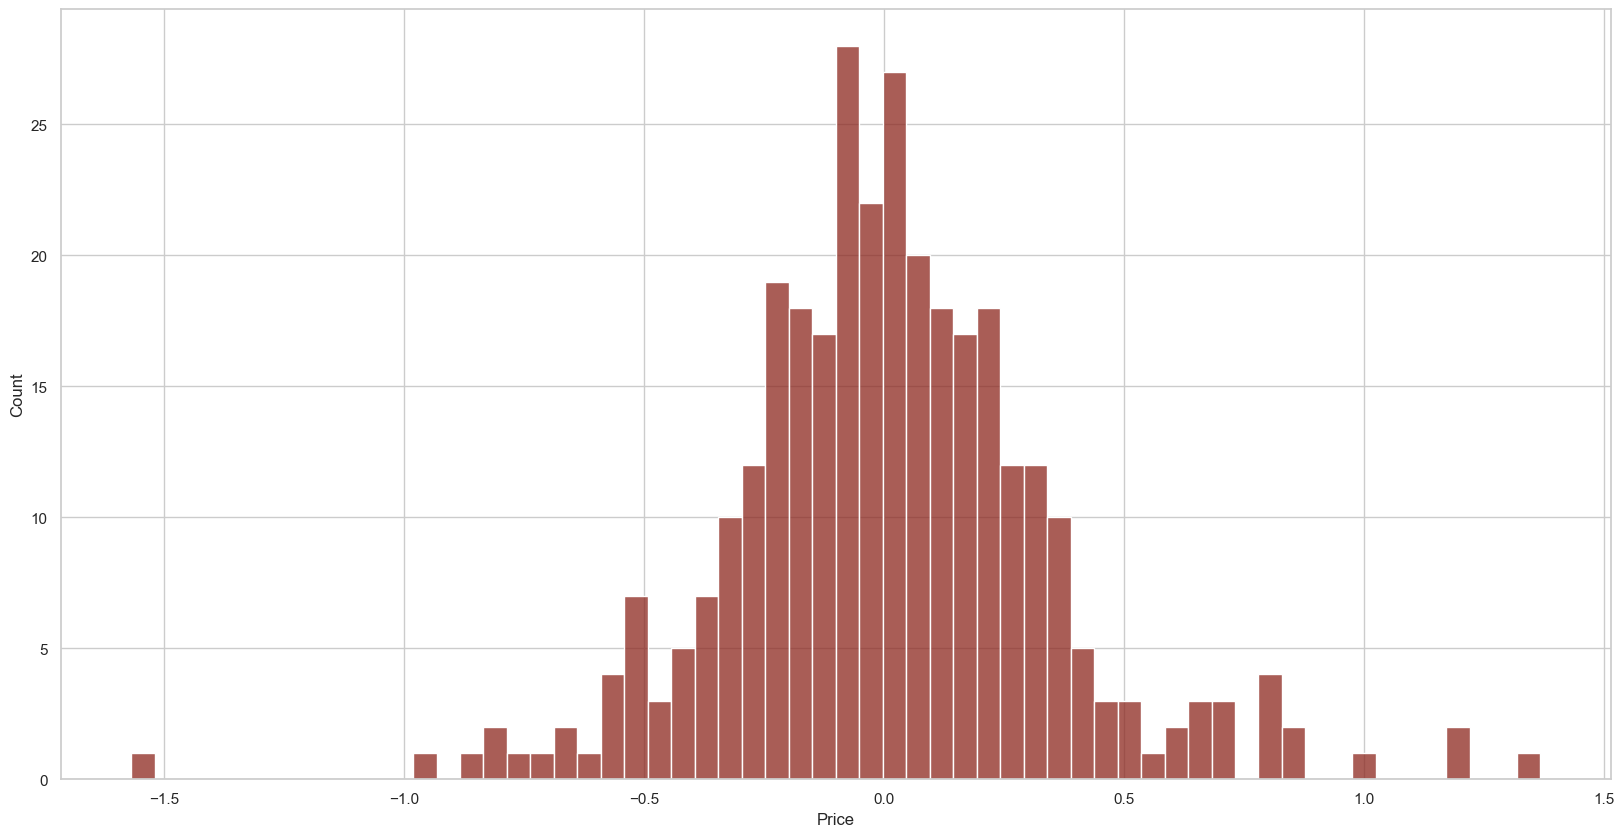

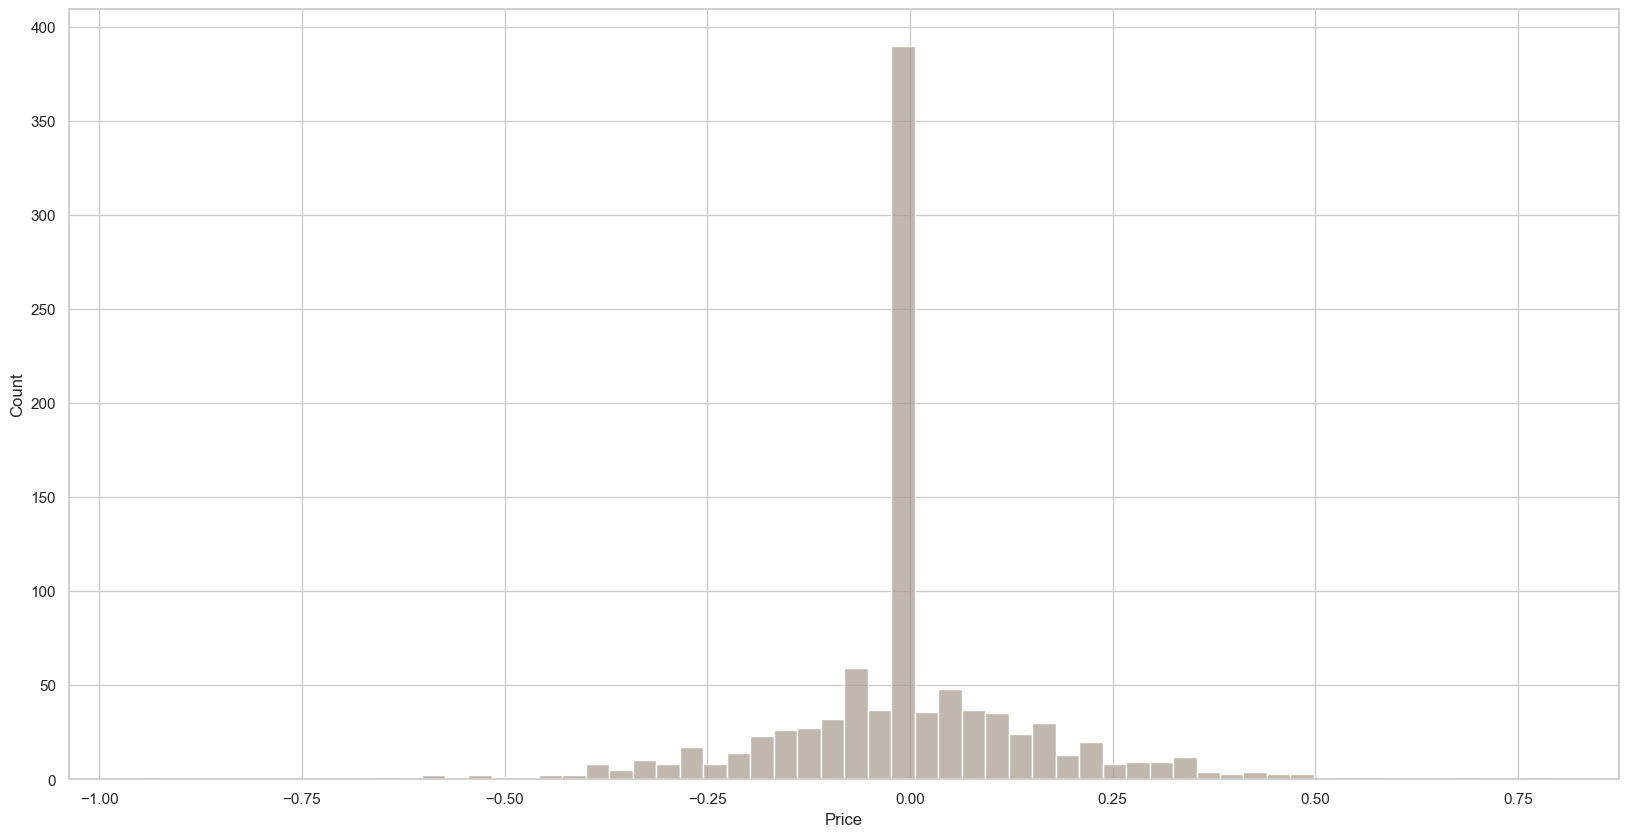

In [47]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_DT - Test_Y ) , bins = 60 , color = '#8C271E' )

Y_Train_DT = Pipeline_DT.predict ( Train_X )

plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_Train_DT - Train_Y ) , bins = 60 , color = '#ABA194' );

In [48]:
Error_Train = Train_Y - Y_Train_DT

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.1

The kurotis value of Train is :  7.05


In [49]:
Error_Test = Test_Y - Y_DT 

print ( "The skewness value of Test is : ", np.round ( Error_Test.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Test is : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

The skewness value of Test is :  -0.18

The kurotis value of Test is :  5.61


##### HOMOSCEDASTICITY

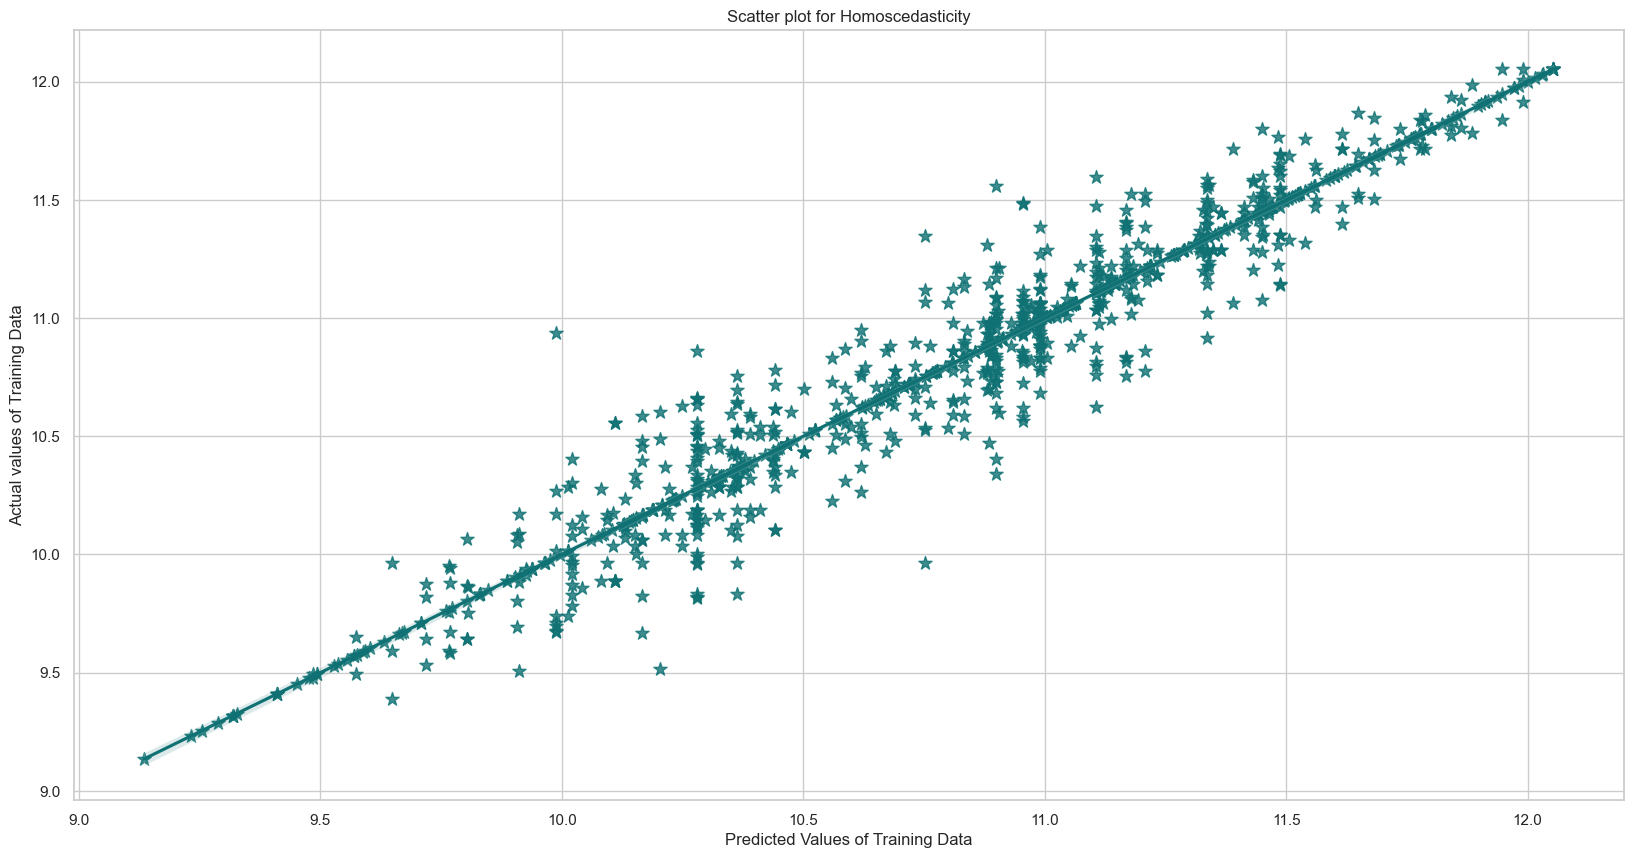

In [50]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_Train_DT , y = Train_Y , color = '#0F7173' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Training Data" );

plt.ylabel ( "Actual values of Training Data" );

plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

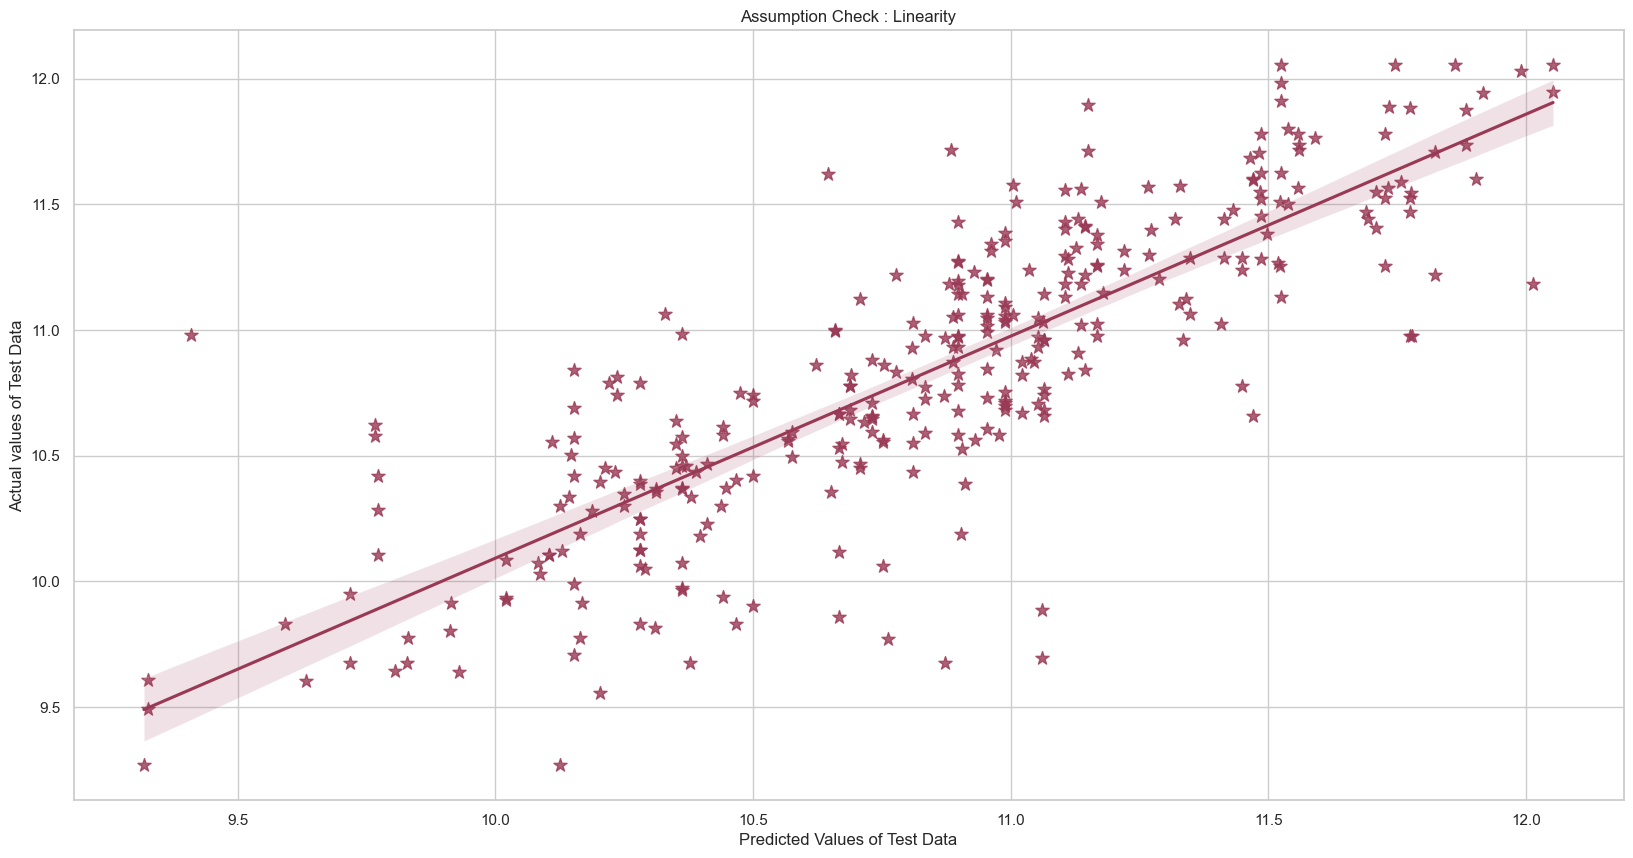

In [51]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_DT , y = Test_Y , color = '#993955' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Test Data" );

plt.ylabel ( "Actual values of Test Data" );

plt.title ( "Assumption Check : Linearity" );

### RANDOM FOREST REGRESSION 

In [52]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)

Step1 = ColumnTransformer ( transformers = [ ('col_tnf' , OneHotEncoder ( sparse = False , drop = 'first' ) , Columns ) ] , remainder = 'passthrough') 

RF = RandomForestRegressor ( )

Parameters = { 'n_estimators' : [ 100 , 200 , 1000 ] ,
              
              'max_depth' : [ 10 , 15 , 20 ] , 'criterion' : [ "squared_error", "absolute_error", "friedman_mse", "poisson" ] }

Step2 = GridSearchCV ( estimator = RF , param_grid = Parameters , cv = 5 )

Pipeline_RF = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )

Pipeline_RF.fit ( Train_X , Train_Y )

Parameters = Step2.best_params_

Step3 = RandomForestRegressor ( **Parameters )

Pipeline_RF = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )

Pipeline_RF.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 RandomForestRegressor(criterion='absolute_error', max_depth=15,
                                       n_estimators=200))])

In [53]:
Y_RF = Pipeline_RF.predict ( Test_X )

R2_RF = r2_score ( Test_Y , Y_RF ) * 100

N = Train_X.shape[0] 

P = Train_X.shape[1]

print ( "The R2 value or Coefficient of determination is : " , R2_RF )

Adjusted_R2_RF = 1 - ( ( 1 - R2_RF ) * ( N - 1 ) / ( N - 1 - P ) )

MSE_RF = mean_squared_error ( Test_Y , Y_RF )

RMSE_RF = np.sqrt ( MSE_RF )

MAPE_RF = mean_absolute_percentage_error ( Test_Y , Y_RF ) * 100

MAE_RF = mean_absolute_error ( Test_Y , Y_RF )

print ( "\nThe Adjusted R2 value is : " , Adjusted_R2_RF )

The R2 value or Coefficient of determination is :  82.00176119070531

The Adjusted R2 value is :  82.7556555554585


In [54]:
RF_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] , 
        
           'Values' : [ R2_RF , Adjusted_R2_RF , MSE_RF , RMSE_RF , MAPE_RF , MAE_RF ] }

RF_Performance_Metrics = pd.DataFrame ( RF_PM )

RF_Performance_Metrics

Performance Metric     Values
0                 R2  82.001761
1        Adjusted_R2  82.755656
2                MSE   0.063723
3               RMSE   0.252435
4               MAPE   1.791556
5                MAE   0.193266

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

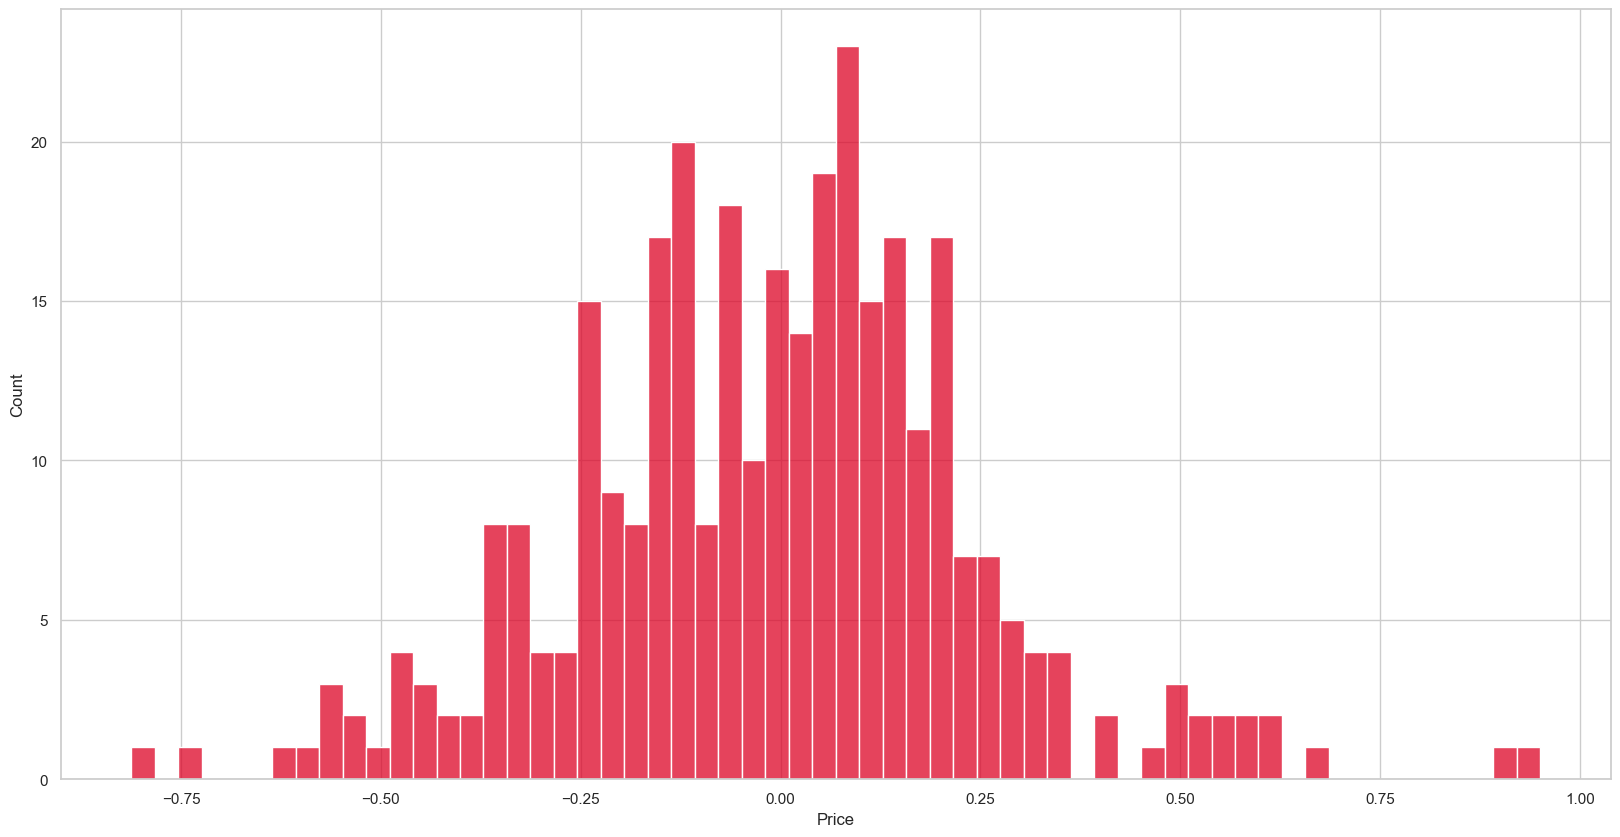

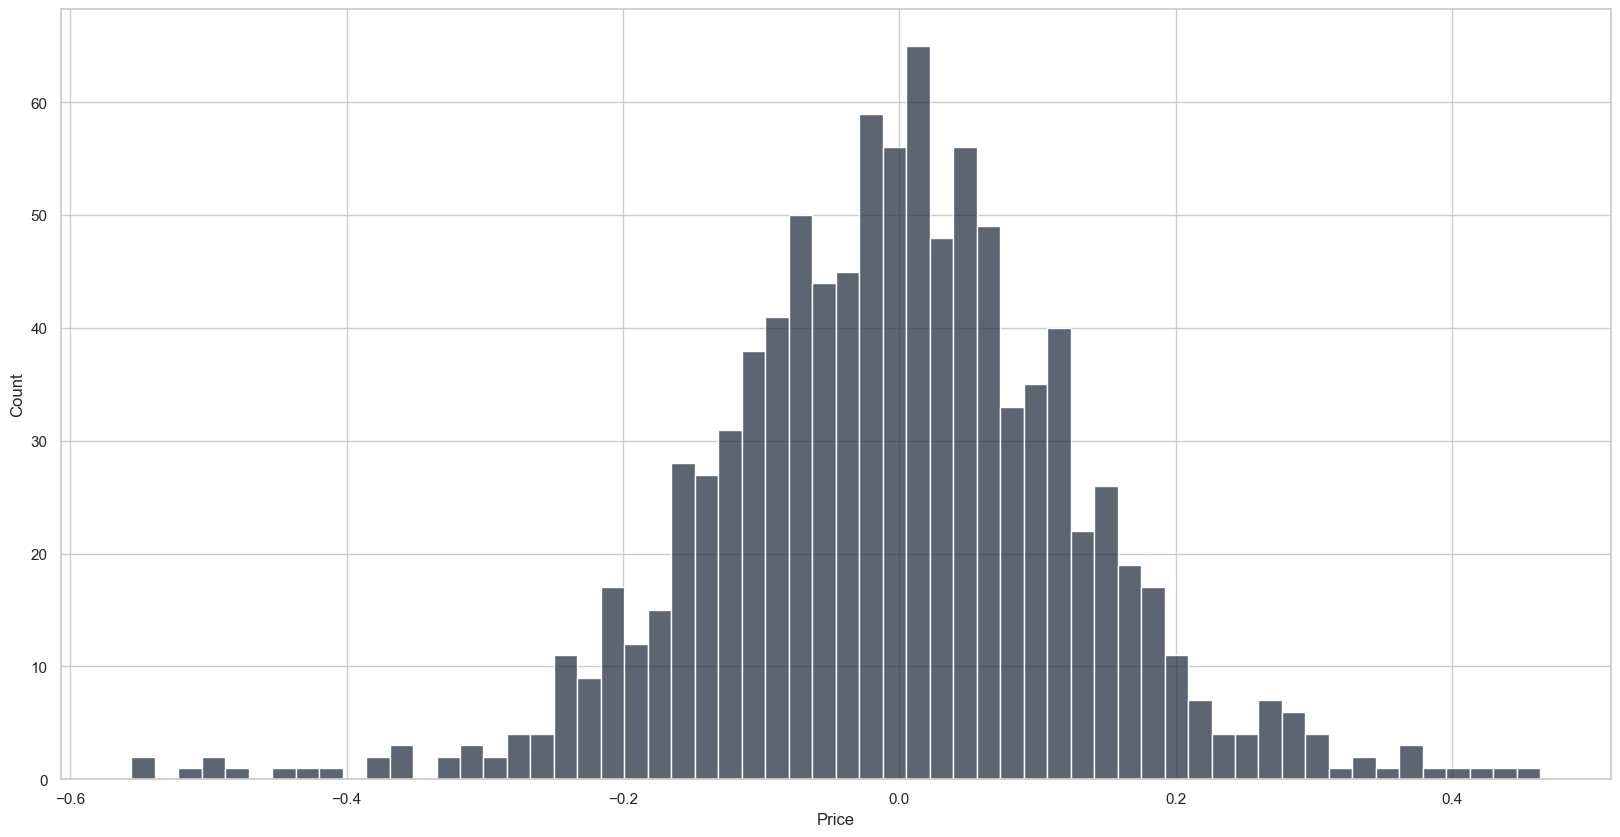

In [55]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_RF - Test_Y ) , bins = 60 , color = '#DD0426' )

Y_Train_RF = Pipeline_RF.predict ( Train_X )

plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_Train_RF - Train_Y ) , bins = 60 , color = '#273043' );

In [56]:
Error_Train = Train_Y - Y_Train_RF 

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.21

The kurotis value of Train is :  4.47


In [57]:
Error_Test = Test_Y - Y_RF 

print ( "The skewness value of Test is : ", np.round ( Error_Test.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Test is : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

The skewness value of Test is :  -0.17

The kurotis value of Test is :  4.15


##### HOMOSCEDASTICITY

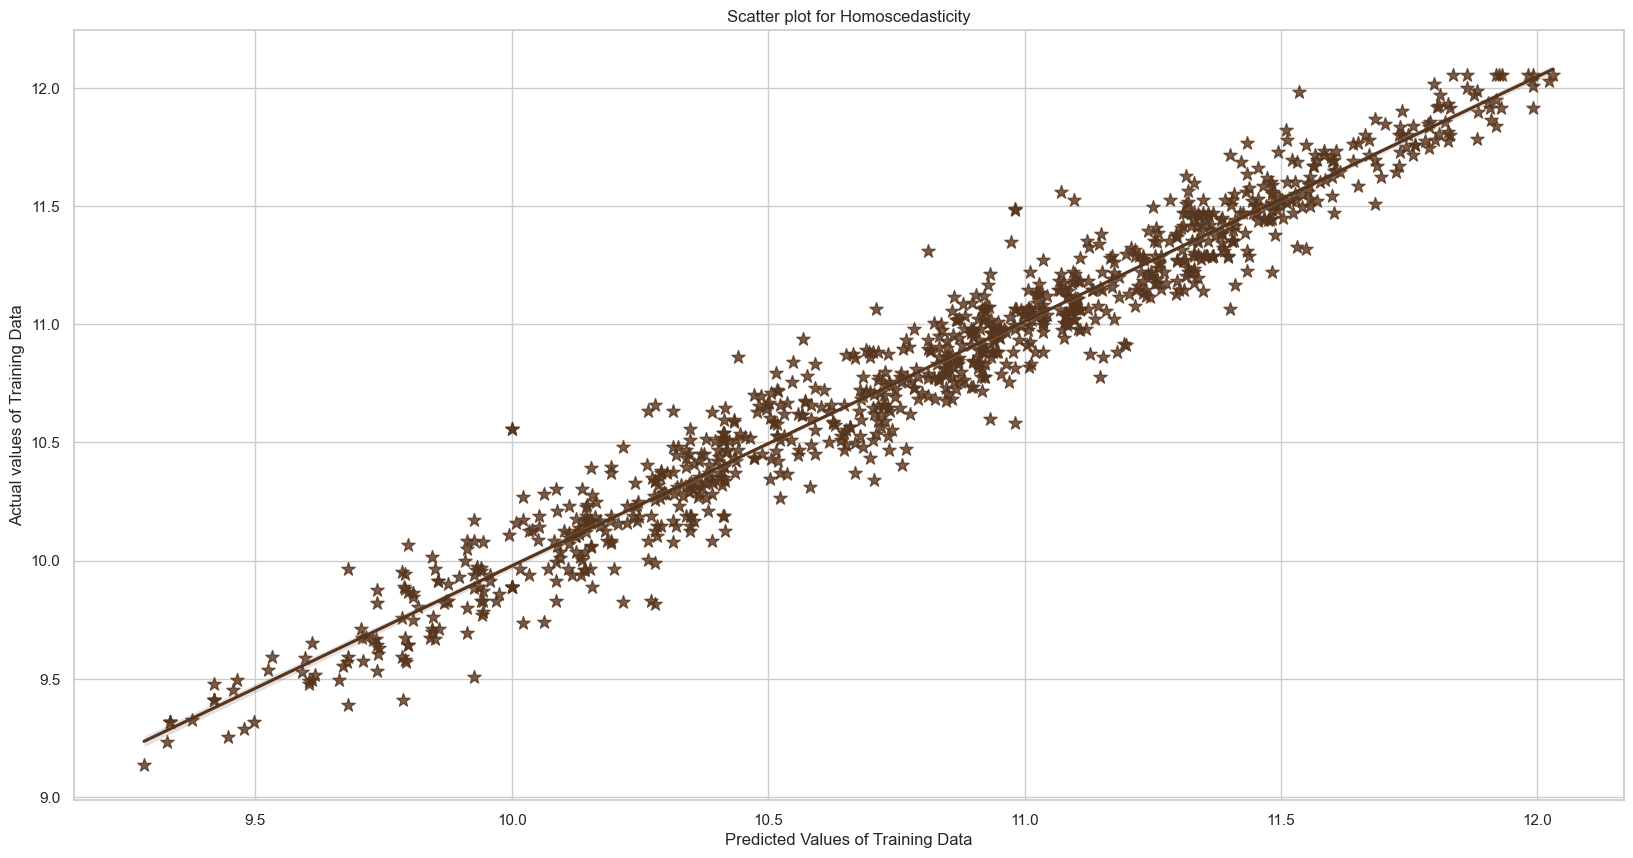

In [58]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_Train_RF , y = Train_Y , color = '#56351E' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Training Data" );

plt.ylabel ( "Actual values of Training Data" );

plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

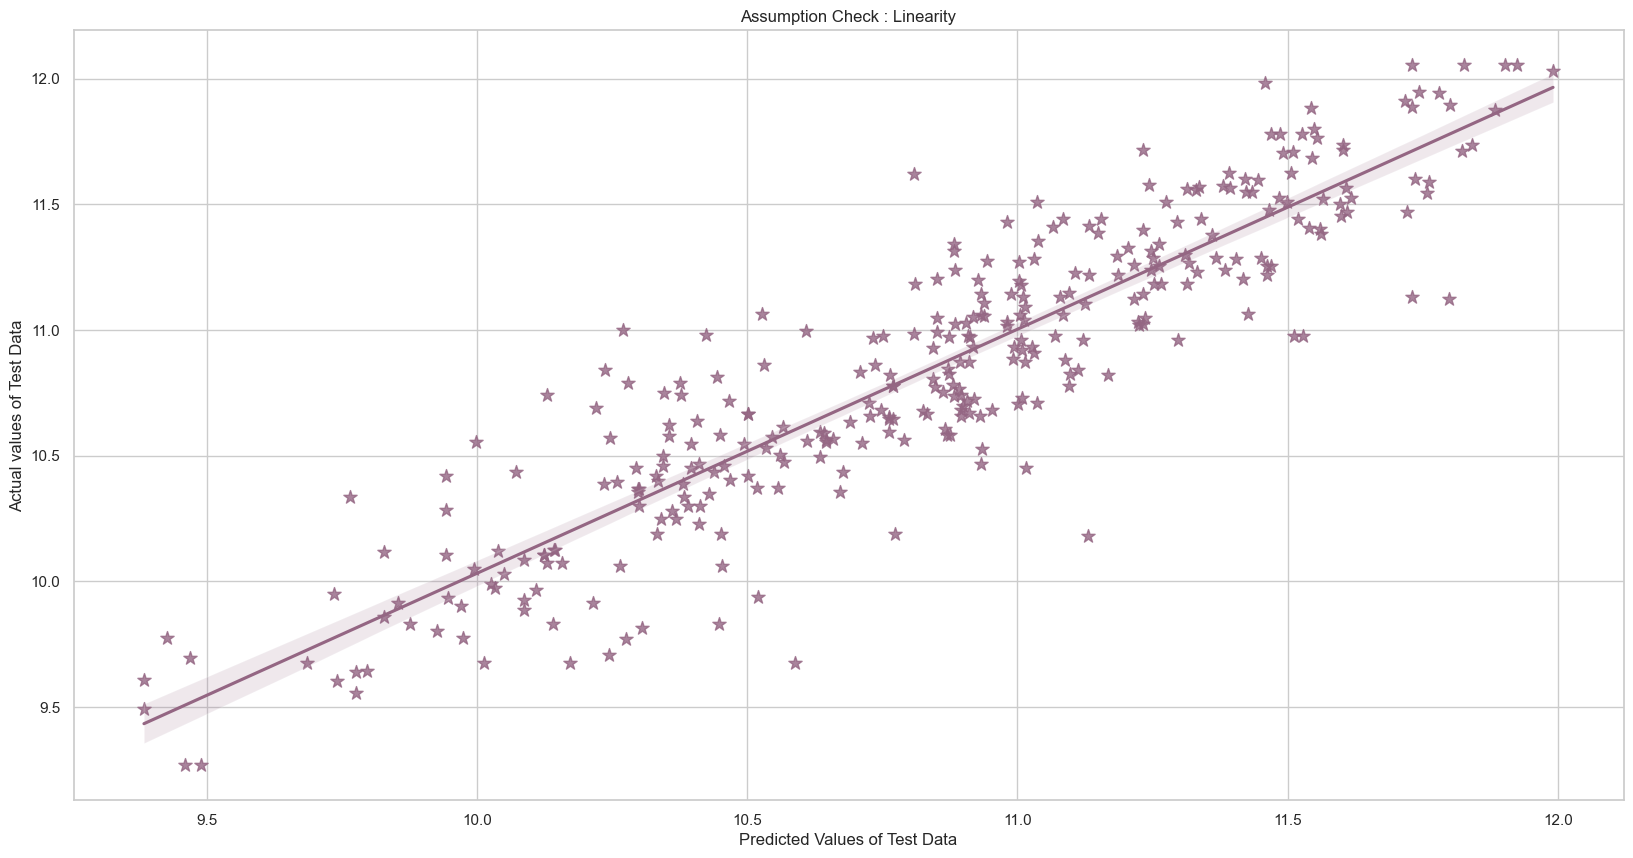

In [59]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_RF , y = Test_Y , color = '#946683' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Test Data" );

plt.ylabel ( "Actual values of Test Data" );

plt.title ( "Assumption Check : Linearity" );

### ADABOOST REGRESSOR

In [60]:
Columns = list(Train_X.select_dtypes ( 'object' ).columns)

Step1 = ColumnTransformer ( transformers = [ ('col_tnf' , OneHotEncoder ( sparse = False , drop = 'first' ) , Columns ) ] , remainder = 'passthrough') 

AB = AdaBoostRegressor ( )

Parameters = { 'n_estimators' : [ 50 , 100 , 200 ] ,
              
              'learning_rate' : [ 0.1 , 0.01, 1 ] , 'estimator' : [ RF ] }

Step2 = GridSearchCV ( estimator = AB , param_grid = Parameters , cv = 5 )

Pipeline_AB = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )

Pipeline_AB.fit ( Train_X , Train_Y )

Parameters = Step2.best_params_

Step3 = AdaBoostRegressor ( **Parameters )

Pipeline_AB = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )

Pipeline_AB.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 AdaBoostRegressor(estimator=RandomForestRegressor(),
                                   learning_rate=0.1, n_estimators=200))])

In [61]:
Y_AB = Pipeline_AB.predict ( Test_X )

R2_AB = r2_score ( Test_Y , Y_AB ) * 100

N = Train_X.shape[0] 

P = Train_X.shape[1]

print ( "The R2 value or Coefficient of determination is : " , R2_AB )

Adjusted_R2_AB = 1 - ( ( 1 - R2_AB ) * ( N - 1 ) / ( N - 1 - P ) )

MSE_AB = mean_squared_error ( Test_Y , Y_AB )

RMSE_AB = np.sqrt ( MSE_AB )

MAPE_AB = mean_absolute_percentage_error ( Test_Y , Y_AB ) * 100

MAE_AB = mean_absolute_error ( Test_Y , Y_AB )

print ( "\nThe Adjusted R2 value is : " , Adjusted_R2_AB )

The R2 value or Coefficient of determination is :  81.64492832344344

The Adjusted R2 value is :  82.3955015963607


In [62]:
AB_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] , 
        
           'Values' : [ R2_AB , Adjusted_R2_AB , MSE_AB , RMSE_AB , MAPE_AB , MAE_AB ] }

AB_Performance_Metrics = pd.DataFrame ( AB_PM )

AB_Performance_Metrics

Performance Metric     Values
0                 R2  81.644928
1        Adjusted_R2  82.395502
2                MSE   0.064987
3               RMSE   0.254925
4               MAPE   1.835007
5                MAE   0.197719

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

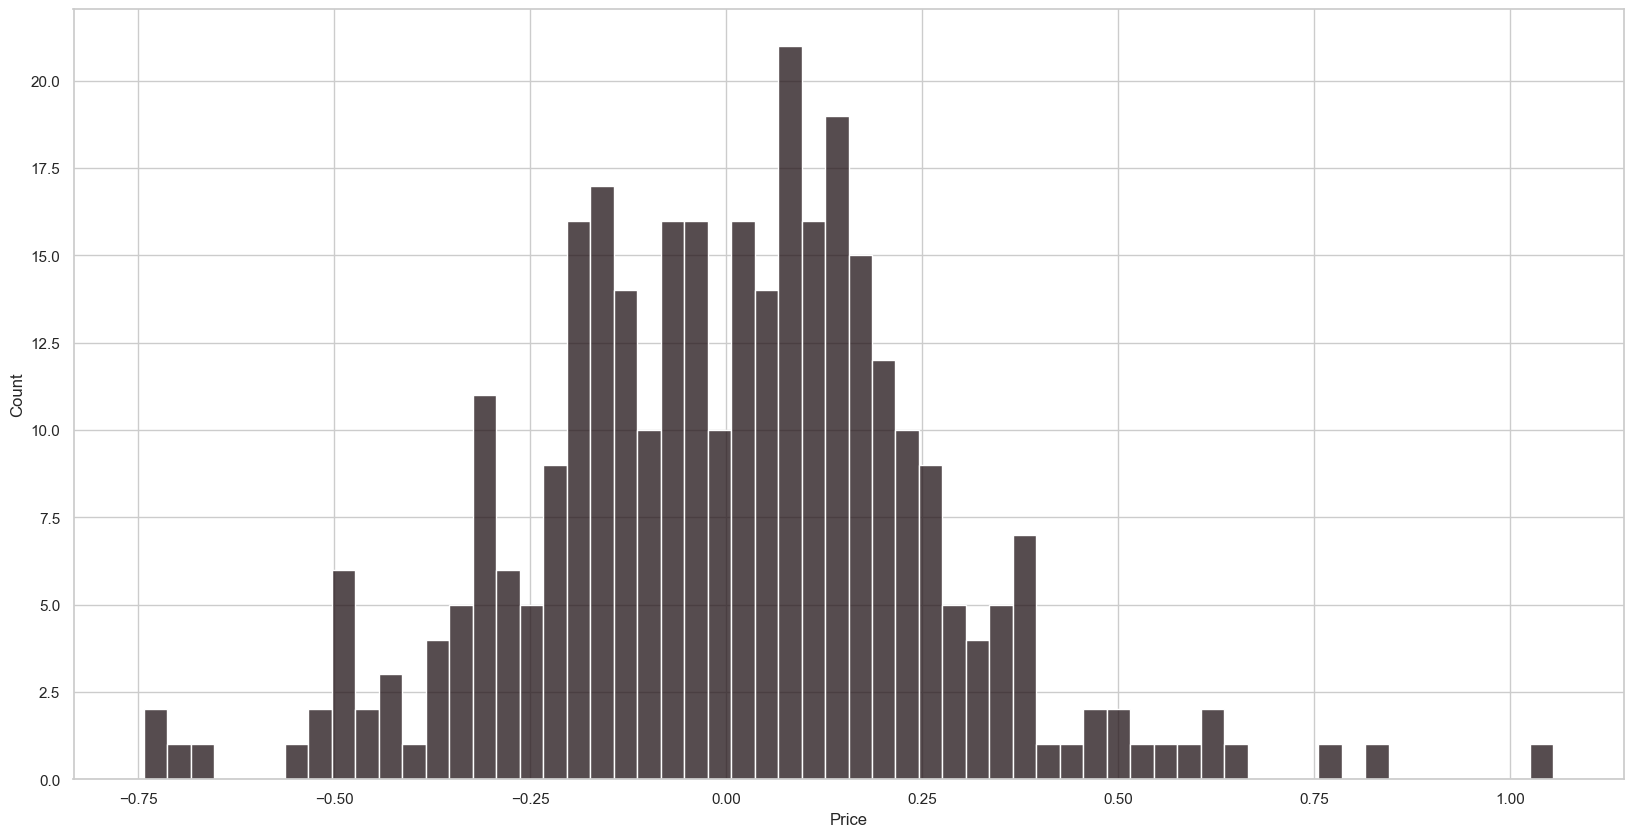

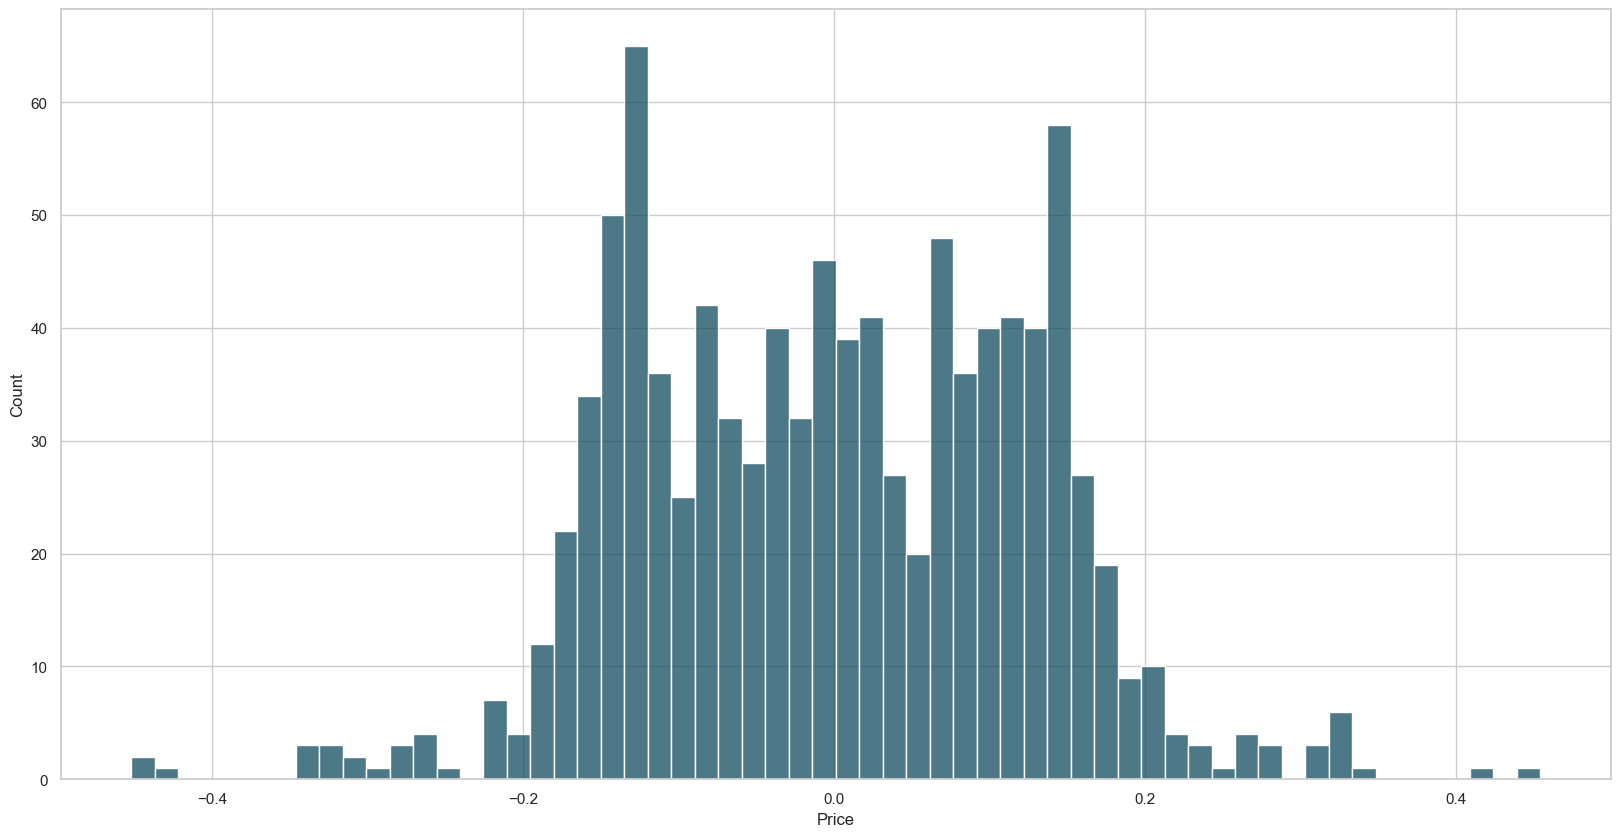

In [63]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_AB - Test_Y ) , bins = 60 , color = '#1E1014' )

Y_Train_AB = Pipeline_AB.predict ( Train_X )

plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_Train_AB - Train_Y ) , bins = 60 , color = '#114B5F' );

In [64]:
Error_Train = Train_Y - Y_Train_AB

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.01

The kurotis value of Train is :  2.96


In [65]:
Error_Test = Test_Y - Y_AB

print ( "The skewness value of Test is : ", np.round ( Error_Test.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Test is : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

The skewness value of Test is :  -0.2

The kurotis value of Test is :  4.13


##### HOMOSCEDASTICITY

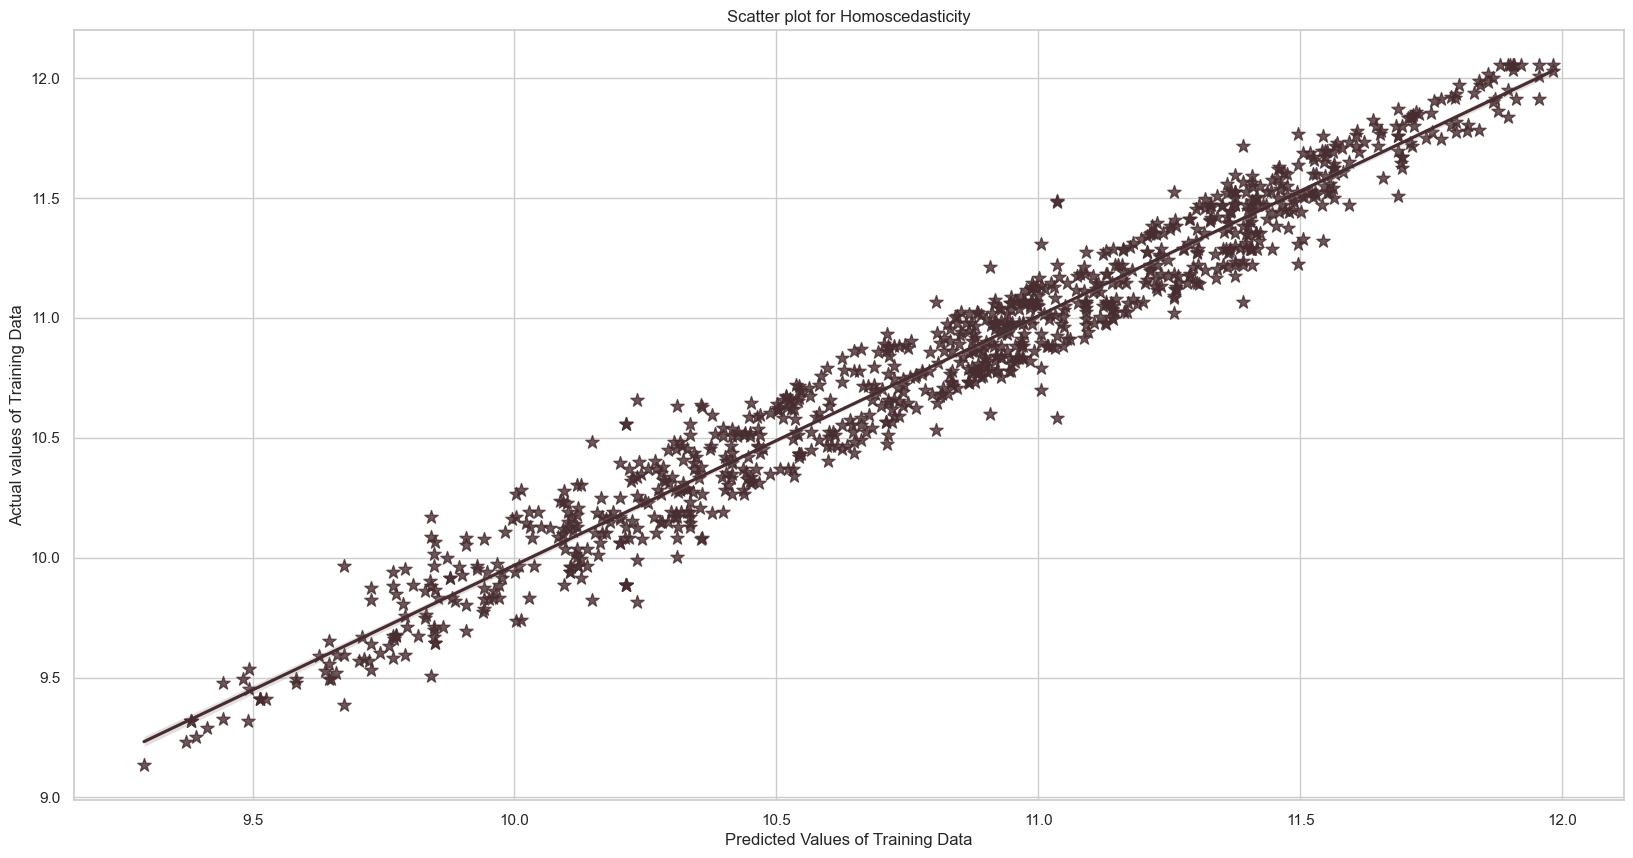

In [66]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_Train_AB , y = Train_Y , color = '#472D30' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Training Data" );

plt.ylabel ( "Actual values of Training Data" );

plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

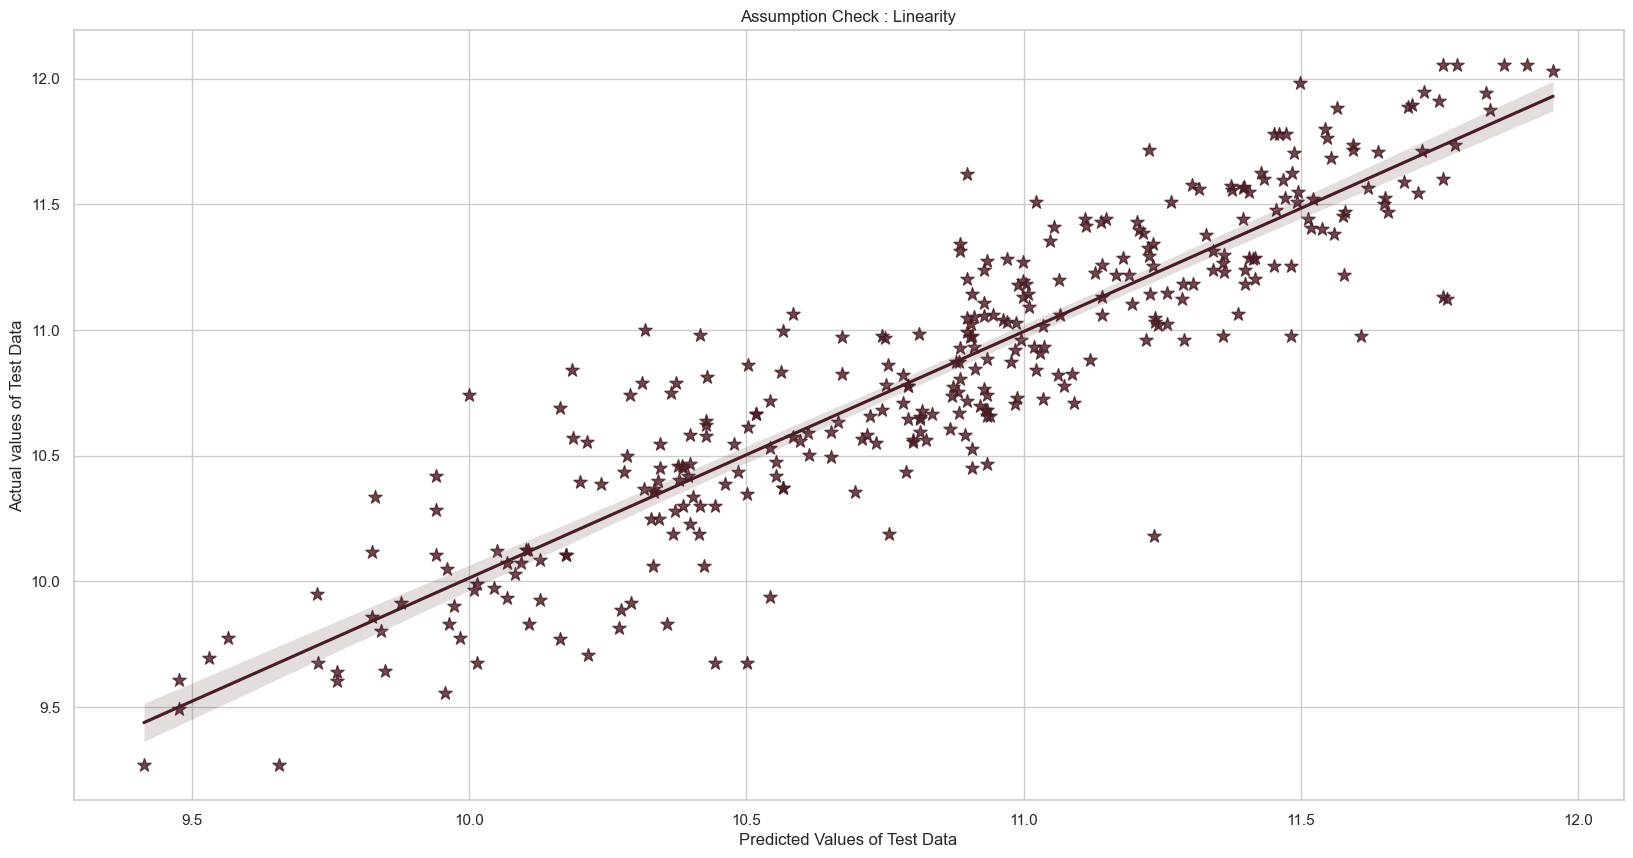

In [67]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_AB , y = Test_Y , color = '#481D24' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Test Data" );

plt.ylabel ( "Actual values of Test Data" );

plt.title ( "Assumption Check : Linearity" );

### GRADIENT BOOSTING

In [68]:
GB = GradientBoostingRegressor ( )

Parameters = { 'n_estimators' : [ 50 , 100 , 200 ] , 'learning_rate' : [ 0.1 , 0.01, 1 ] , 
              
              'loss' : [ 'squared_error', 'absolute_error', 'huber', 'quantile' ] }

Step2 = GridSearchCV ( estimator = GB , param_grid = Parameters , cv = 5 )

Pipeline_GB = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )

Pipeline_GB.fit ( Train_X , Train_Y )

Parameters = Step2.best_params_

Step3 = GradientBoostingRegressor ( **Parameters )

Pipeline_GB = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )

Pipeline_GB.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3', GradientBoostingRegressor(n_estimators=200))])

In [69]:
Y_GB = Pipeline_GB.predict ( Test_X )

R2_GB = r2_score ( Test_Y , Y_GB ) * 100

print ( "The R2 value or Coefficient of determination is : " , R2_GB )

Adjusted_R2_GB = 1 - ( ( 1 - R2_GB ) * ( N - 1 ) / ( N - 1 - P ) )

MSE_GB = mean_squared_error ( Test_Y , Y_GB )

RMSE_GB = np.sqrt ( MSE_GB )

MAPE_GB = mean_absolute_percentage_error ( Test_Y , Y_GB ) * 100

MAE_GB = mean_absolute_error ( Test_Y , Y_GB )

print ( "\nThe Adjusted R2 value is : " , Adjusted_R2_GB )

The R2 value or Coefficient of determination is :  81.8166204851285

The Adjusted R2 value is :  82.56879172025378


In [70]:
GB_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] , 
        
           'Values' : [ R2_GB , Adjusted_R2_GB , MSE_GB , RMSE_GB , MAPE_GB , MAE_GB ] }

GB_Performance_Metrics = pd.DataFrame ( GB_PM )

GB_Performance_Metrics

Performance Metric     Values
0                 R2  81.816620
1        Adjusted_R2  82.568792
2                MSE   0.064379
3               RMSE   0.253730
4               MAPE   1.801126
5                MAE   0.194534

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

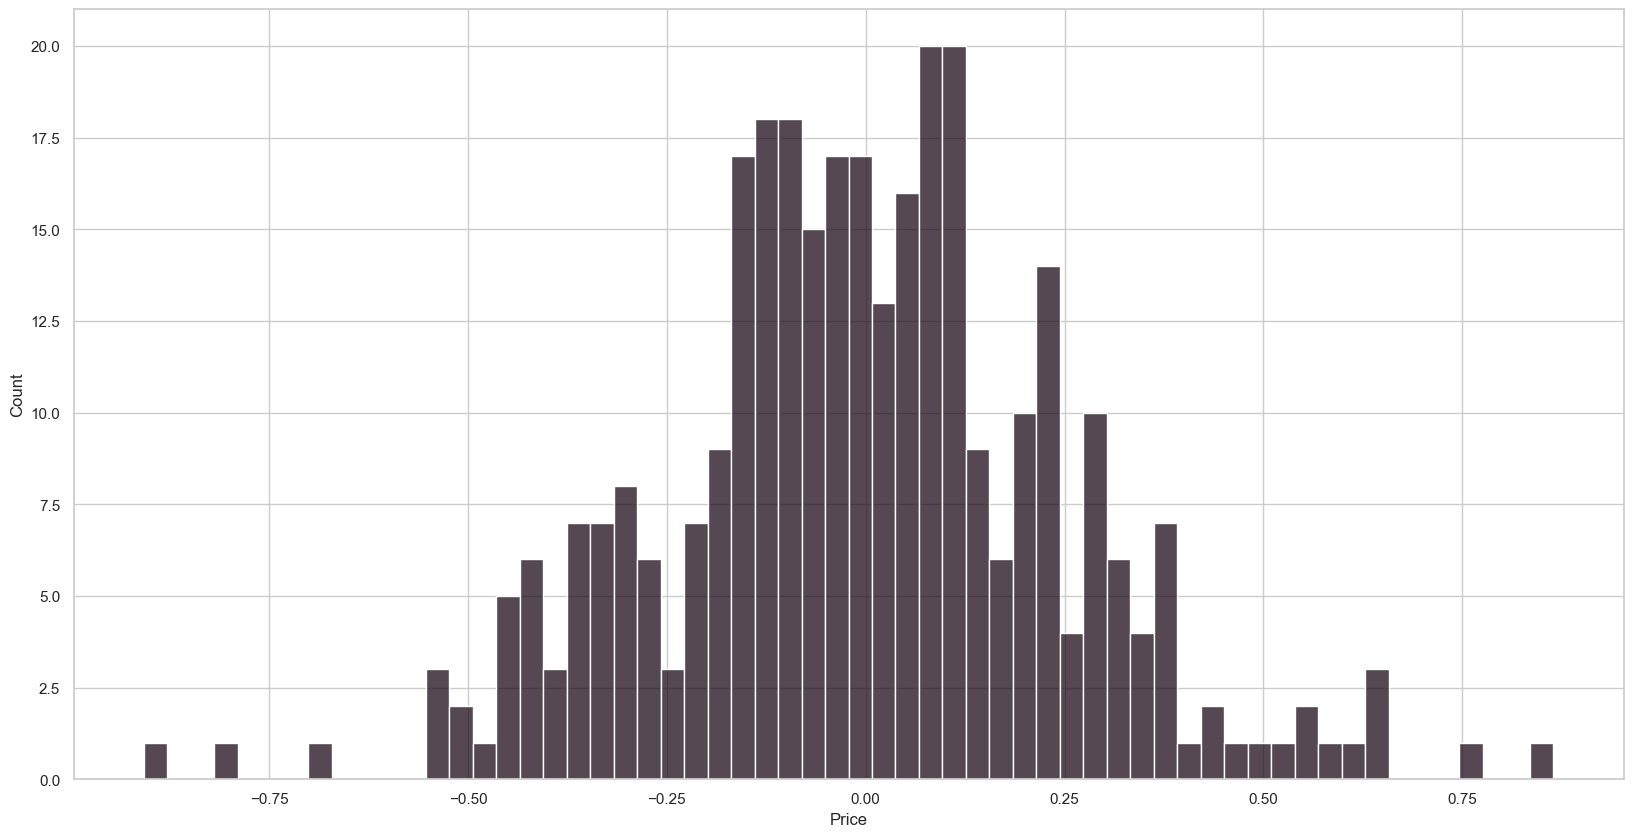

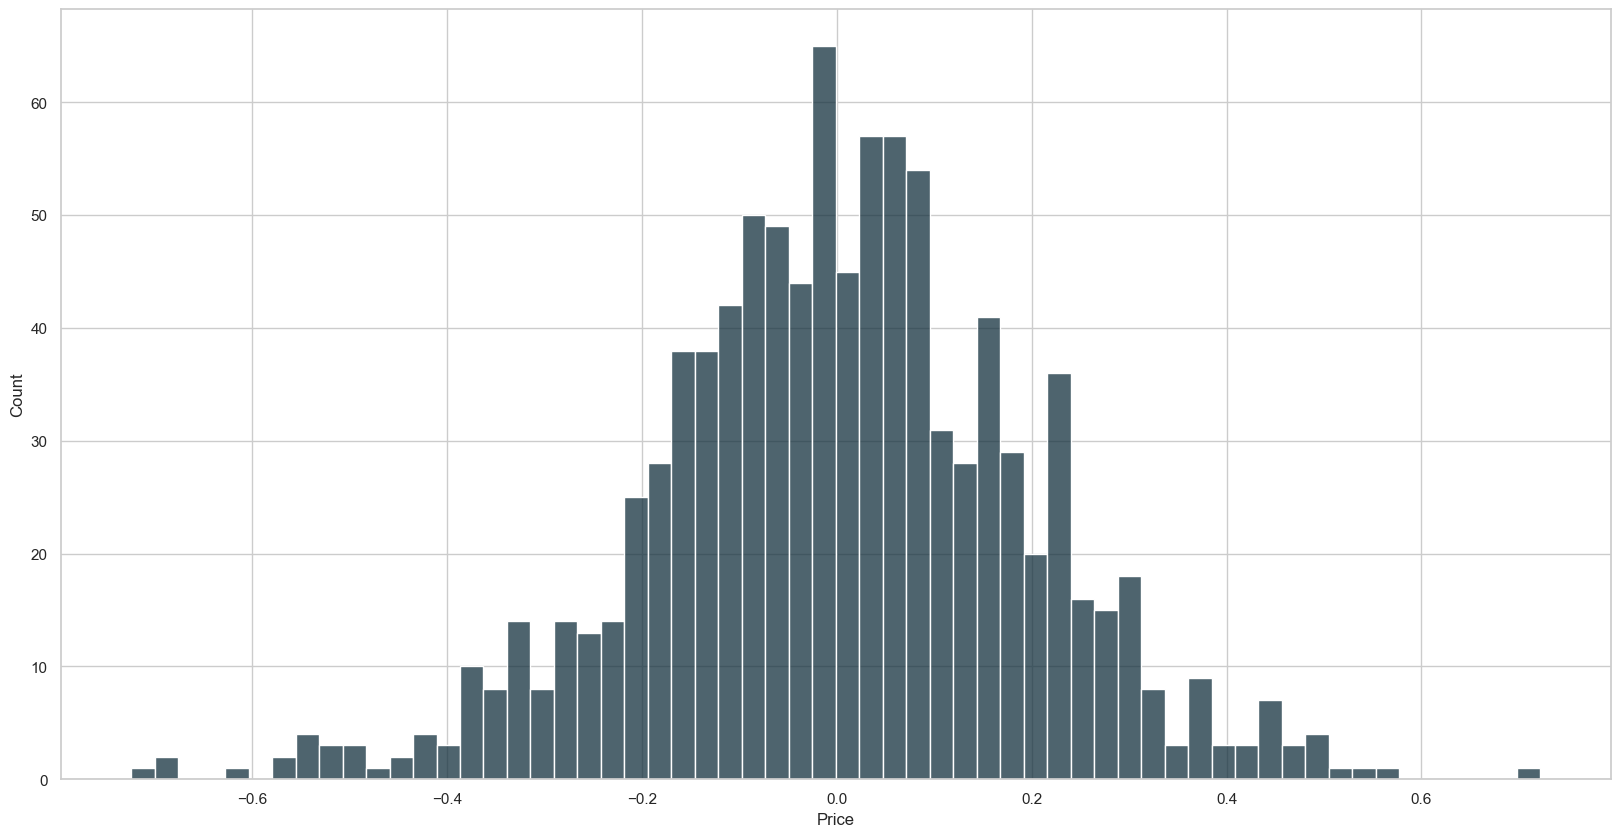

In [71]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_GB - Test_Y ) , bins = 60 , color = '#1C0B19' )

Y_Train_GB = Pipeline_GB.predict ( Train_X )

plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_Train_GB - Train_Y ) , bins = 60 , color = '#13303D' );

In [72]:
Error_Train = Train_Y - Y_Train_GB

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.16

The kurotis value of Train is :  3.72


In [73]:
Error_Test = Test_Y - Y_GB

print ( "The skewness value of Test is : ", np.round ( Error_Test.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Test is : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

The skewness value of Test is :  -0.04

The kurotis value of Test is :  3.86


##### HOMOSCEDASTICITY

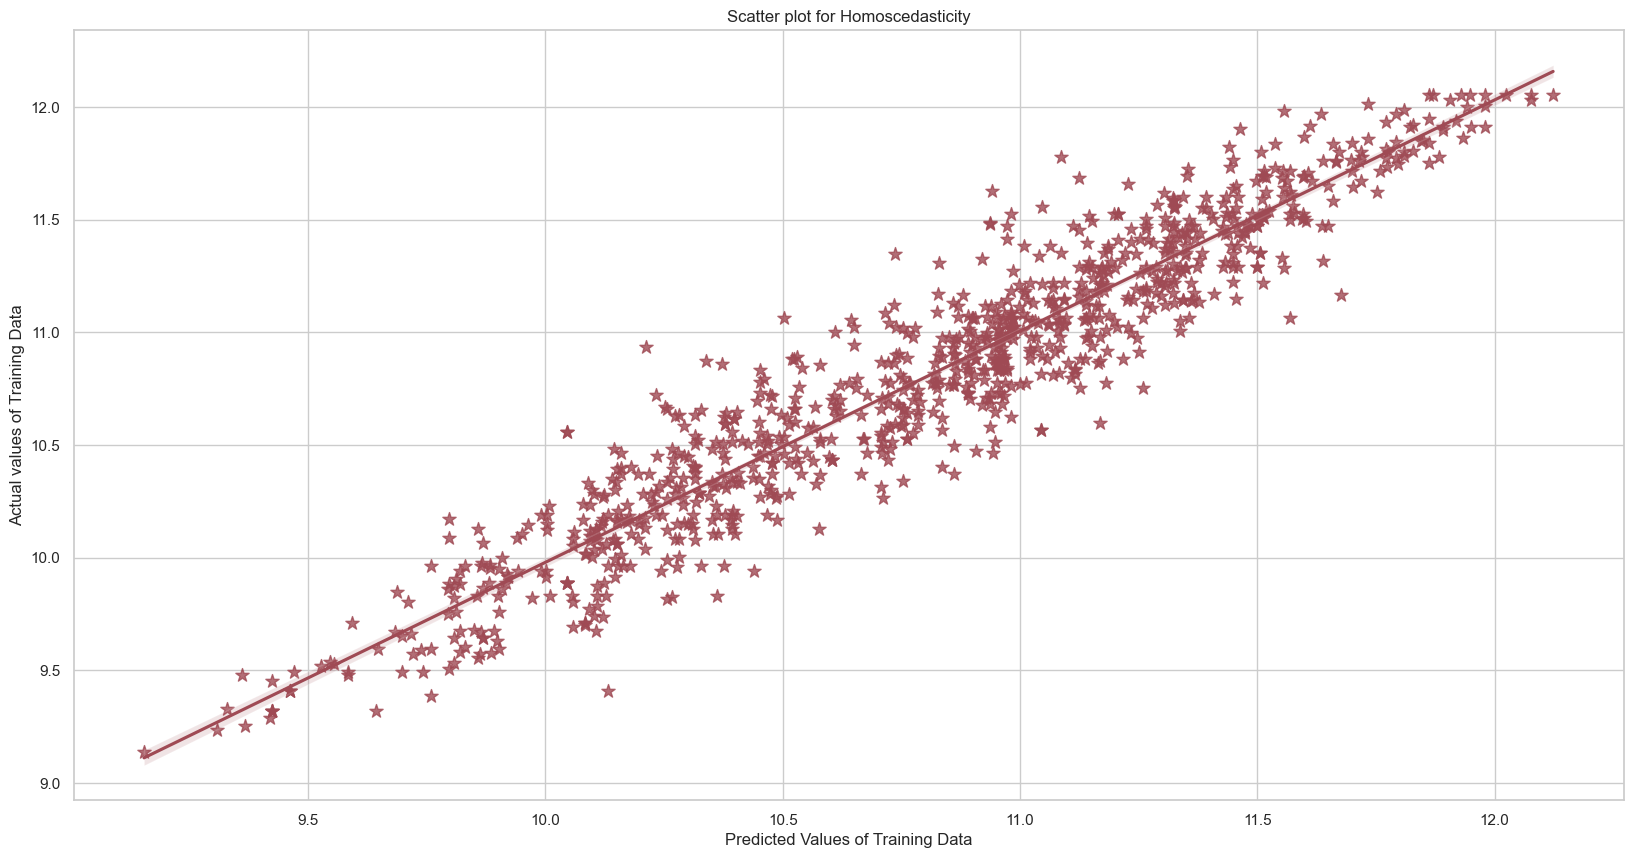

In [74]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_Train_GB , y = Train_Y , color = '#9F4A54' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Training Data" );

plt.ylabel ( "Actual values of Training Data" );

plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

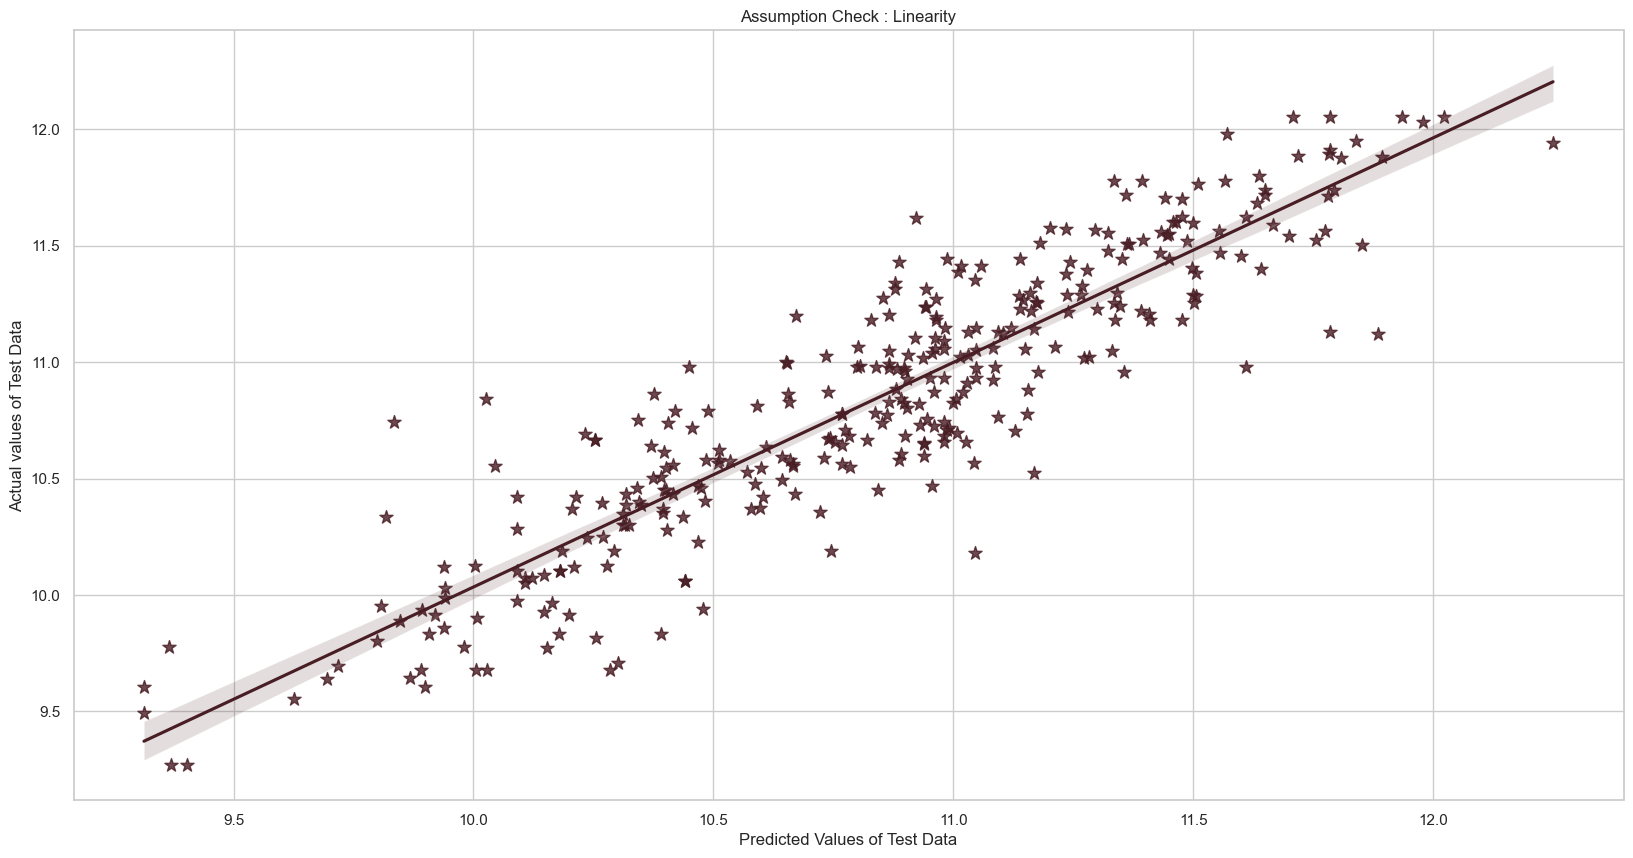

In [75]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_GB , y = Test_Y , color = '#481D24' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Test Data" );

plt.ylabel ( "Actual values of Test Data" );

plt.title ( "Assumption Check : Linearity" );

### EXTREME GRADIENT BOOSTING

In [76]:
XGB = XGBRFRegressor ( )

Parameters = { 'learning_rate' : [ 0.1 , 0.01, 1 ] , 'max_depth' : [ 10 , 15 , 20 ] }

Step2 = GridSearchCV ( estimator = XGB , param_grid = Parameters , cv = 5 )

Pipeline_XGB = Pipeline ( [ ( 'step1' , Step1) , ( 'step2' , Step2 ) ] )

Pipeline_XGB.fit ( Train_X , Train_Y )

Parameters = Step2.best_params_

Step3 = XGBRFRegressor ( **Parameters )

Pipeline_XGB = Pipeline ( [ ( 'step1' , Step1) , ( 'step3' , Step3 ) ] )

Pipeline_XGB.fit ( Train_X , Train_Y )

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'CPU_Types',
                                                   'Memory_Types'])])),
                ('step3',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categori...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=1,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=10, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, n_estimators=100,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', predictor=None,
                                random_state=None, ...))])

In [77]:
Y_XGB = Pipeline_XGB.predict ( Test_X )

R2_XGB = r2_score ( Test_Y , Y_XGB ) * 100

print ( "The R2 value or Coefficient of determination is : " , R2_XGB )

Adjusted_R2_XGB = 1 - ( ( 1 - R2_XGB ) * ( N - 1 ) / ( N - 1 - P ) )

MSE_XGB = mean_squared_error ( Test_Y , Y_XGB )

RMSE_XGB = np.sqrt ( MSE_XGB )

MAPE_XGB = mean_absolute_percentage_error ( Test_Y , Y_XGB ) * 100

MAE_XGB = mean_absolute_error ( Test_Y , Y_XGB )

print ( "\nThe Adjusted R2 value is : " , Adjusted_R2_XGB )

The R2 value or Coefficient of determination is :  77.50460902722293

The Adjusted R2 value is :  78.21664778755903


In [78]:
XGB_PM = { 'Performance Metric' : [ 'R2' , 'Adjusted_R2' , 'MSE' , 'RMSE' , 'MAPE' , 'MAE' ] , 
        
           'Values' : [ R2_XGB , Adjusted_R2_XGB , MSE_XGB , RMSE_XGB , MAPE_XGB , MAE_XGB ] }

XGB_Performance_Metrics = pd.DataFrame ( XGB_PM )

XGB_Performance_Metrics

Performance Metric     Values
0                 R2  77.504609
1        Adjusted_R2  78.216648
2                MSE   0.079646
3               RMSE   0.282216
4               MAPE   2.004849
5                MAE   0.215891

#### CHECKING FOR ASSUMPTIONS

##### NORMALITY 

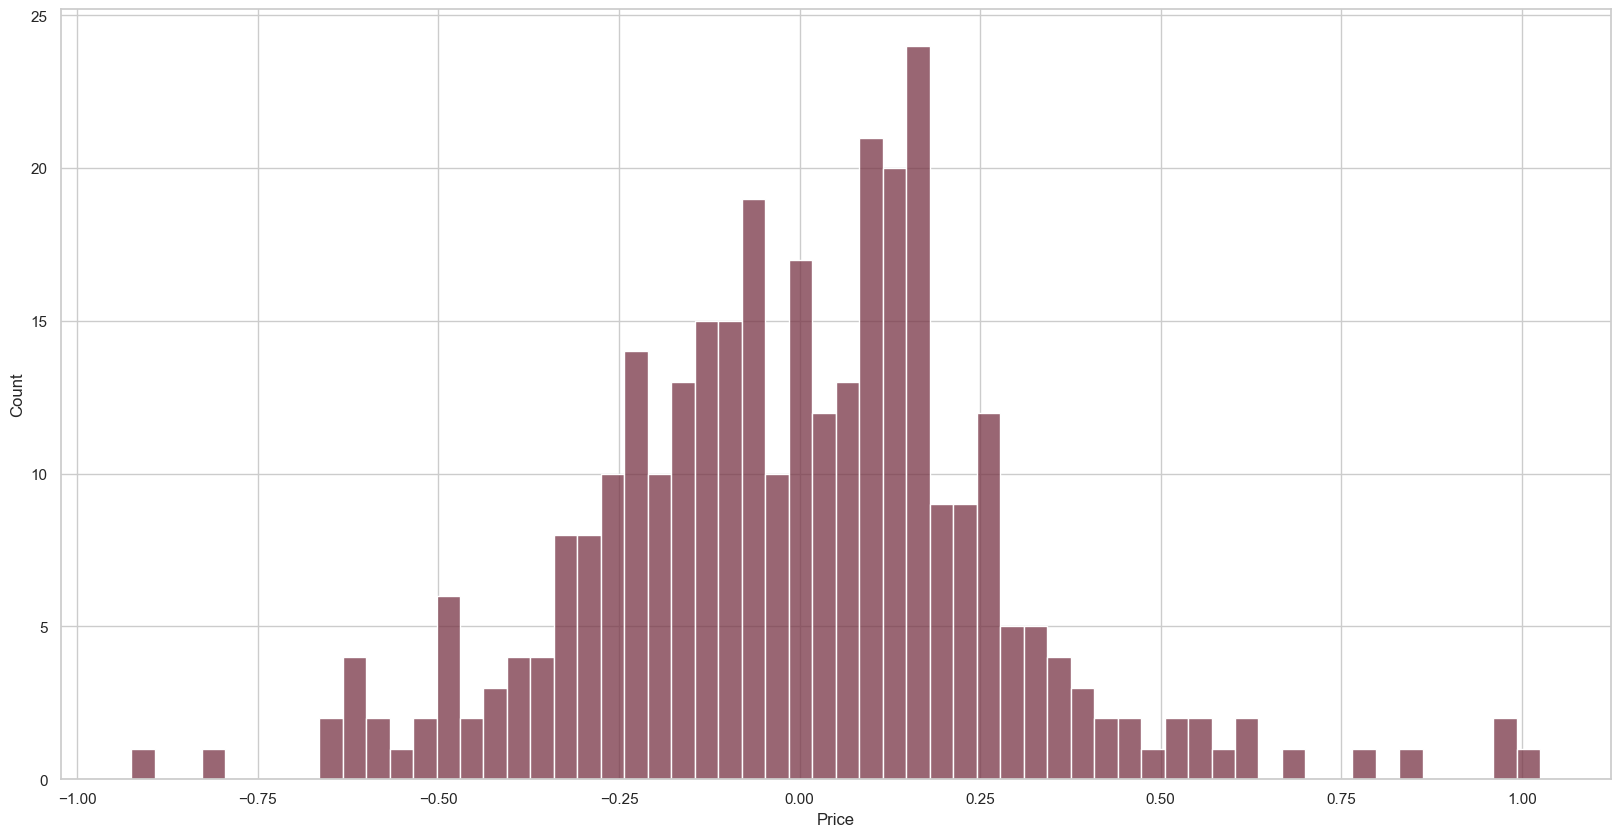

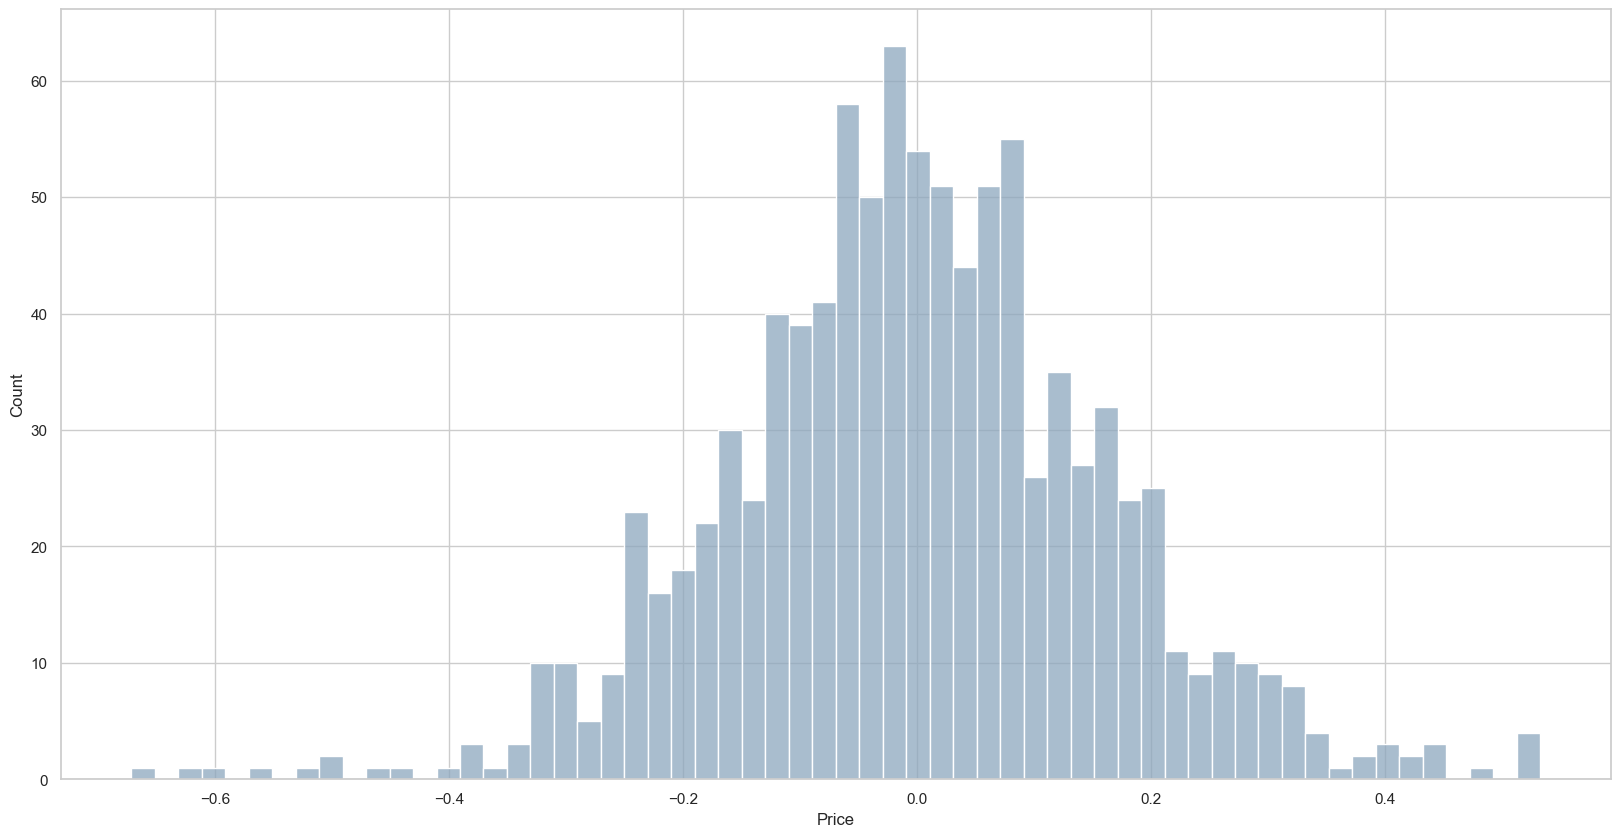

In [79]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_XGB - Test_Y ) , bins = 60 , color = '#773344' )

Y_Train_XGB = Pipeline_XGB.predict ( Train_X )

plt.figure ( figsize = ( 20 , 10 ) )

sns.histplot ( ( Y_Train_XGB - Train_Y ) , bins = 60 , color = '#8DA7BE' );

In [80]:
Error_Train = Train_Y - Y_Train_XGB

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.07

The kurotis value of Train is :  4.0


In [81]:
Error_Test = Test_Y - Y_XGB

print ( "The skewness value of Test is : ", np.round ( Error_Test.skew ( ) , 2 ) )

print ( "\nThe kurotis value of Test is : ", np.round ( Error_Test.kurt ( ) + 3 , 2 )  )

The skewness value of Test is :  -0.21

The kurotis value of Test is :  4.36


##### HOMOSCEDASTICITY

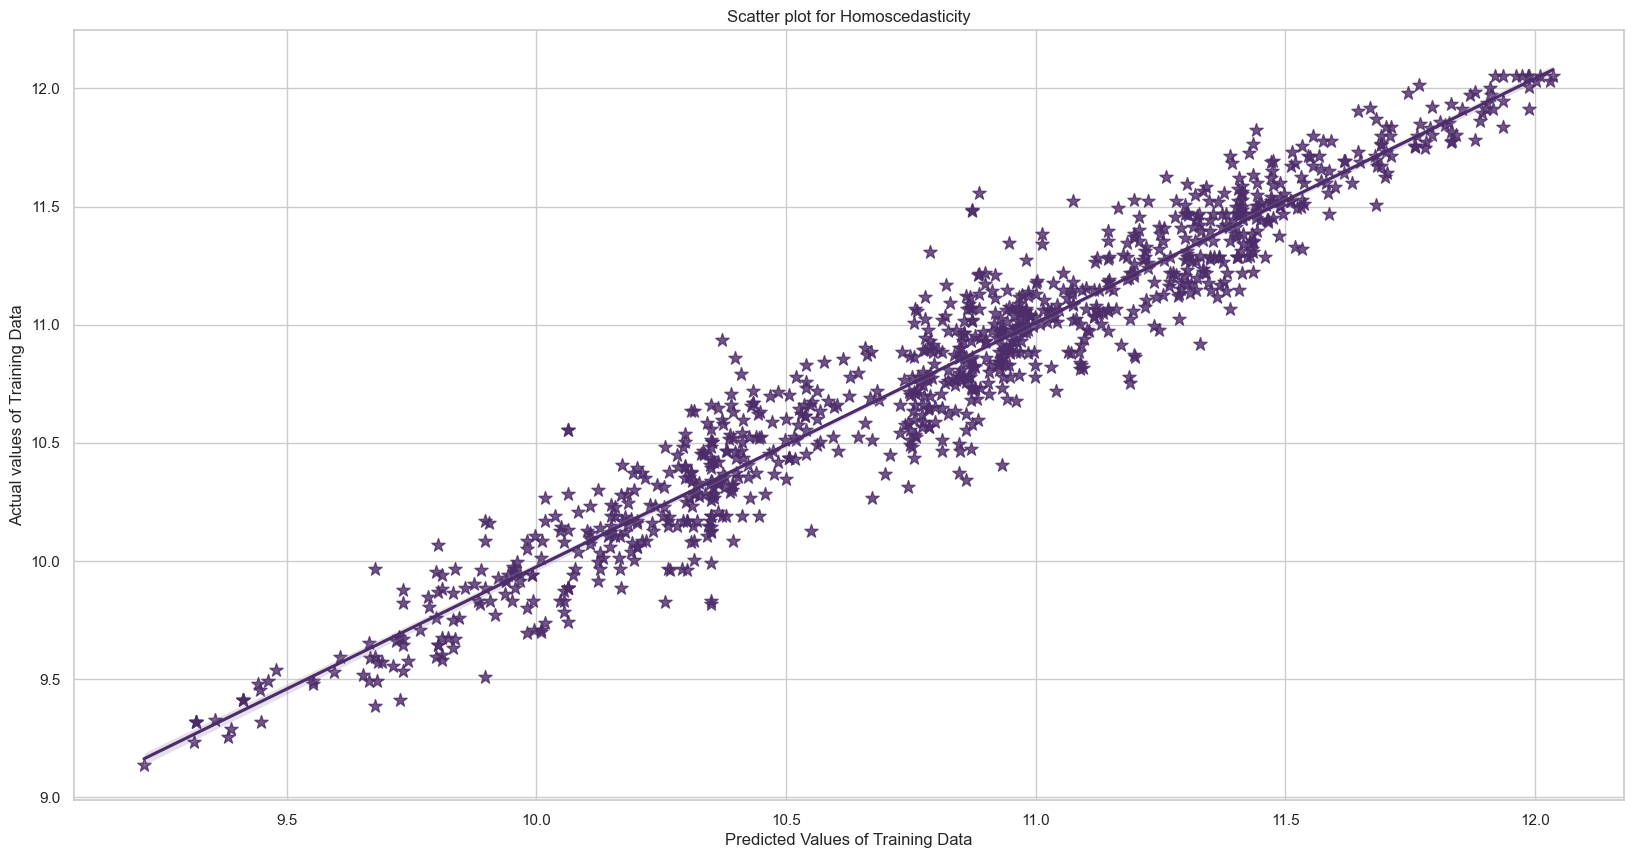

In [82]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_Train_XGB , y = Train_Y , color = '#4C2C69' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Training Data" );

plt.ylabel ( "Actual values of Training Data" );

plt.title ( "Scatter plot for Homoscedasticity" );

##### LINEARITY

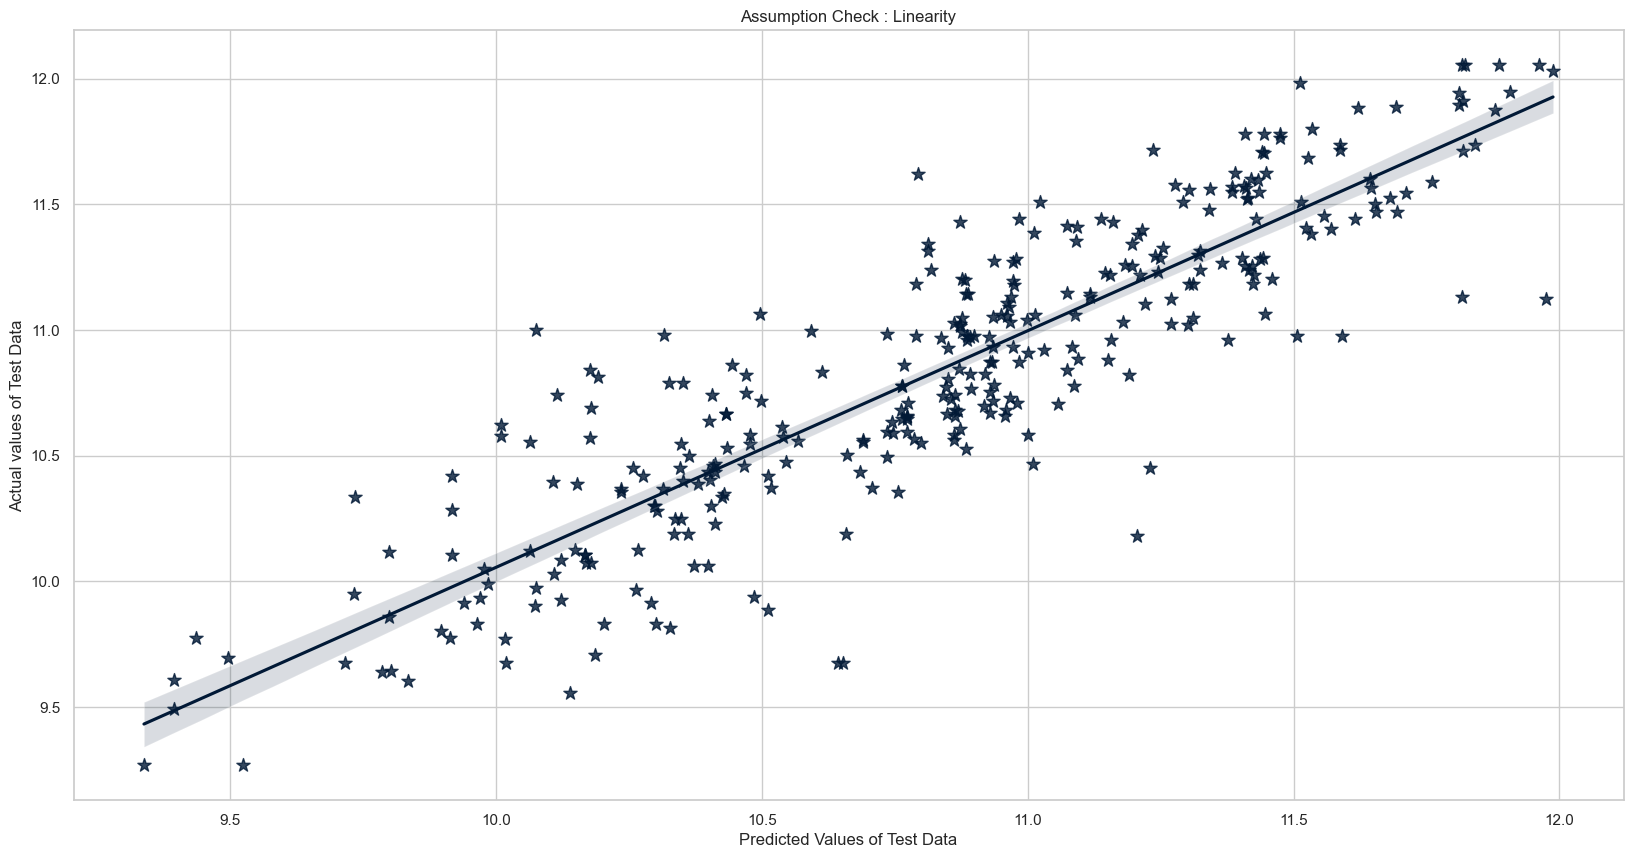

In [83]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Y_XGB , y = Test_Y , color = '#011936' , scatter_kws = { 's': 100 } , marker = '*' );

plt.xlabel ( "Predicted Values of Test Data" );

plt.ylabel ( "Actual values of Test Data" );

plt.title ( "Assumption Check : Linearity" );

## COMPARING MODELS

### GRAPHICAL COMPARISON

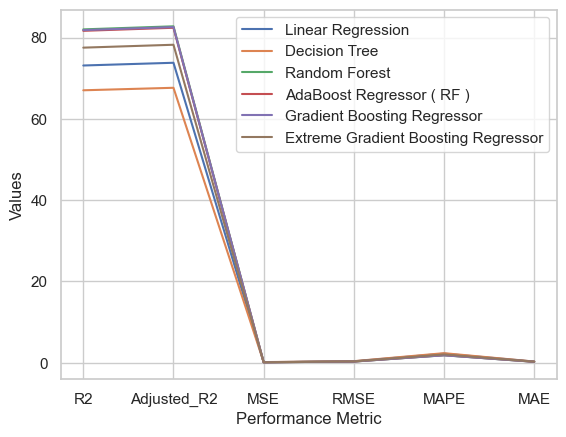

In [84]:
ax = plt.gca ( )

for i in [ LR_Performance_Metrics , DT_Performance_Metrics , RF_Performance_Metrics , AB_Performance_Metrics , GB_Performance_Metrics , XGB_Performance_Metrics ]:
    
    sns.lineplot ( x = 'Performance Metric'  , y =  'Values' , data = i , palette = 'twilight' , markers = '*' , ax = ax );
    
ax.legend ( [ 'Linear Regression' , 'Decision Tree' , 'Random Forest' , 'AdaBoost Regressor ( RF )' , 'Gradient Boosting Regressor' , 'Extreme Gradient Boosting Regressor' ] );

### COMPARISON OF R2

In [87]:
R2 = [ R2_LR , R2_R , R2_DT , R2_RF , R2_AB , R2_GB , R2_XGB ]

R2 = pd.DataFrame ( { 'R2_Names' : [ 'R2_LR' , 'R2_R' , 'R2_DT' , 'R2_RF' , 'R2_AB' , 'R2_GB' , 'R2_XGB' ] , 'R2_values' : R2 } )

R2.sort_values ( by = 'R2_values' , ascending = False )

R2_Names  R2_values
3    R2_RF  82.001761
5    R2_GB  81.816620
4    R2_AB  81.644928
6   R2_XGB  77.504609
0    R2_LR  73.110927
1     R2_R  72.438538
2    R2_DT  67.011080

#### BEST MODEL

    Based on the R2 scores obtained from the Random Forest, Gradient Boosting, and AdaBoost Regressor models, it can be 
    concluded that all three models perform well in explaining the variance in the target variable. 
    
    The Random Forest model achieved the highest R2 score of 82.00%, closely followed by the Gradient Boosting model with 
    an R2 score of 81.82%, and the AdaBoost Regressor model exhibited a strong performance with an R2 score of 81.64%.
    
    